#### This project aims to answer the research questions listed below based on Great Britain’s RTA statistical information.
1. The number of accidents and casualties that occur on Great Britain’s roads each year.
2. The speed and road class type at which most accidents in rural areas are concentrated.
3. Variation of accident numbers in an area, based on the road class type.
4. Distribution of the number of accidents on different road classes in a region when
categorized into different levels of accident severities
5. The fluctuation in pattern for the number of accidents that occurred over a 12-year period
from 2005 to 2017.
6. Recommendations to not only reduce the number of road traffic accidents but also to
minimize the number of casualties in the upcoming years.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as dsets
import seaborn as sns

In [2]:
Accident_1 = pd.read_csv('accident_information.csv', low_memory=False)

In [3]:
Vehicle_1 = pd.read_csv('vehicle_information.csv',encoding='latin1',low_memory=False)

In [4]:
Accident_1.head()

Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                None  2005-01-04   
1              0.0            Slight                None  2005-01-05   
2              0.0            Slight                None  2005-01-06   
3              0.0            Slight                None  2005-01-07   
4              0.0            Slight                None  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident    ...      \
0     Tuesday                                          1.0    ...       
1   Wednesday                                          1.0    ...       
2    Thursday                                          1.0    ...       
3      Friday                                          1.0    ...       
4      Monday                                          1.0    ...       

          Police_Force Road_Surface_Conditions           Road_Type  \
0  Metropolitan Police             Wet or damp  Single carriageway   
1  Metropolitan Police                     Dry    Dual carriageway   
2  Metropolitan Police                     Dry  Single carriageway   
3  Metropolitan Police                     Dry  Single carriageway   
4  Metropolitan Police             Wet or damp  Single carriageway   

  Special_Conditions_at_Site Speed_limit   Time  Urban_or_Rural_Area  \
0                       None        30.0  17:42                Urban   
1                       None        30.0  17:36                Urban   
2                       None        30.0  00:15                Urban   
3                       None        30.0  10:35                Urban   
4                       None        30.0  21:13                Urban   

      Weather_Conditions  Year InScotland  
0  Raining no high winds  2005         No  
1     Fine no high winds  2005         No  
2     Fine no high winds  2005         No  
3     Fine no high winds  2005         No  
4     Fine no high winds  2005         No  

[5 rows x 34 columns]

In [5]:
Accident_1.shape

(2047256, 34)

### 1. Removing unnecessary variables

In [6]:
Accident_1 = Accident_1.drop(["Latitude", "Local_Authority_(Highway)", "Location_Easting_OSGR","Longitude","LSOA_of_Accident_Location","1st_Road_Number", "2nd_Road_Class", "2nd_Road_Number","Date","Did_Police_Officer_Attend_Scene_of_Accident","Location_Northing_OSGR","Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities","Police_Force","Special_Conditions_at_Site","InScotland"], axis=1)

In [7]:
print('Rows:', Accident_1.shape[0], '\nColumns:', Accident_1.shape[1])

Rows: 2047256 
Columns: 18


In [8]:
# Calculating NA values
print('Proportion of Missing Values in Accidents Table:', 
      round(Accident_1.isna().sum().sum()/len(Accident_1),3), '%')

Proportion of Missing Values in Accidents Table: 0.0 %


In [9]:
# Converting time in format [hh:mm] to just [hh] of int type column 'hour'
Accident_1['Hour'] = Accident_1['Time'].str[0:2]
Accident_1['Hour'] = pd.to_numeric(Accident_1['Hour'])
Accident_1 = Accident_1.dropna(subset=['Hour']) # remove na rows as per the particular column
Accident_1['Hour'] = Accident_1['Hour'].astype('int')

In [10]:
# Method to generalise hours in morning, afternoon and so on format
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "Morning (5-10)"
    elif hour >= 10 and hour < 15:
        return "Office Time (10-15)"
    elif hour >= 15 and hour < 19:
        return "Afternoon (15-19)"
    elif hour >= 19 and hour < 23:
        return "Evening (19-23)"
    else:
        return "Night (23-5)"

In [11]:
#Passing every value of hour column to when_was_it function and assigning those values to new column 'Daytime'
Accident_1['Daytime'] = Accident_1['Hour'].apply(when_was_it, convert_dtype=True)
Accident_1[['Time', 'Hour', 'Daytime']].head(8)

Time  Hour              Daytime
0  17:42    17    Afternoon (15-19)
1  17:36    17    Afternoon (15-19)
2  00:15     0         Night (23-5)
3  10:35    10  Office Time (10-15)
4  21:13    21      Evening (19-23)
5  12:40    12  Office Time (10-15)
6  20:40    20      Evening (19-23)
7  17:35    17    Afternoon (15-19)

In [12]:
#Dropping Time, Hour and JUnction Detail columns
Accident_1=Accident_1.drop(['Time','Hour','Junction_Detail'], axis=1)

In [13]:
Accident_1.columns

Index(['Accident_Index', '1st_Road_Class', 'Accident_Severity',
       'Carriageway_Hazards', 'Day_of_Week', 'Junction_Control',
       'Light_Conditions', 'Local_Authority_(District)',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'Daytime'],
      dtype='object')

In [14]:
# Reduced from original 34 columns to 17 columns
Accident_1.shape

(2047100, 17)

In [15]:
# Analyzing the datatypes of each column to decide which ones are to be converted to dummy variables
Accident_1.dtypes

Accident_Index                 object
1st_Road_Class                 object
Accident_Severity              object
Carriageway_Hazards            object
Day_of_Week                    object
Junction_Control               object
Light_Conditions               object
Local_Authority_(District)     object
Number_of_Casualties            int64
Number_of_Vehicles              int64
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                   float64
Urban_or_Rural_Area            object
Weather_Conditions             object
Year                            int64
Daytime                        object
dtype: object

### Plotting every variable count

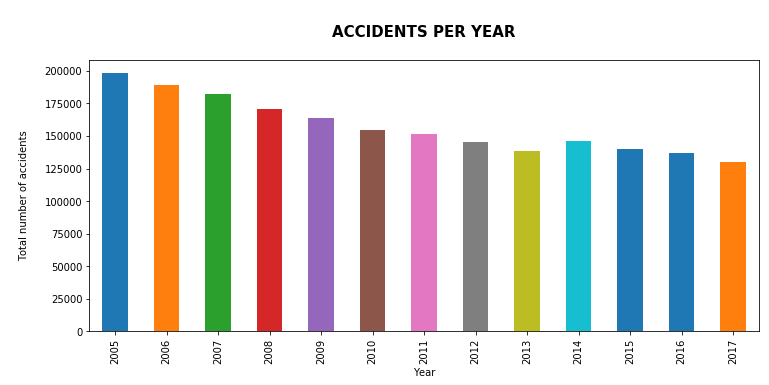

In [16]:
# Year vs No of accidents
fig, ax = plt.subplots(figsize=(12,5))
Accident_1.groupby('Year')['Accident_Index'].nunique().plot(kind='bar')
plt.title('\nACCIDENTS PER YEAR\n', fontsize=15, fontweight='bold')
plt.ylabel('\nTotal number of accidents\n')
plt.show()

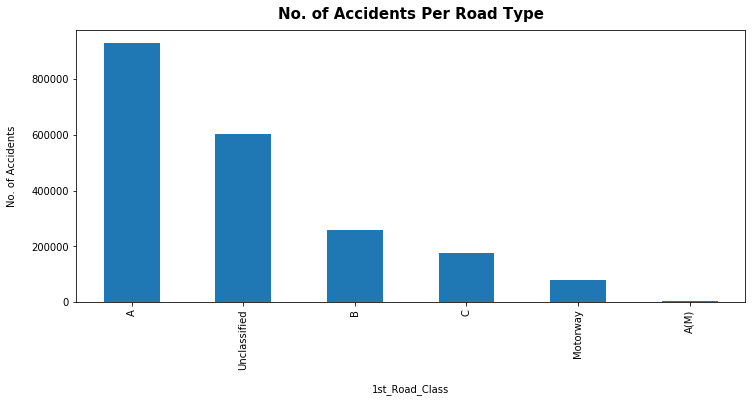

In [53]:
# 1st_Road_Class vs No of accidents
Accident_1['1st_Road_Class'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("1st_Road_Class", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Road Type", y=1.02, fontsize=15, fontweight='bold');

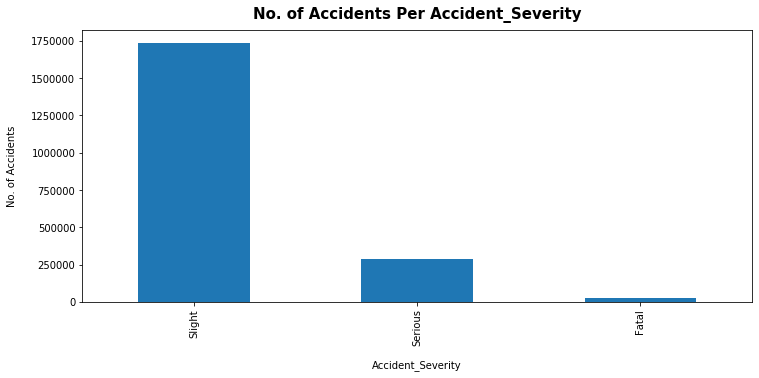

In [54]:
# Accident_Severity vs No of accidents
Accident_1['Accident_Severity'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Accident_Severity", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Accident_Severity", y=1.02, fontsize=15, fontweight='bold');

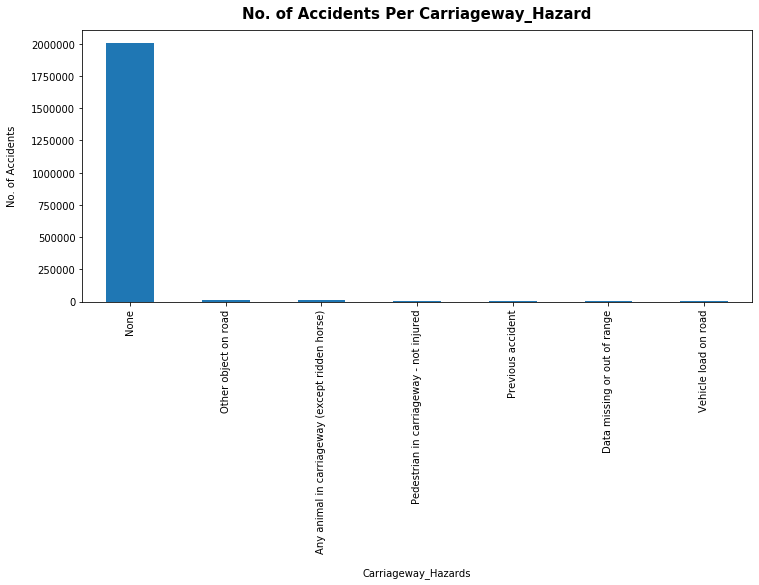

In [55]:
# Carriageway_Hazards vs No of accidents
Accident_1['Carriageway_Hazards'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Carriageway_Hazards", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Carriageway_Hazard", y=1.02, fontsize=15, fontweight='bold');

Friday       335166
Wednesday    308549
Thursday     308216
Tuesday      306269
Monday       290462
Saturday     273131
Sunday       225307
Name: Day_of_Week, dtype: int64


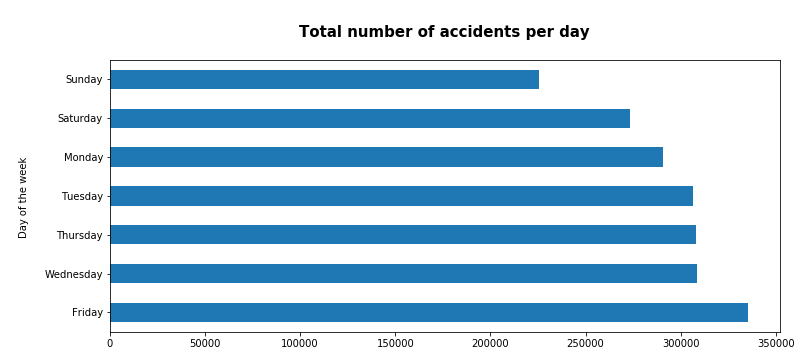

In [56]:
# Day_of_Week vs No of accidents

av=Accident_1.Day_of_Week.value_counts()
print(av)

fig, ax = plt.subplots(figsize=(12,5))
av.plot(kind='barh')
plt.title('\nTotal number of accidents per day\n', fontsize=15, fontweight='bold')
plt.ylabel('\nDay of the week \n')
plt.show()

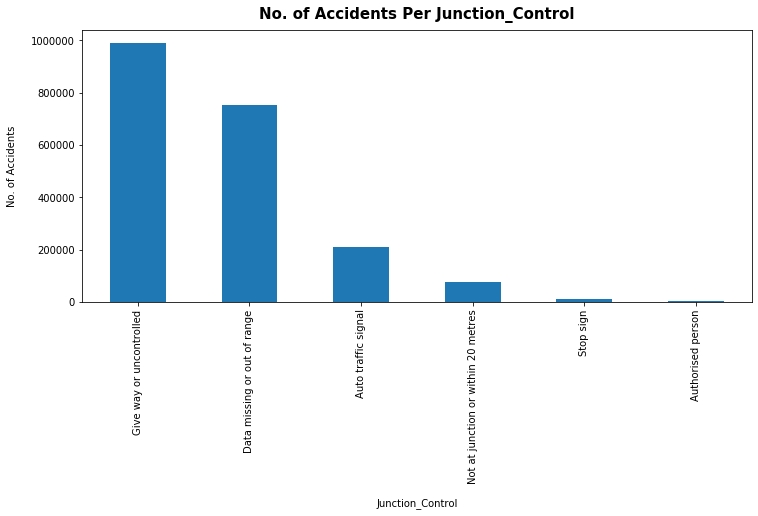

In [64]:
# Junction_Control vs No of accidents
Accident_1['Junction_Control'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Junction_Control", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Junction_Control", y=1.02, fontsize=15, fontweight='bold');

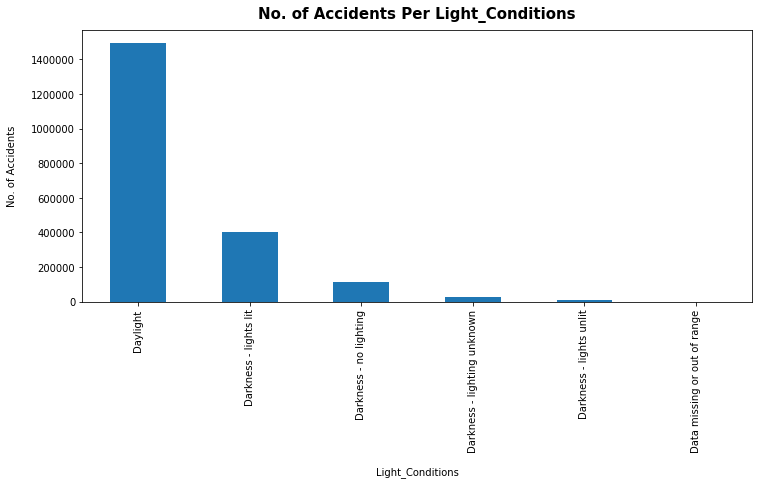

In [65]:
# Light_Conditions vs No of accidents
Accident_1['Light_Conditions'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Light_Conditions", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Light_Conditions", y=1.02, fontsize=15, fontweight='bold');

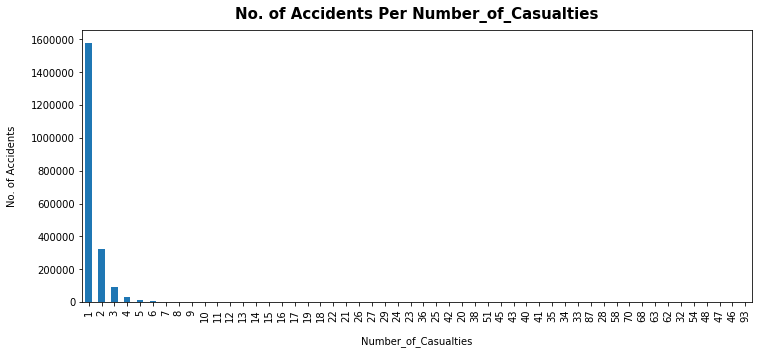

In [66]:
# Number_of_Casualties vs No of accidents
Accident_1['Number_of_Casualties'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Number_of_Casualties", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Number_of_Casualties", y=1.02, fontsize=15, fontweight='bold');

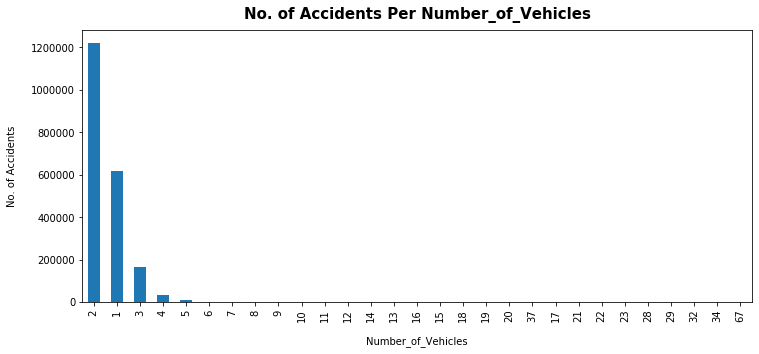

In [67]:
# Number_of_Vehicles vs No of accidents
Accident_1['Number_of_Vehicles'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Number_of_Vehicles", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Number_of_Vehicles", y=1.02, fontsize=15, fontweight='bold');

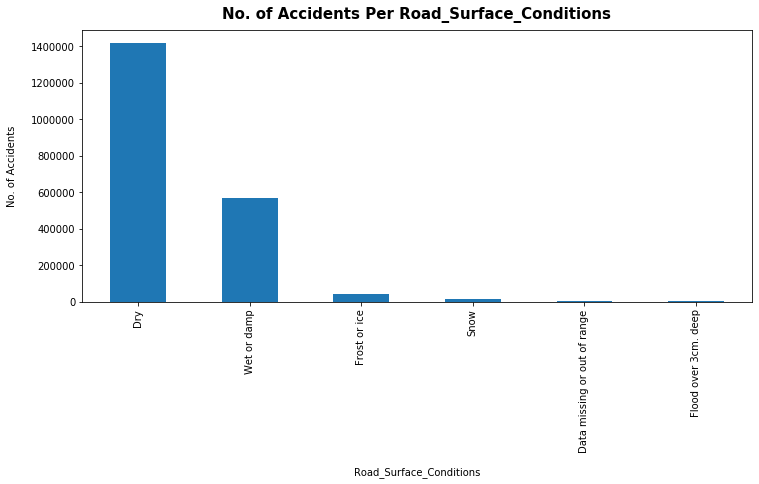

In [68]:
# Road_Surface_Conditions vs No of accidents
Accident_1['Road_Surface_Conditions'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Road_Surface_Conditions", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Road_Surface_Conditions", y=1.02, fontsize=15, fontweight='bold');

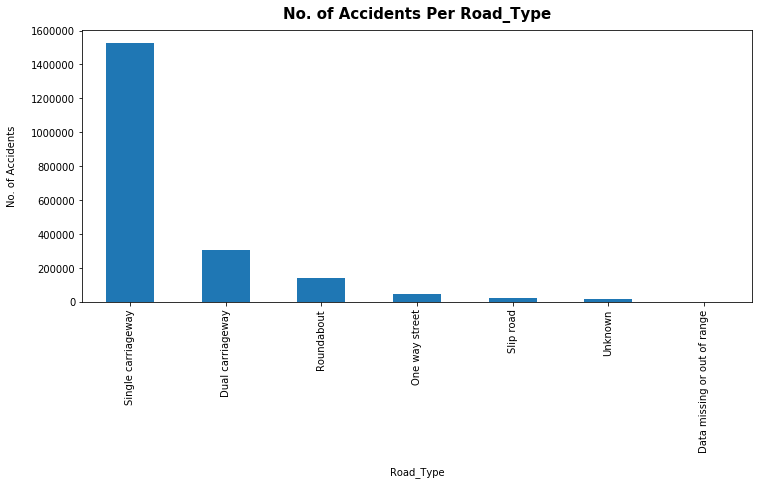

In [69]:
# Road_Type vs No of accidents
Accident_1['Road_Type'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Road_Type", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Road_Type", y=1.02, fontsize=15, fontweight='bold');

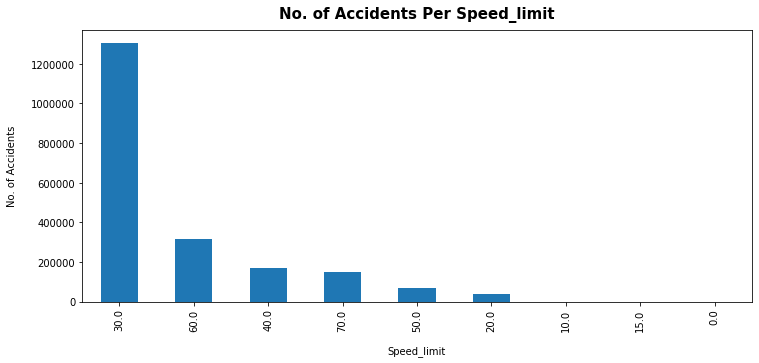

In [70]:
# Speed_limit vs No of accidents
Accident_1['Speed_limit'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Speed_limit", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Speed_limit", y=1.02, fontsize=15, fontweight='bold');

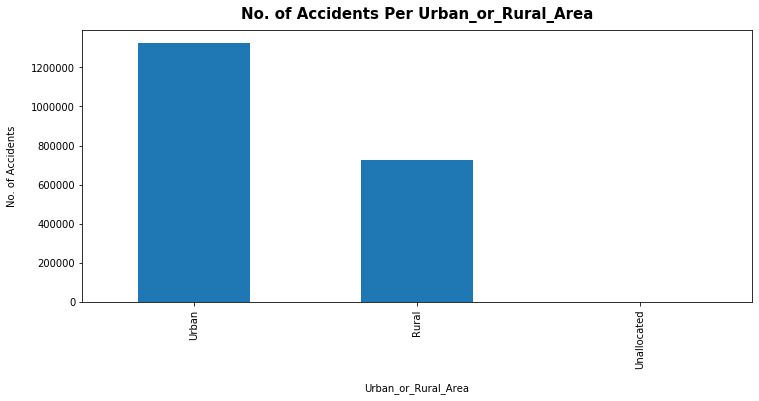

In [71]:
# Urban_or_Rural_Area vs No of accidents
Accident_1['Urban_or_Rural_Area'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Urban_or_Rural_Area", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Urban_or_Rural_Area", y=1.02, fontsize=15, fontweight='bold');

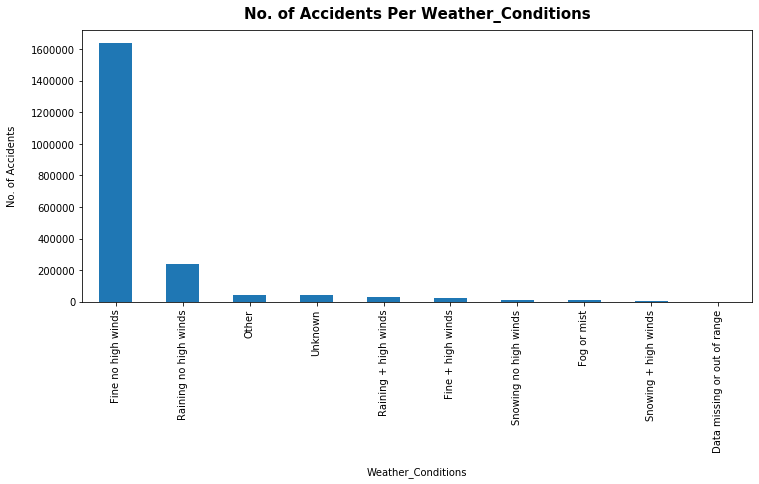

In [72]:
# Weather_Conditions vs No of accidents
Accident_1['Weather_Conditions'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Weather_Conditions", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Weather_Conditions", y=1.02, fontsize=15, fontweight='bold');

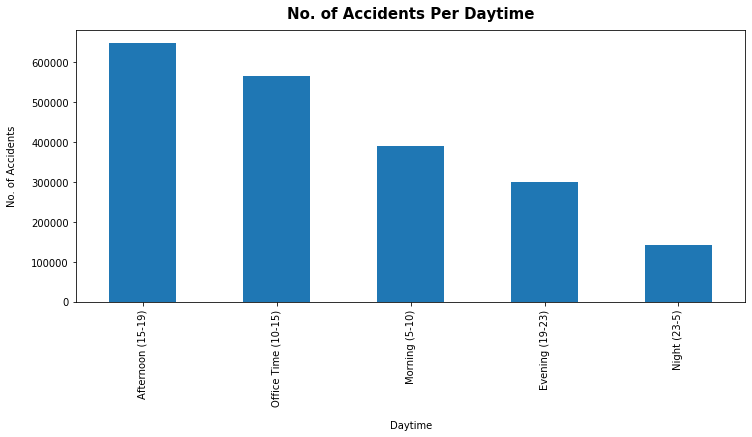

In [73]:
# Daytime vs No of accidents
Accident_1['Daytime'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Daytime", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Daytime", y=1.02, fontsize=15, fontweight='bold');

In [74]:
weekday = Accident_1['Day_of_Week']
daytime   = Accident_1['Daytime']

weekday_daytime = Accident_1.groupby([daytime, weekday]).size()
weekday_daytime = weekday_daytime.rename_axis(['Daytime', 'Weekday'])\
                               .unstack('Weekday')
weekday_daytime

Weekday              Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
Daytime                                                                    
Afternoon (15-19)    109954   96188     71826   60883    102773   103206   
Evening (19-23)       52868   38528     44567   35687     44285    41837   
Morning (5-10)        62848   64980     29907   21563     68993    71447   
Night (23-5)          20252   13507     34344   33717     14204    12242   
Office Time (10-15)   89244   77259     92487   73457     77961    77537   

Weekday              Wednesday  
Daytime                         
Afternoon (15-19)       103520  
Evening (19-23)          42851  
Morning (5-10)           71321  
Night (23-5)             12620  
Office Time (10-15)      78237

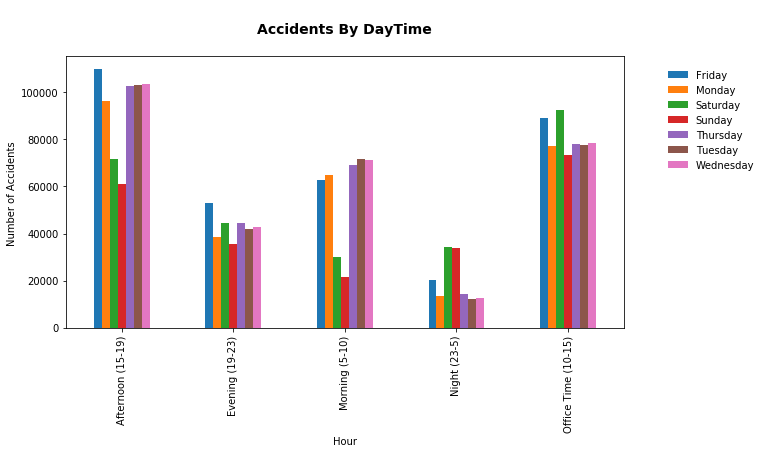

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

weekday_daytime.plot(kind='bar', ax=ax)
ax.set_title('\nAccidents By DayTime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour', ylabel='Number of Accidents ')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

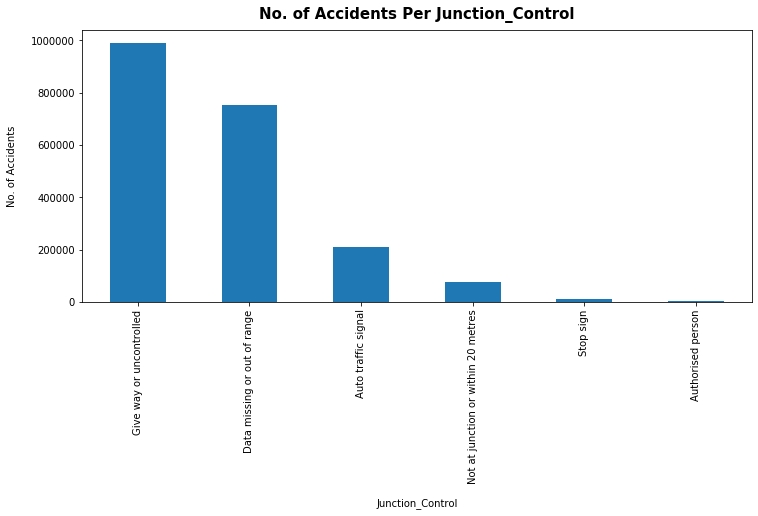

In [76]:
# Junction Control vs No of accidents
Accident_1['Junction_Control'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Junction_Control", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Junction_Control", y=1.02, fontsize=15, fontweight='bold');

In [77]:
counts = Accident_1.groupby(['Daytime', 'Accident_Severity']).size()

counts = counts.unstack('Accident_Severity')\
               .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts


counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0)*100, rsuffix=' in %')
counts_share = counts.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
counts_share

Accident_Severity    Fatal in %  Serious in %  Slight in %
Daytime                                                   
Afternoon (15-19)      1.009486     13.827562    85.162952
Evening (19-23)        1.629283     15.723348    82.647369
Morning (5-10)         1.066080     12.480725    86.453195
Night (23-5)           3.077666     19.060091    77.862243
Office Time (10-15)    1.133734     13.022668    85.843598

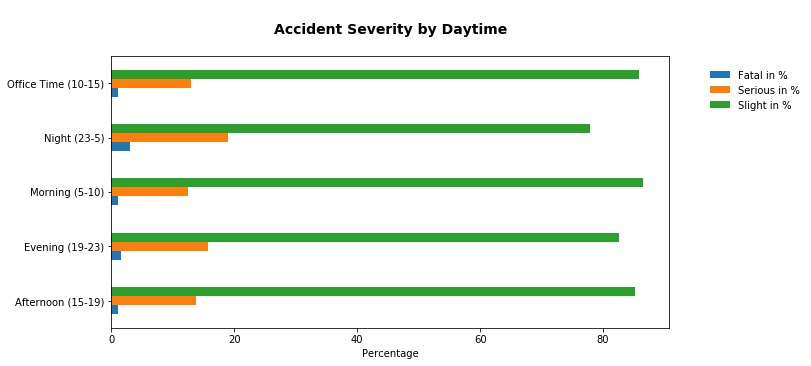

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))

counts_share.plot(kind='barh', ax=ax)
ax.set_title('\nAccident Severity by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

### Plotting every variable year wise

In [16]:
LAD_to_County=pd.read_csv('LAD_to_County.csv')
LAD_to_County.head(5)
#Converting dataframe to dictionary
lad_dict = LAD_to_County.set_index('local_autority').to_dict()['group']

Accident_1['Region'] = Accident_1['Local_Authority_(District)'].replace(lad_dict)
#If you still have some values that aren't in your dictionary and want to replace them with Z, you can use a regex to replace them.
#df.astype('str').replace({'\d+': 'Z'}, regex=True)

Accident_1['Region'].value_counts()

London                      320631
South East                  313652
North West                  227616
East of England             195480
West Midlands               183767
Yorkshire and The Humber    183598
South West                  168218
East Midlands               155578
Scotland                    135302
Wales                        86710
North East                   76548
Name: Region, dtype: int64

In [17]:
# method to plot graphs for every variable yearwise
def making_yearwise_tables(variables):
    for i, var in enumerate(variables):
        table_i = Accident_1[var]
        year    = Accident_1['Year']
        table_i = Accident_1.groupby([year, table_i]).size()
        table_i = table_i.rename_axis(['Year', var]).unstack(var)
        #print(table_i)
        fig = plt.rcParams["figure.figsize"]=(30,10)
        table_i.plot(kind='line', )
        plt.title('\nAccidents by Years and ' + var + '\n', fontsize='25', fontweight='bold')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(prop={'size': 15})
        plt.xlabel('')
        plt.ylabel('')

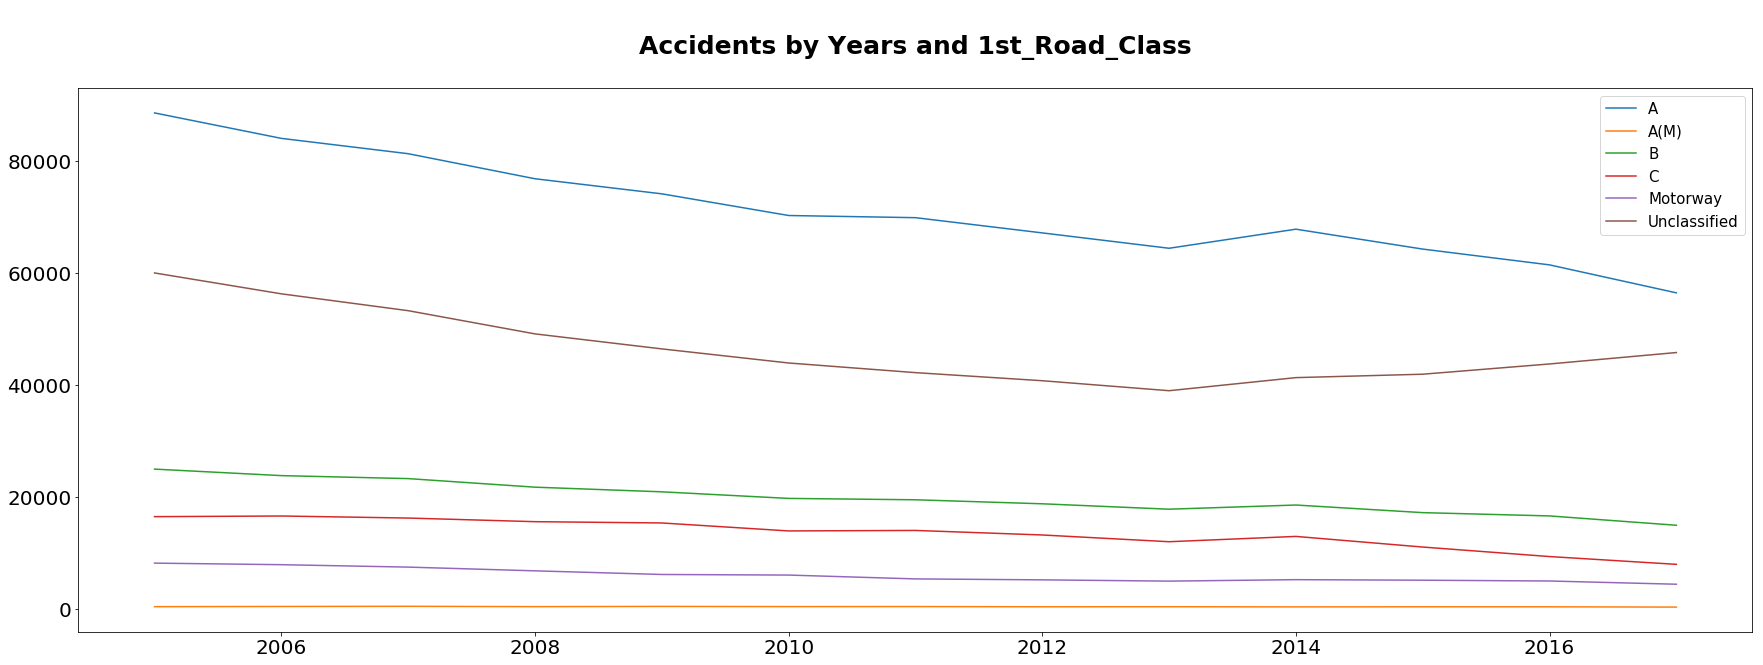

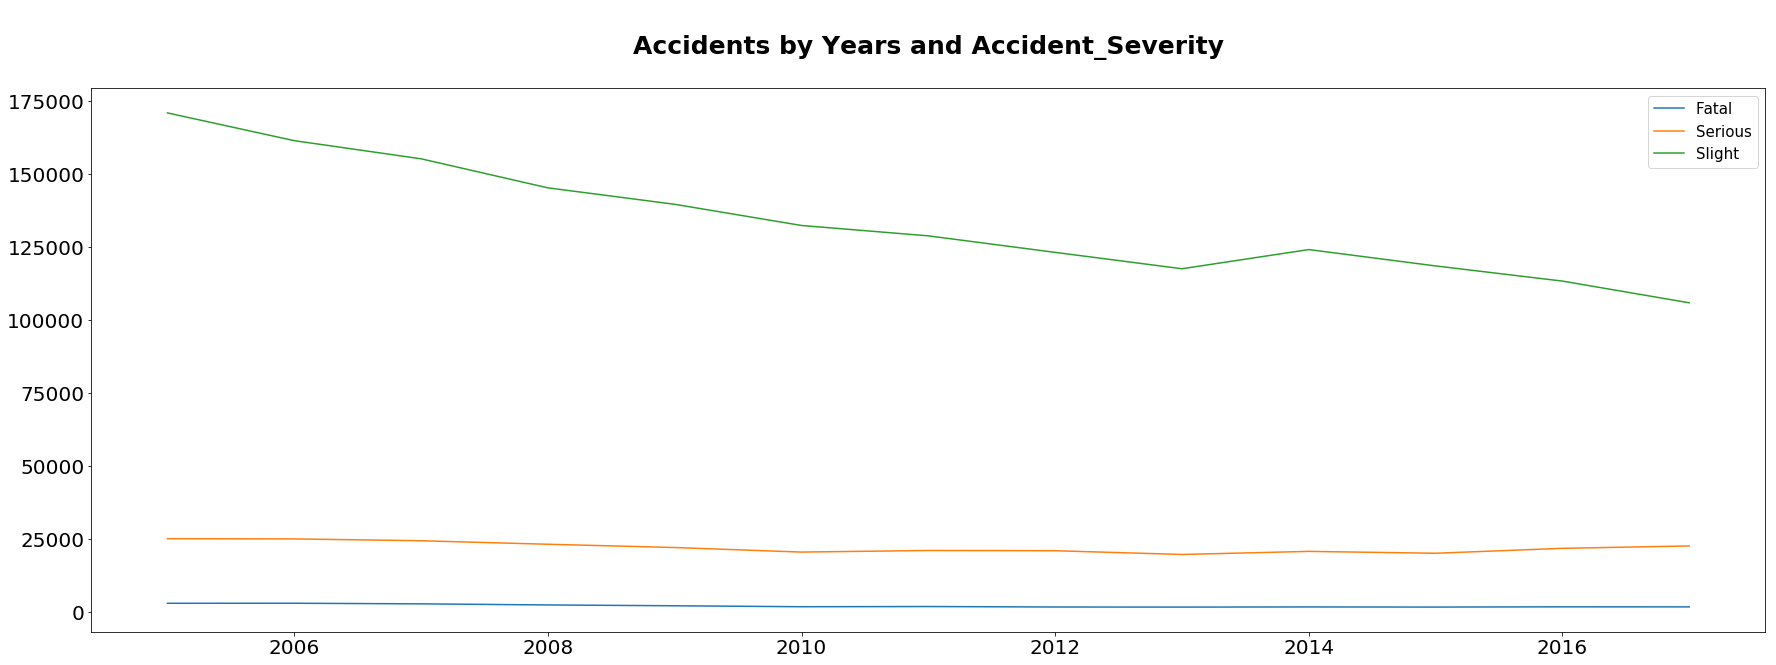

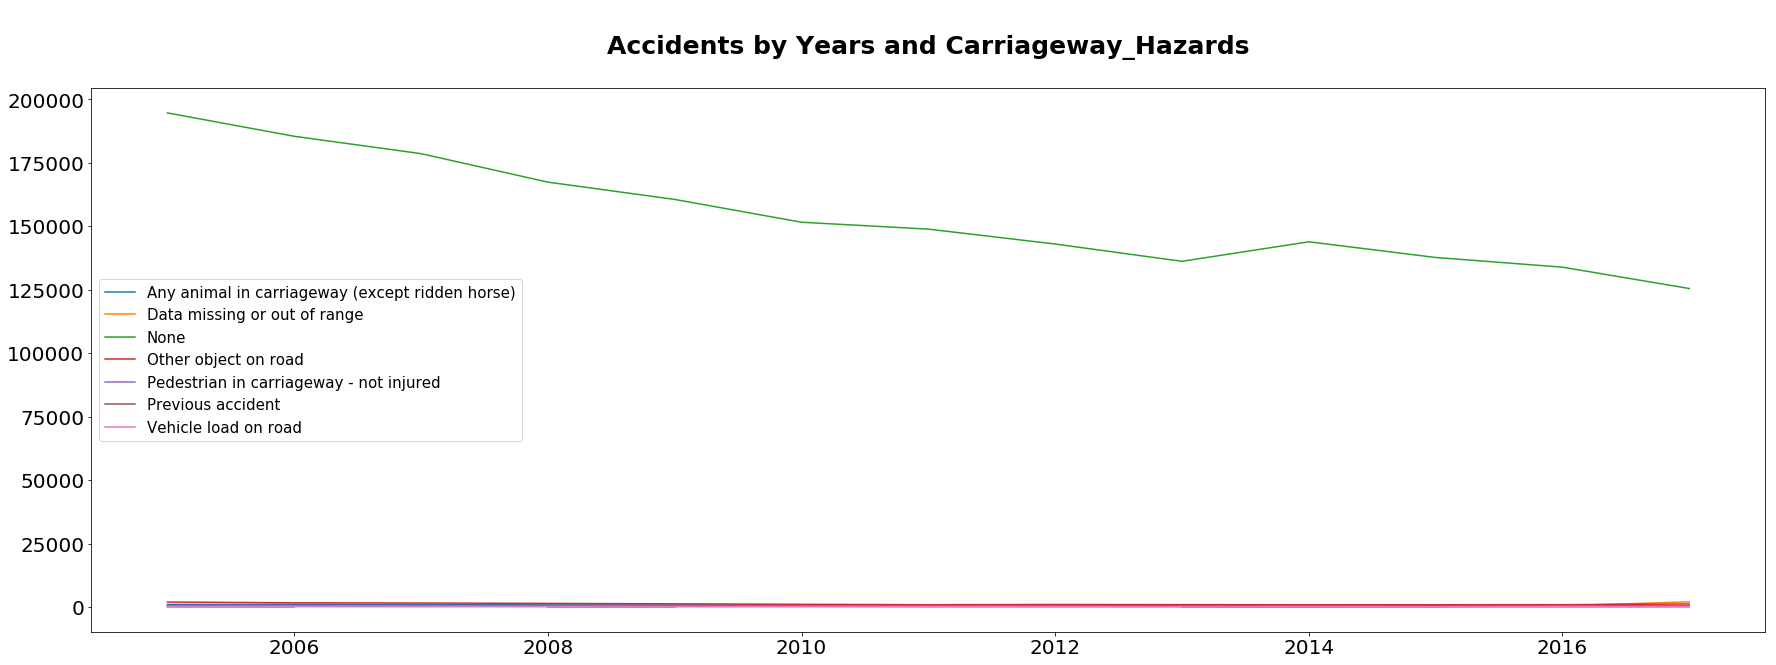

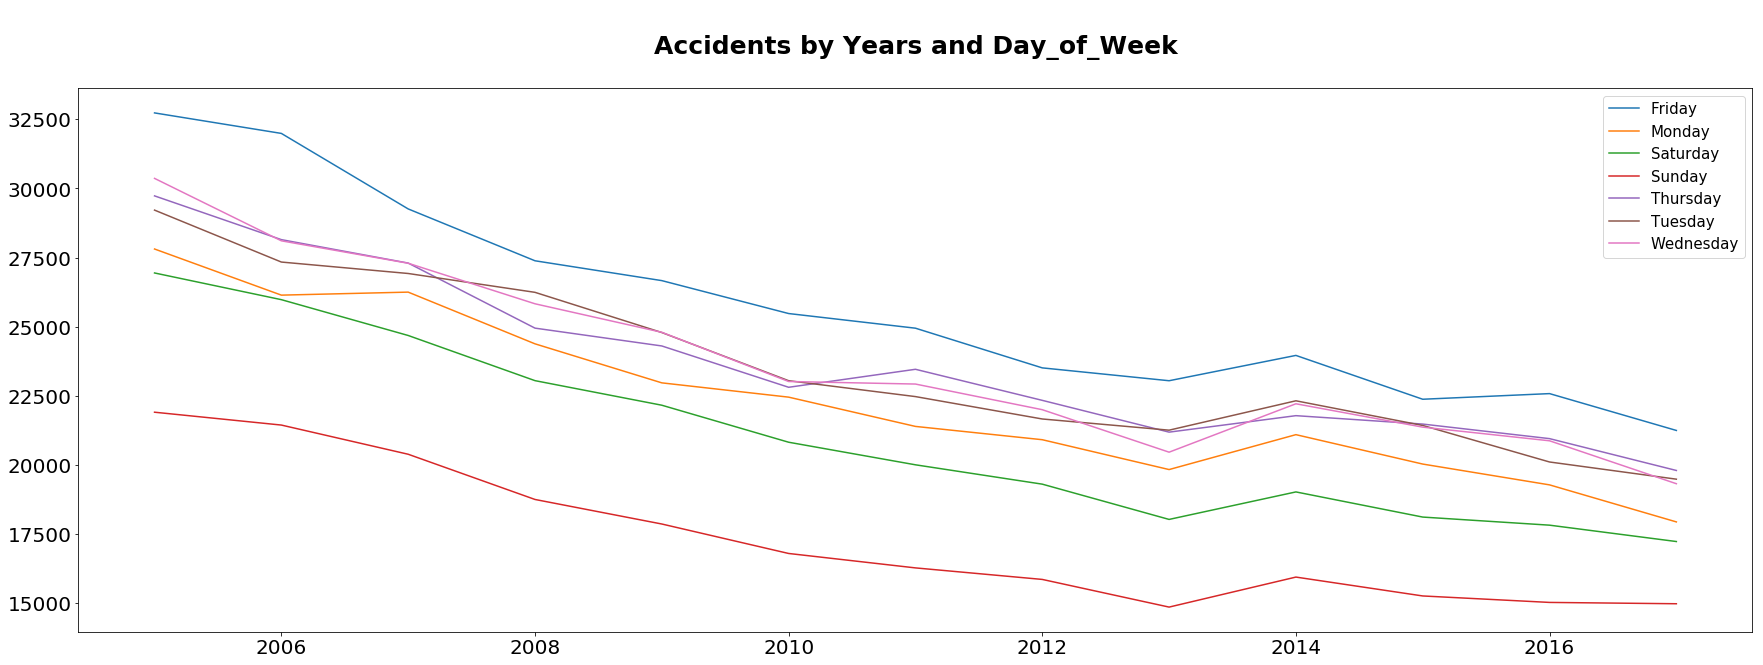

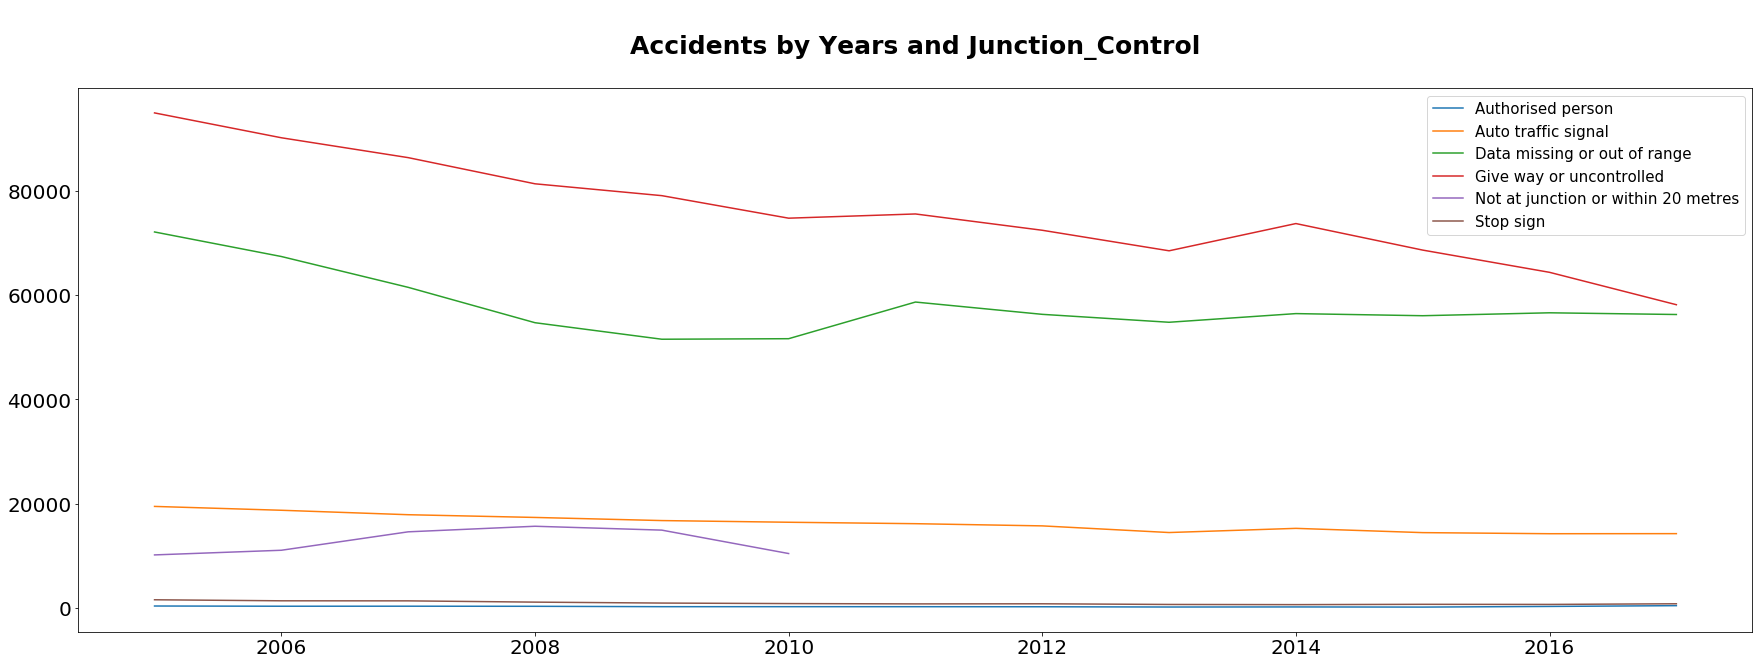

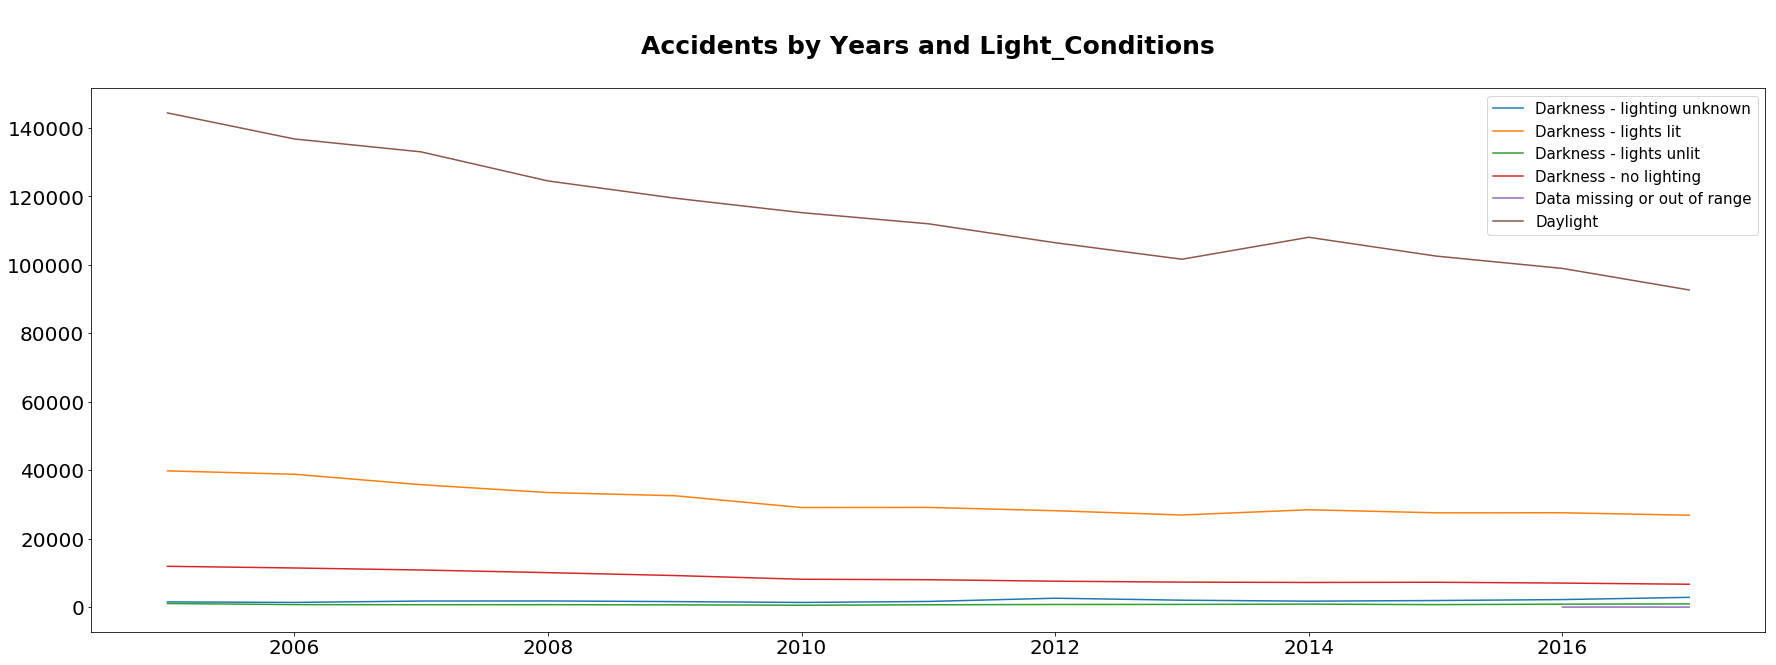

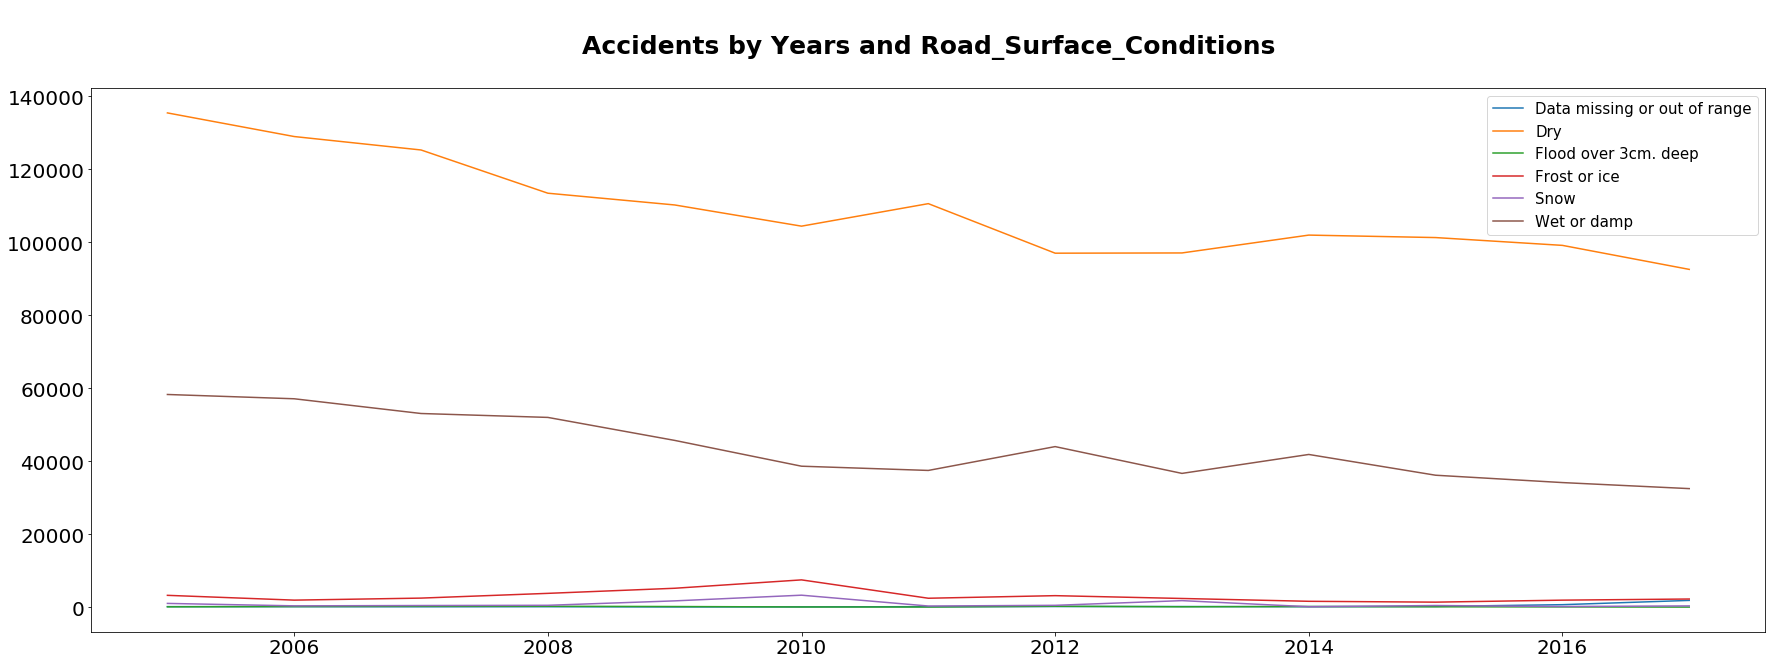

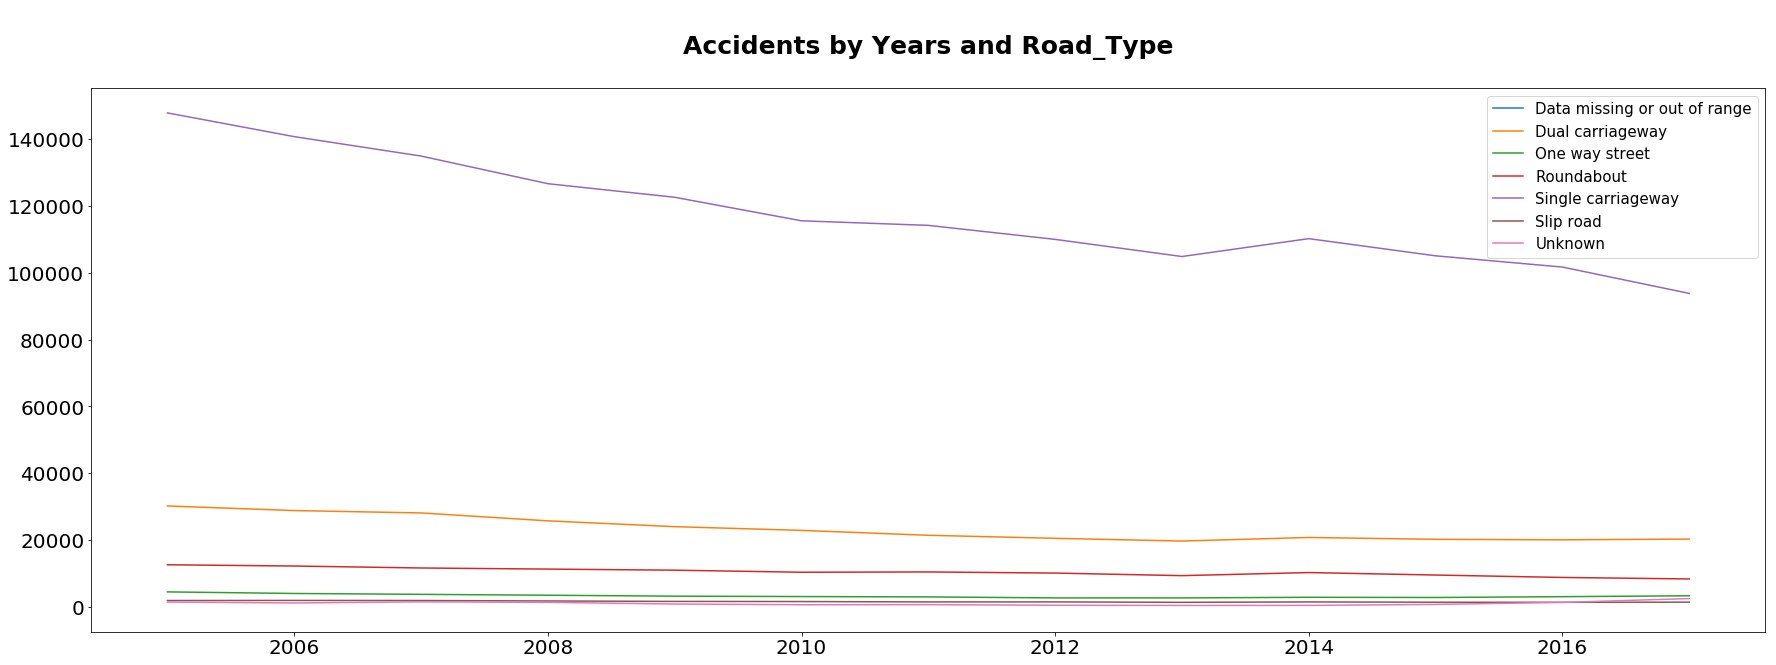

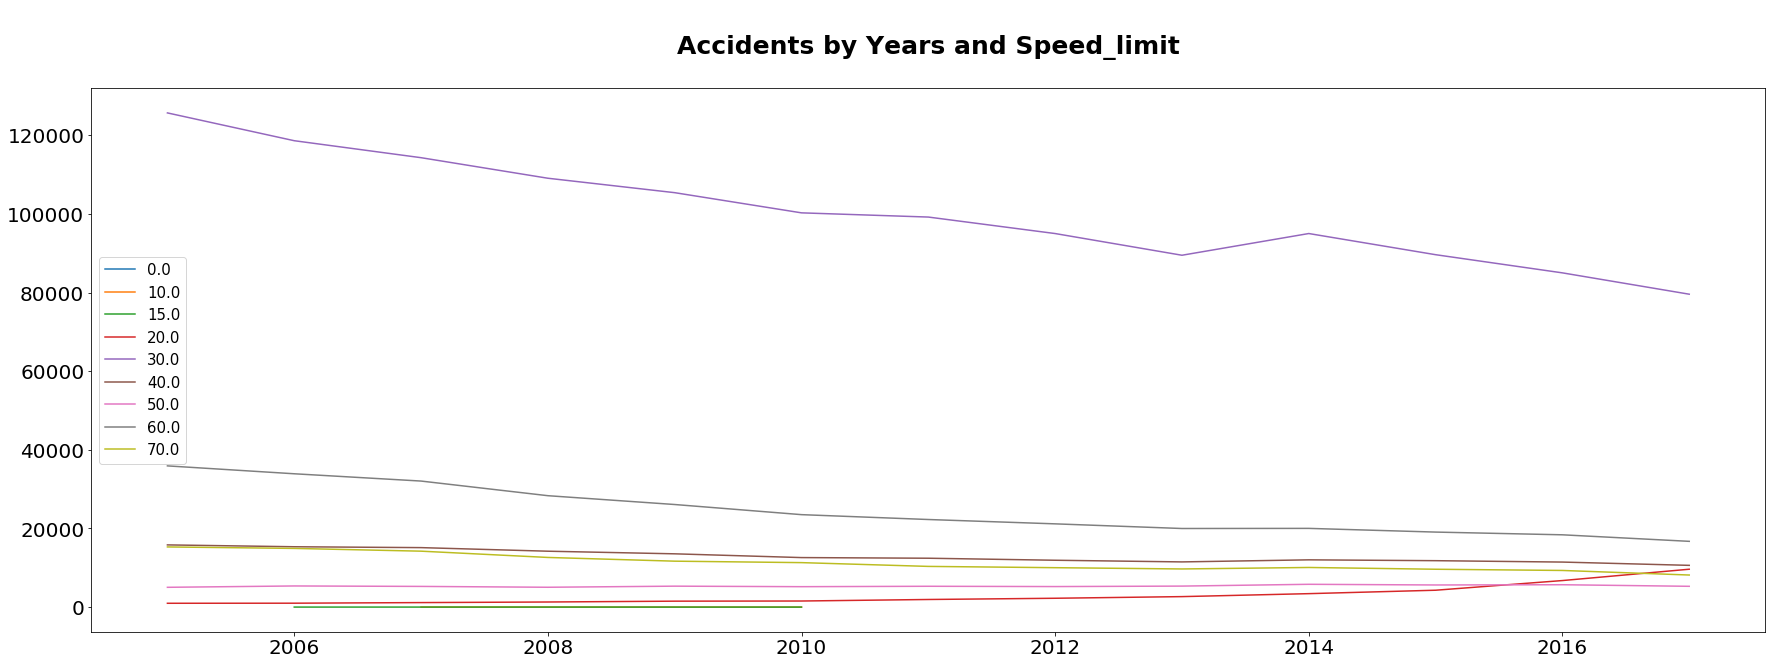

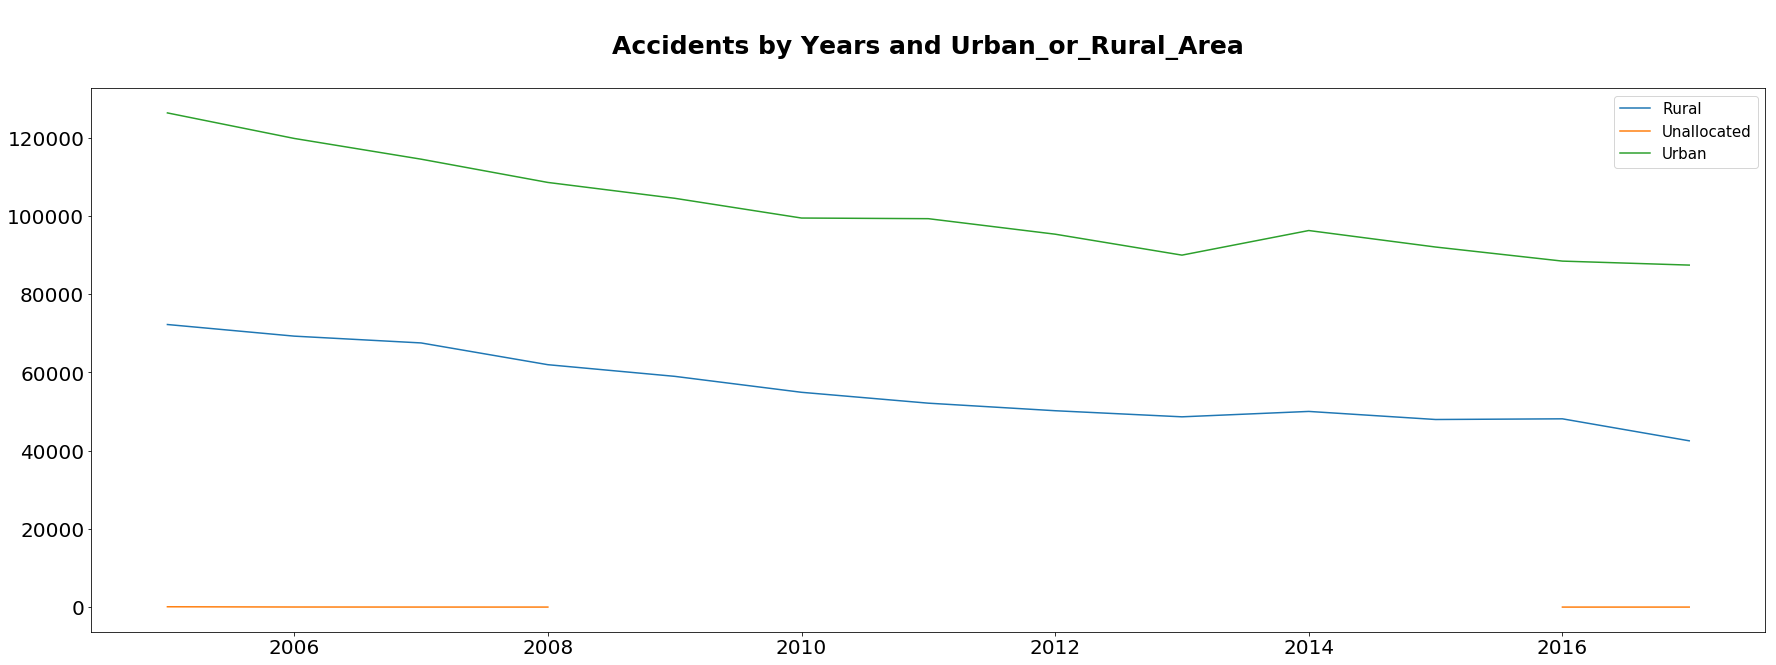

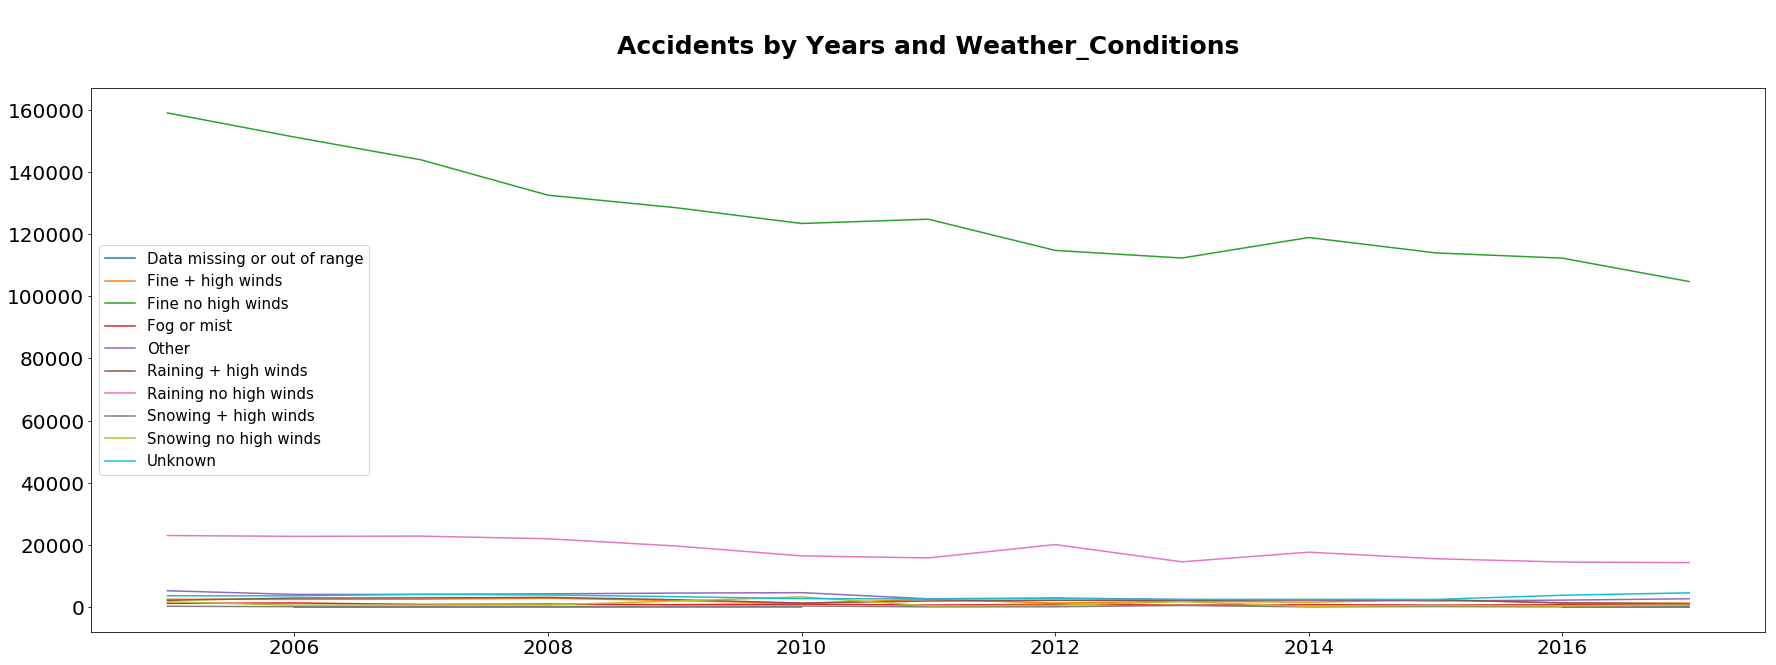

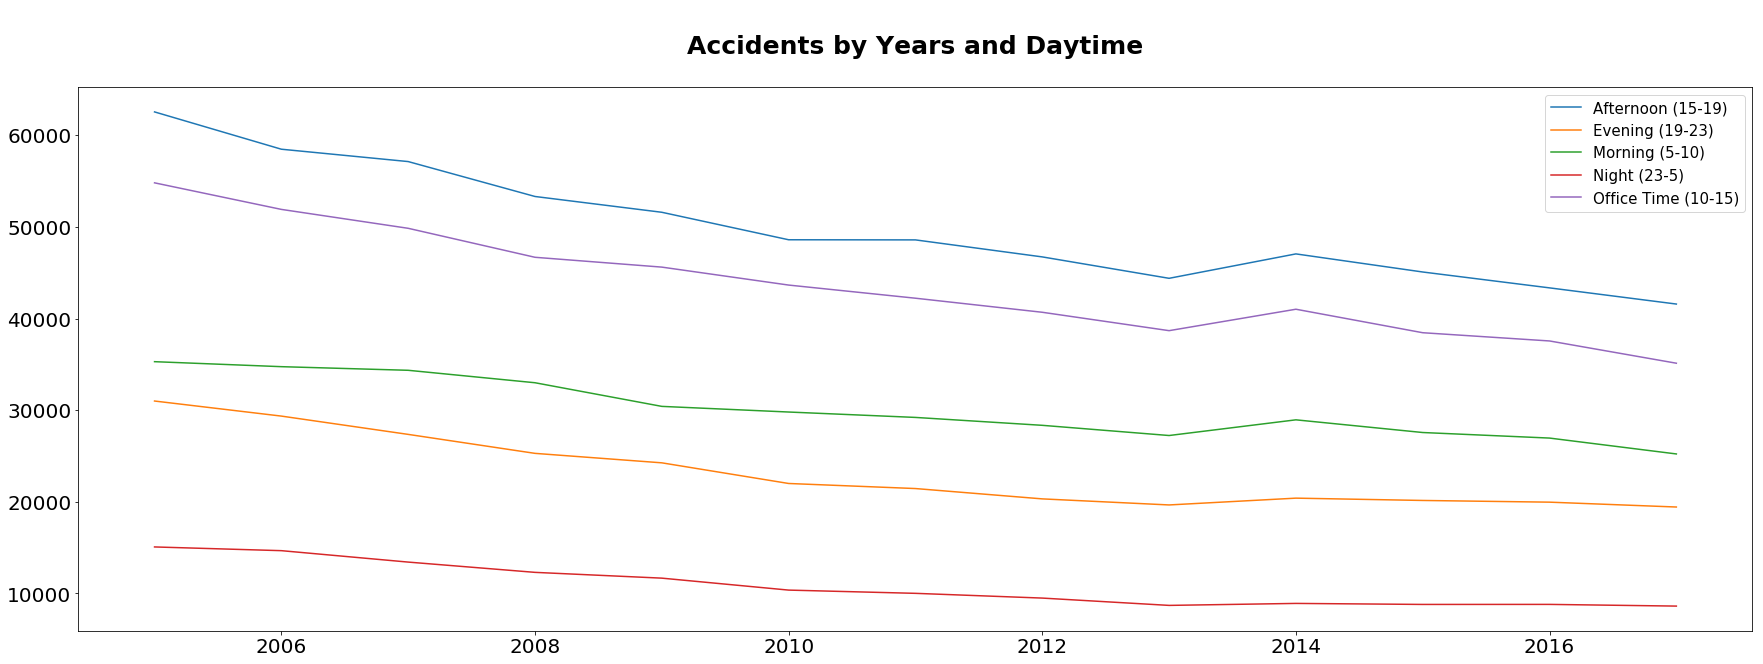

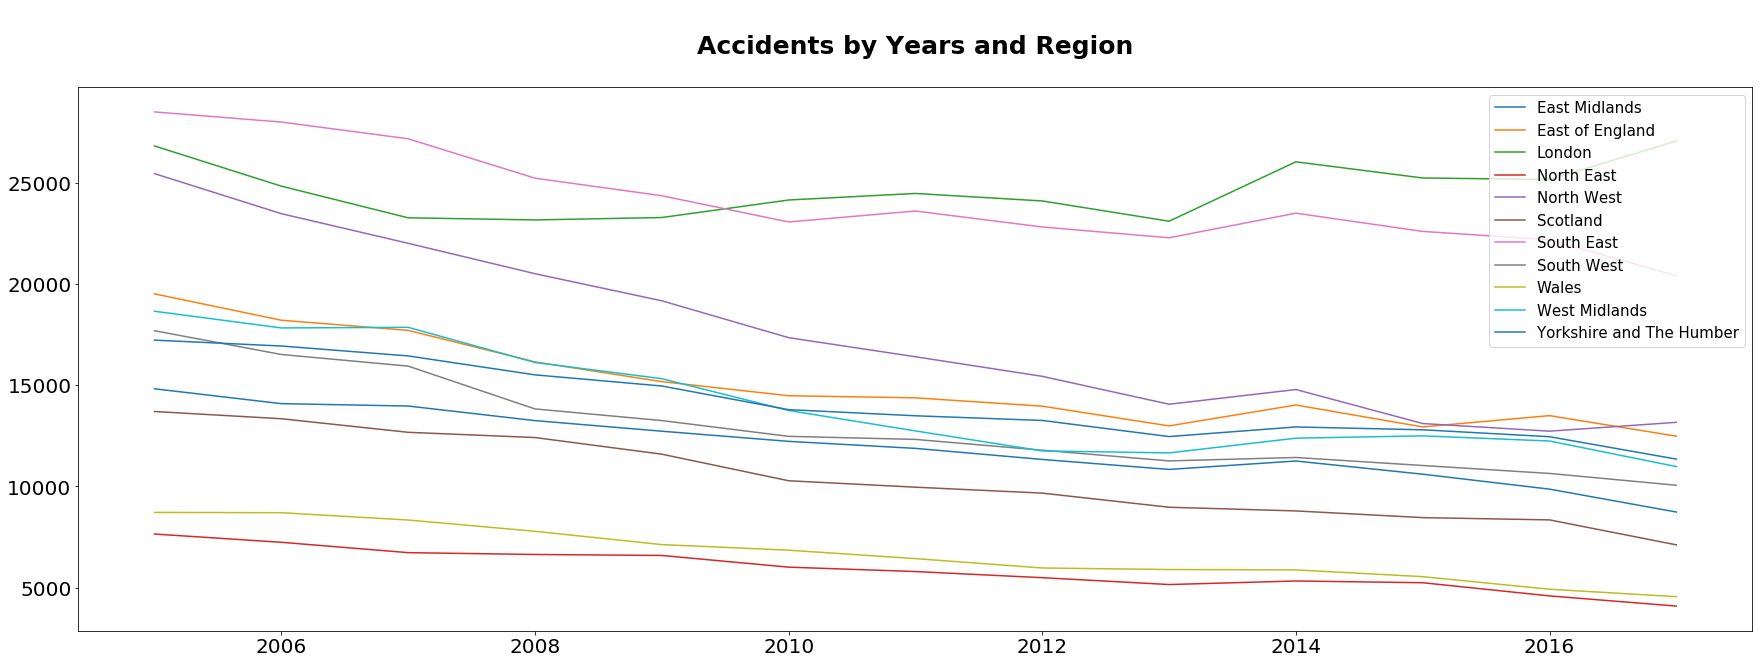

In [19]:
variables_to_plot=['1st_Road_Class','Accident_Severity','Carriageway_Hazards','Day_of_Week','Junction_Control','Light_Conditions','Road_Surface_Conditions','Road_Type','Speed_limit','Urban_or_Rural_Area','Weather_Conditions','Daytime','Region']
making_yearwise_tables(variables_to_plot)

In [20]:
#Regarding Region: from 2005 to 2017 - the difference in accidents among London, North West and South East has varied much.
# Now London is at the top, North West has improved a lot. every thing is going down except London.

### Plotting every variable wrt Urban_or_Rural_Area

In [21]:
# method to plot graphs for every variable wrt Urban_or_Rural_Area
def making_tables_Urban_or_Rural_wrt_variables(variables):
    for i, var in enumerate(variables):
        table_i=Accident_1.groupby([Accident_1[var],Accident_1['Urban_or_Rural_Area']]).size()
        table_i = table_i.rename_axis([var, 'Urban_or_Rural_Area']).unstack('Urban_or_Rural_Area')
        #table_i.drop(['Slight'], axis=1, inplace=True)
        fig = plt.rcParams["figure.figsize"]=(30,10)
        table_i.plot(kind='bar')
        plt.title('\nAccidents by Urban/Rural and ' + var + '\n', fontsize='25', fontweight='bold')
        plt.legend(prop={'size': 20})
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('')
        plt.ylabel('');

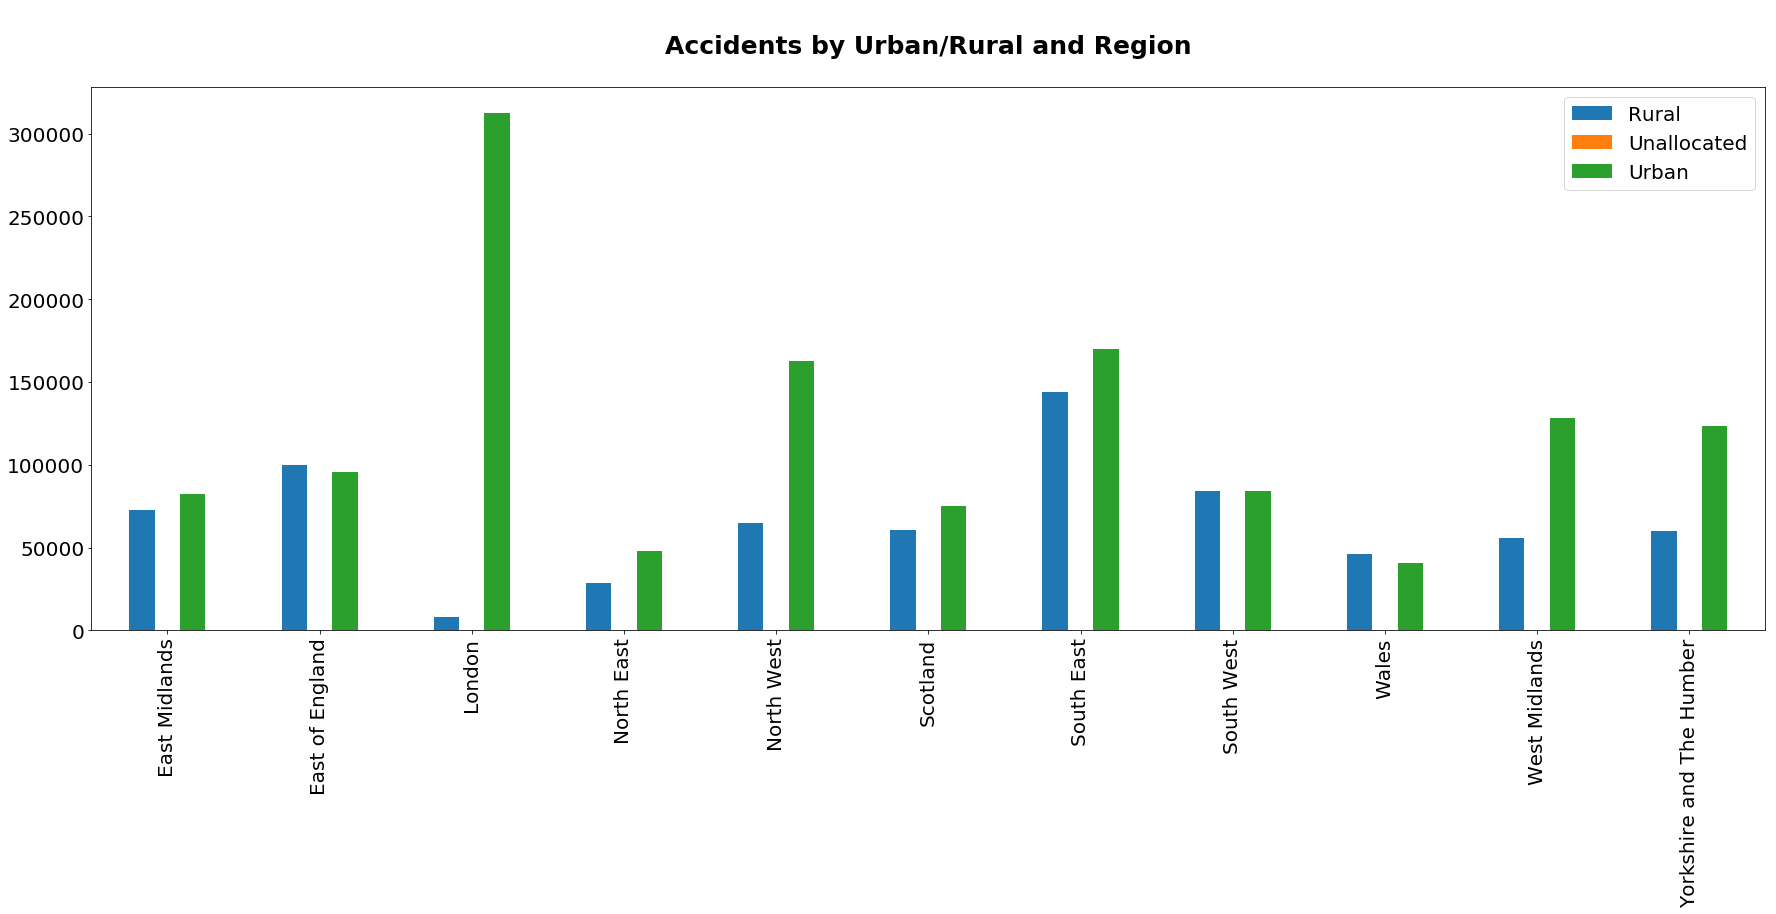

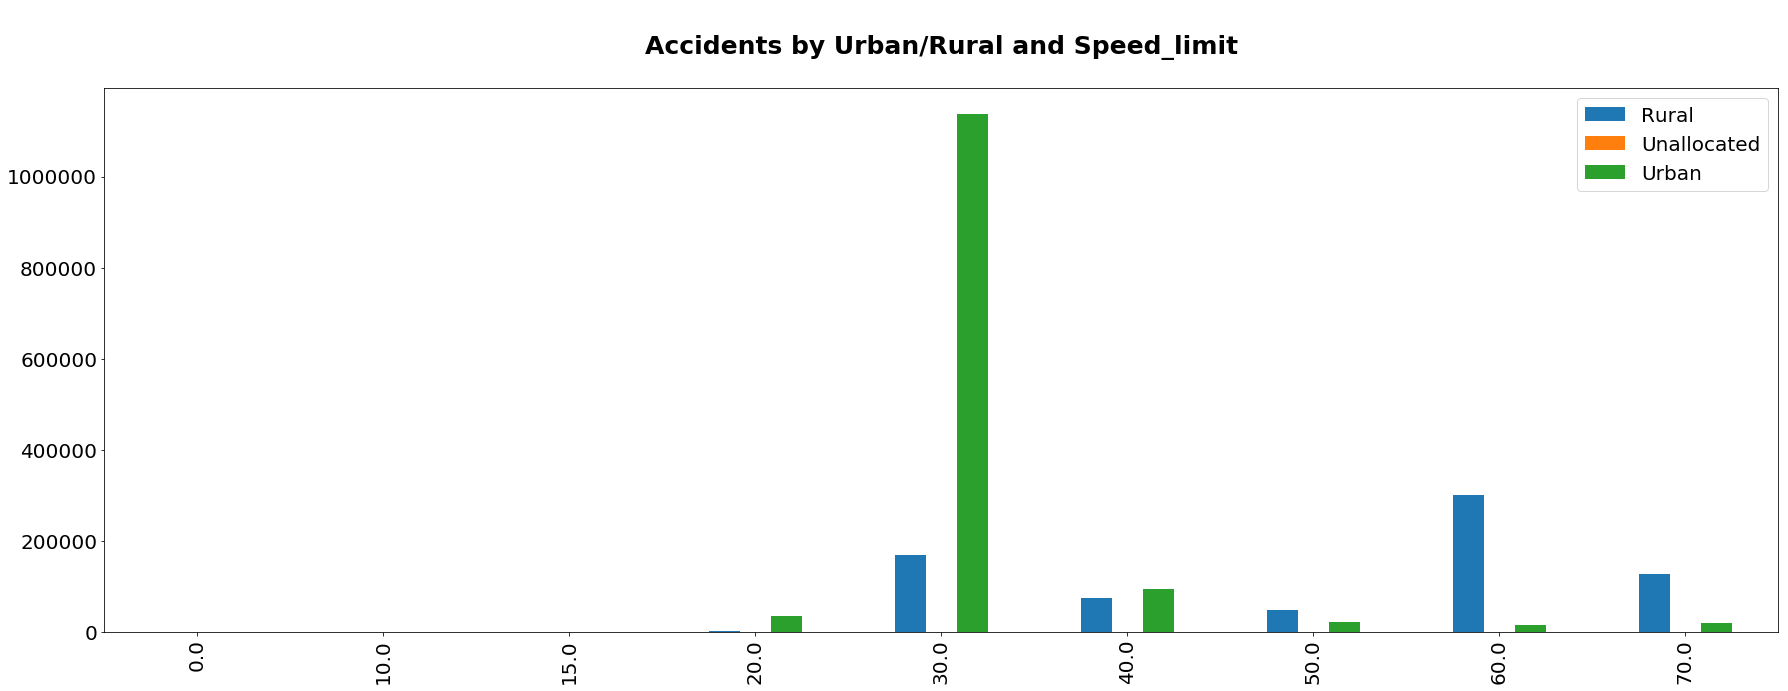

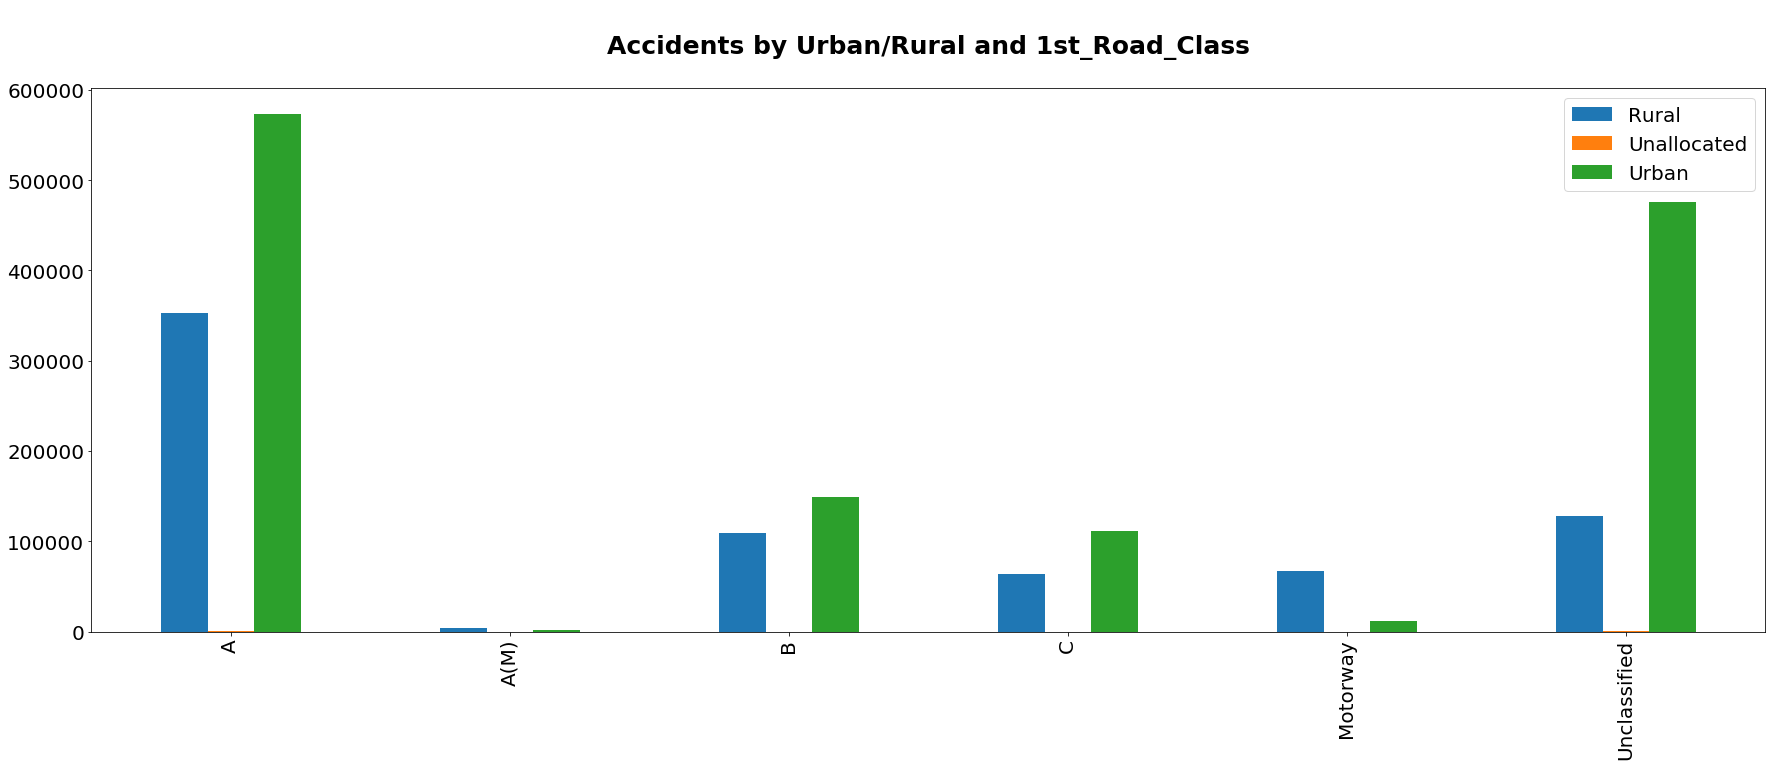

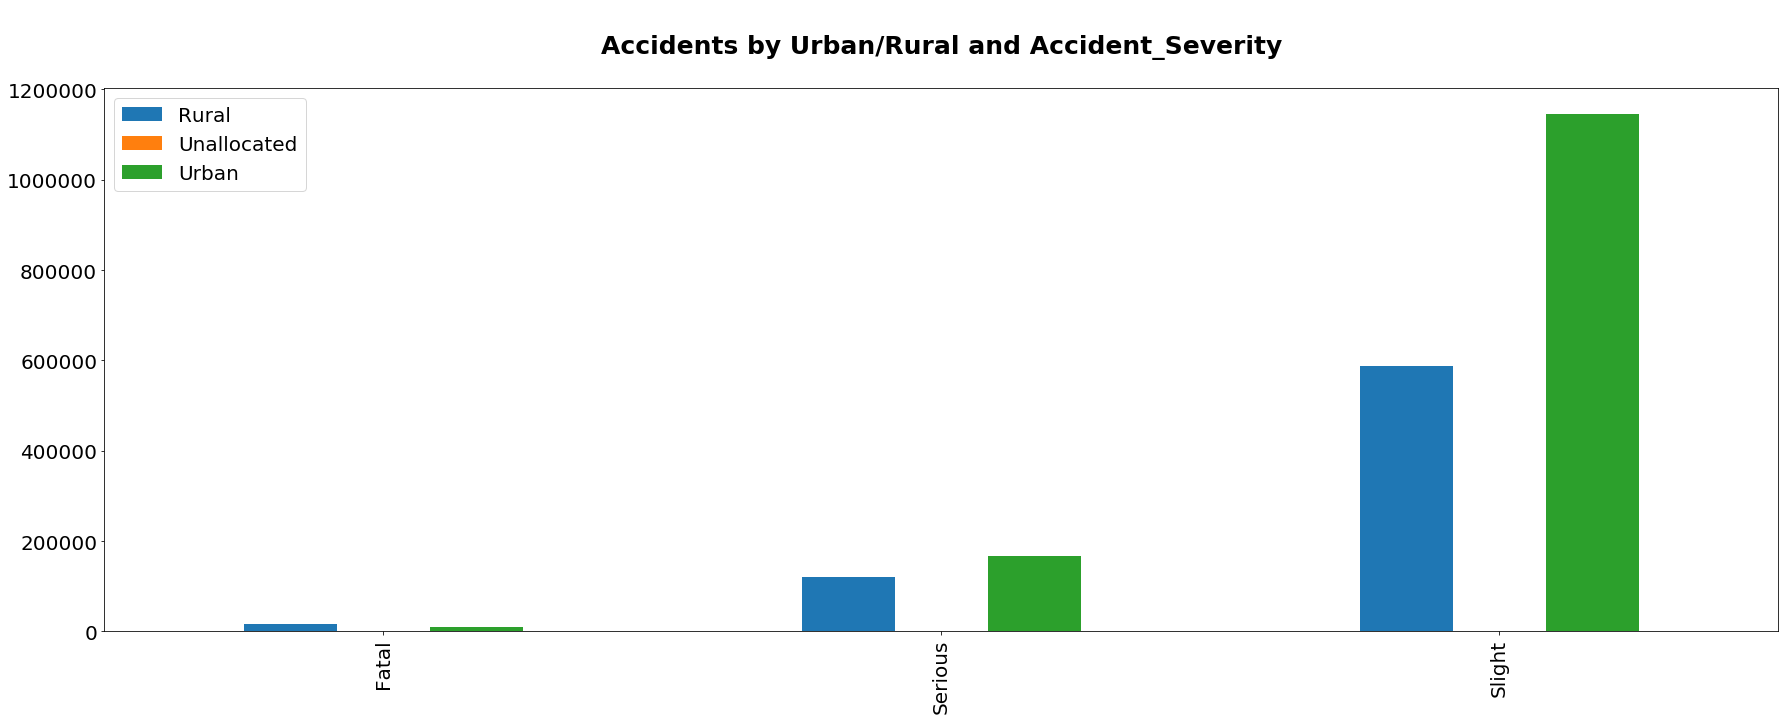

In [23]:
variables_to_plot_Urban_or_Rural=['Region','Speed_limit','1st_Road_Class','Accident_Severity']
making_tables_Urban_or_Rural_wrt_variables(variables_to_plot_Urban_or_Rural)

In [85]:
# London has got all Urban accidents. Very few Rural accidents which happened only on Motorway.

In [86]:
# Fatal/Serious accidents happened more in Rural on Motorway and A(M)

### Plotting every variable wrt accidents severity

In [87]:
# method to plot graphs for every variable wrt accidents severity
def making_tables_severity_wrt_variables(variables):
    for i, var in enumerate(variables):
        table_i=Accident_1.groupby([Accident_1[var],Accident_1['Accident_Severity']]).size()
        table_i = table_i.rename_axis([var, 'Accident_Severity']).unstack('Accident_Severity')
        table_i.drop(['Slight'], axis=1, inplace=True)
        fig = plt.rcParams["figure.figsize"]=(30,10)
        table_i.plot(kind='bar')
        plt.title('\nAccidents by Severity and ' + var + '\n', fontsize='25', fontweight='bold')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(prop={'size': 15})
        plt.xlabel('')
        plt.ylabel('');

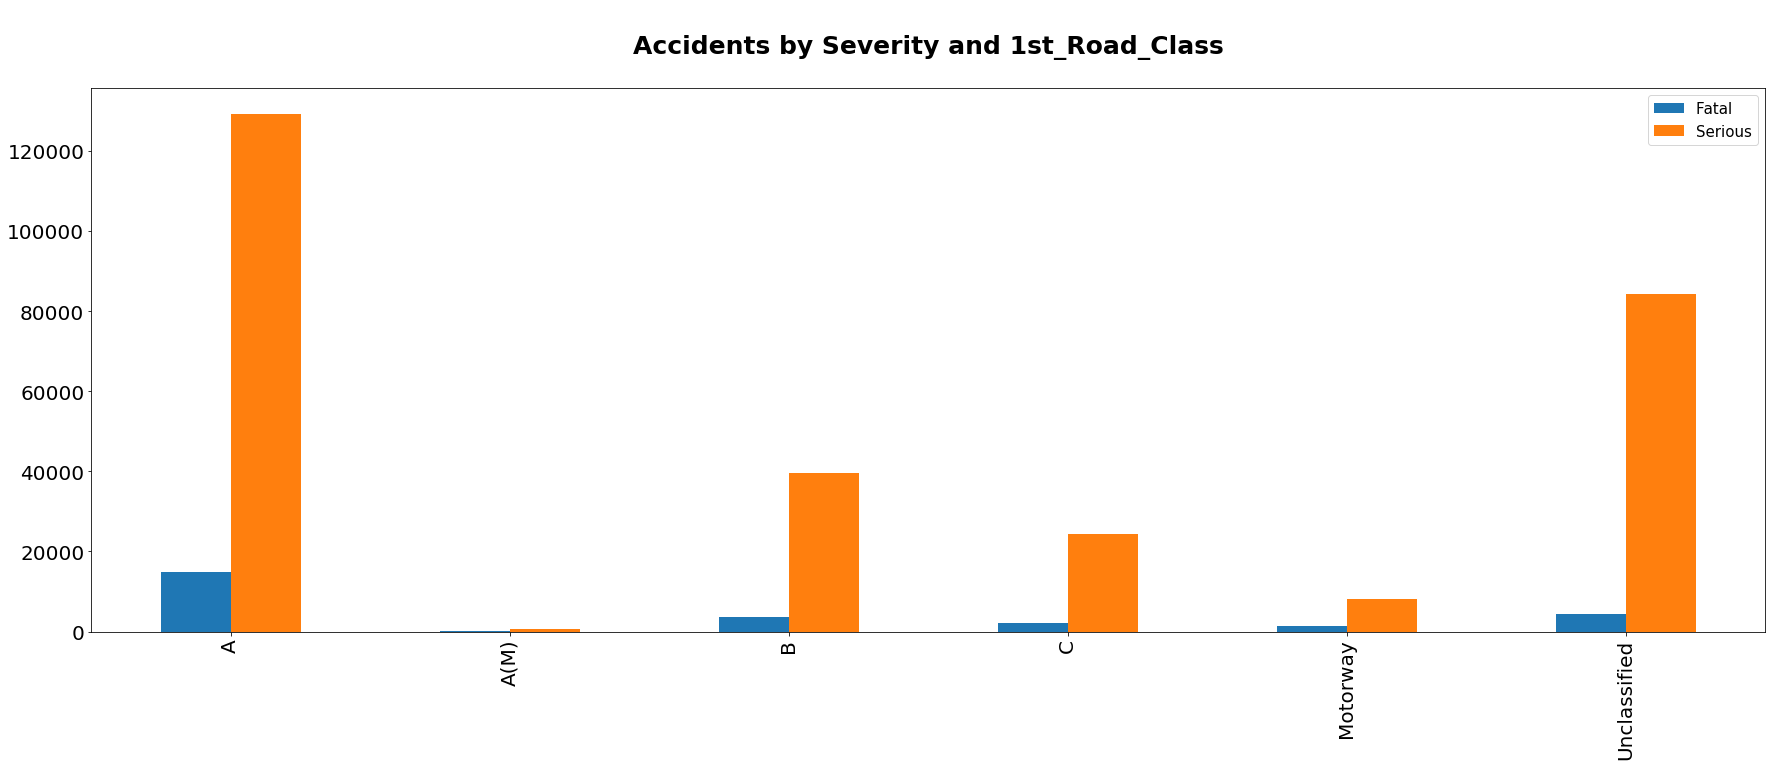

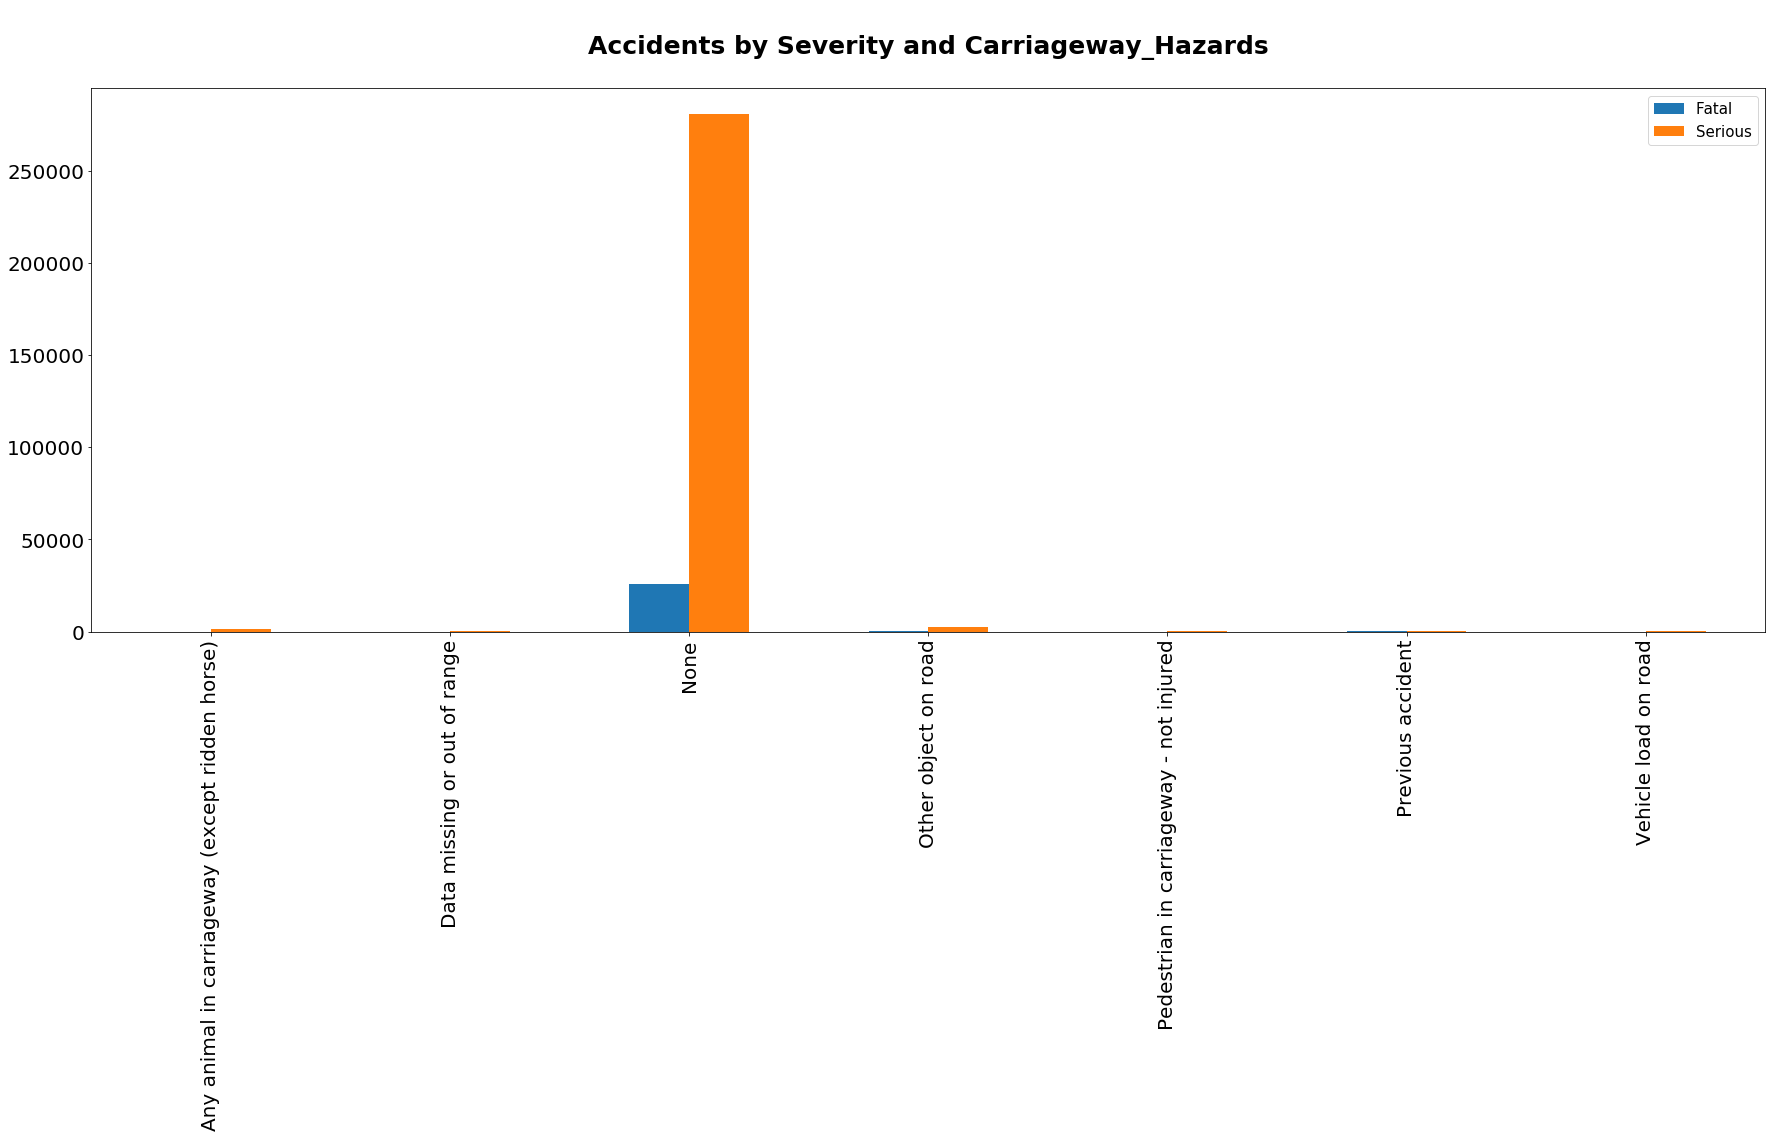

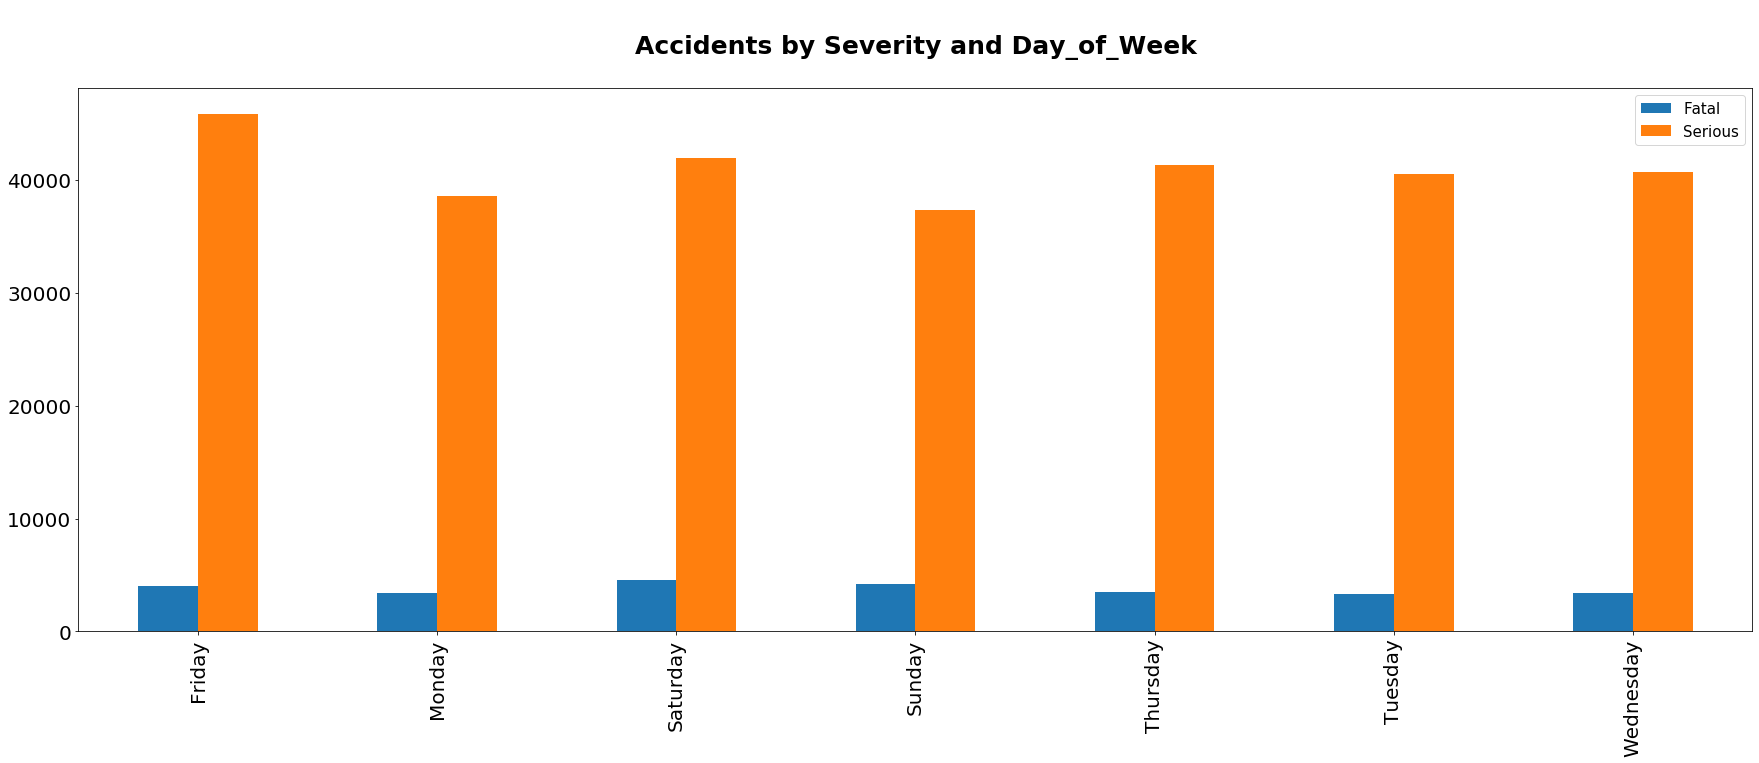

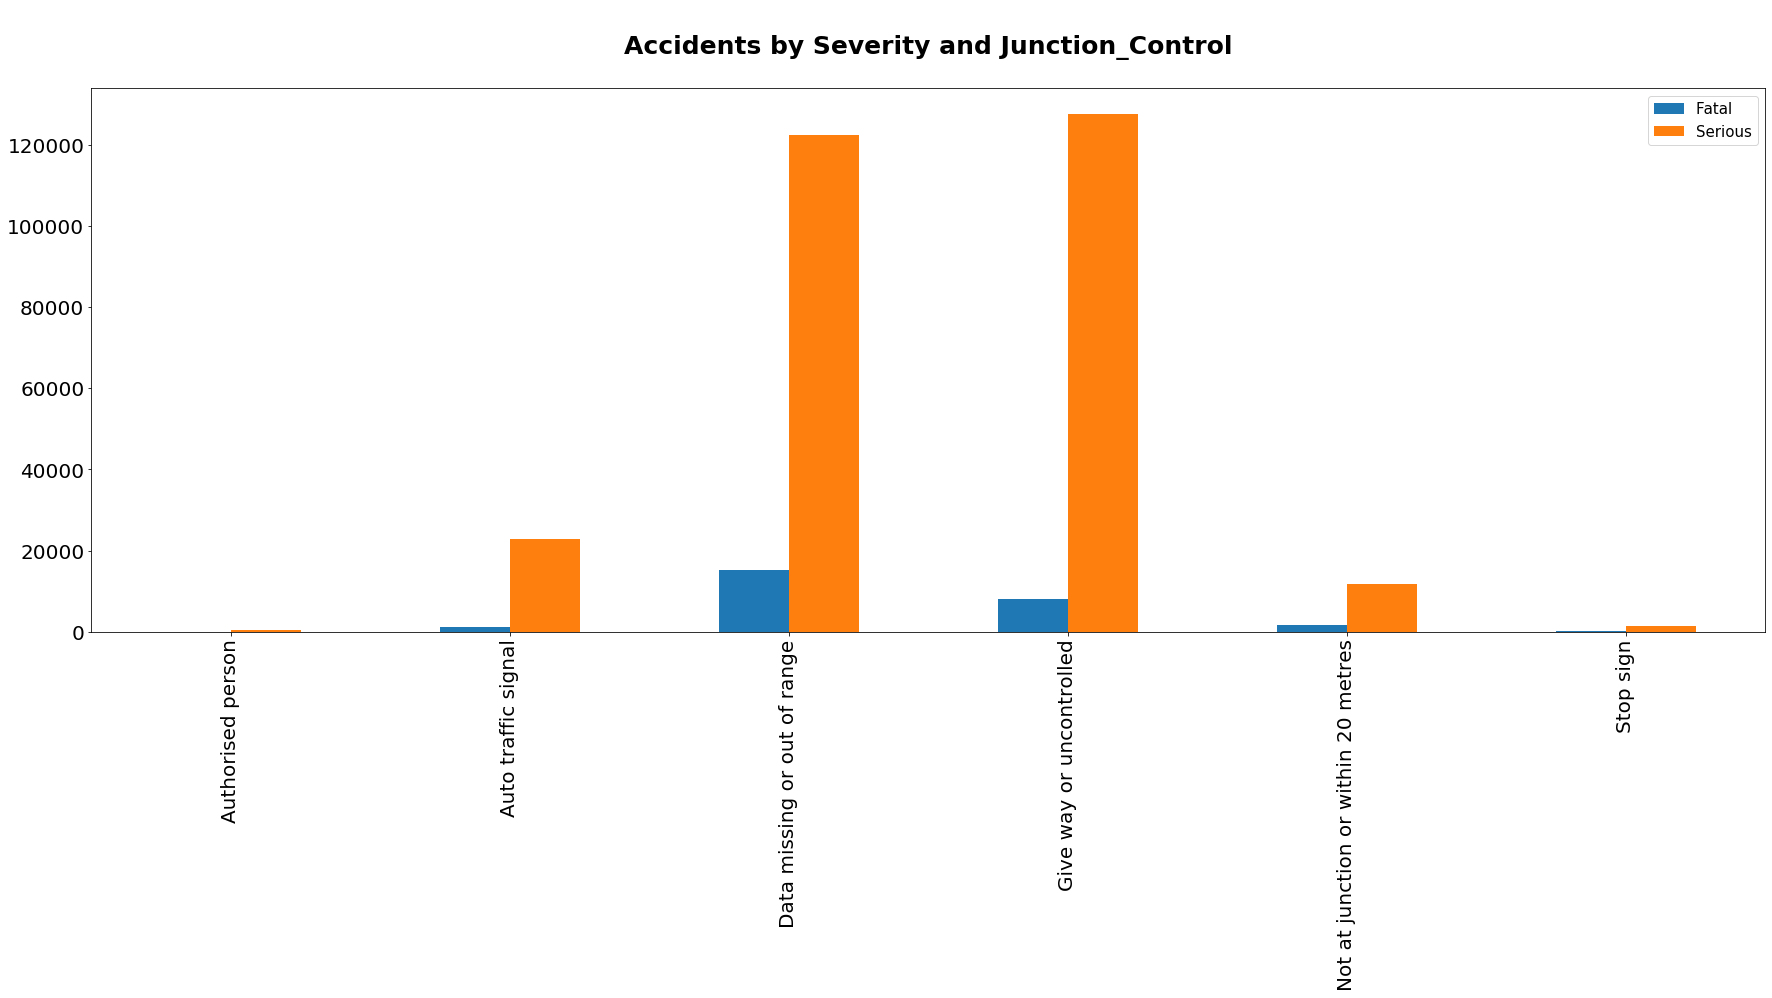

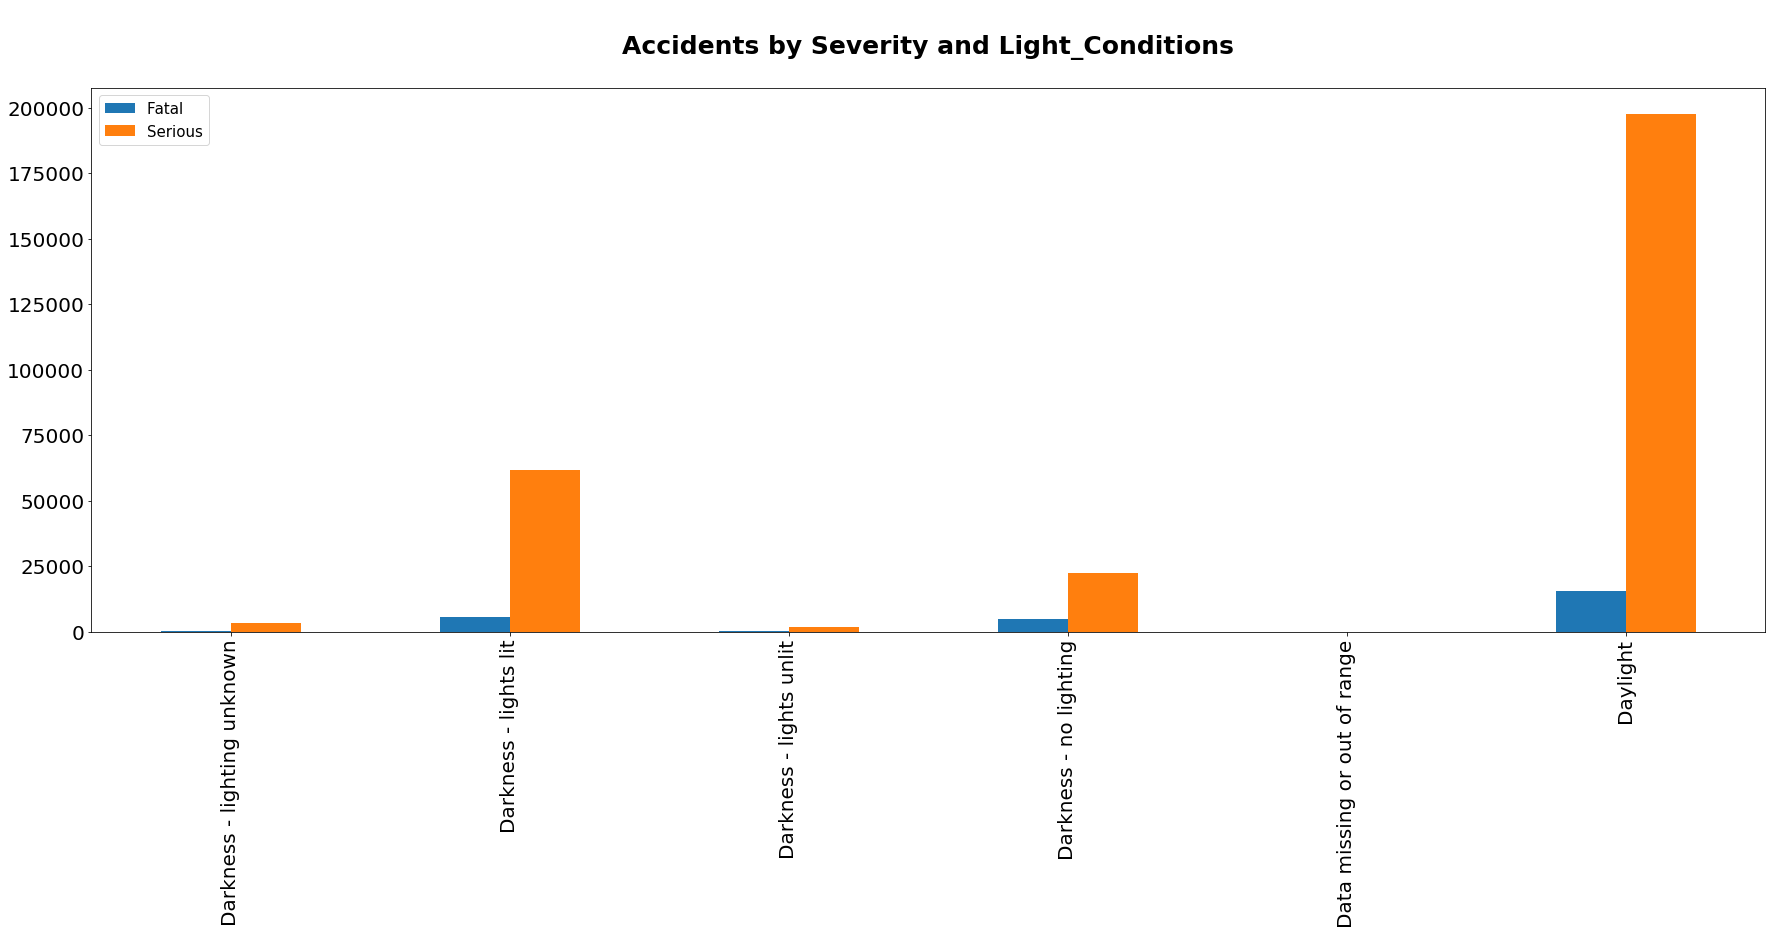

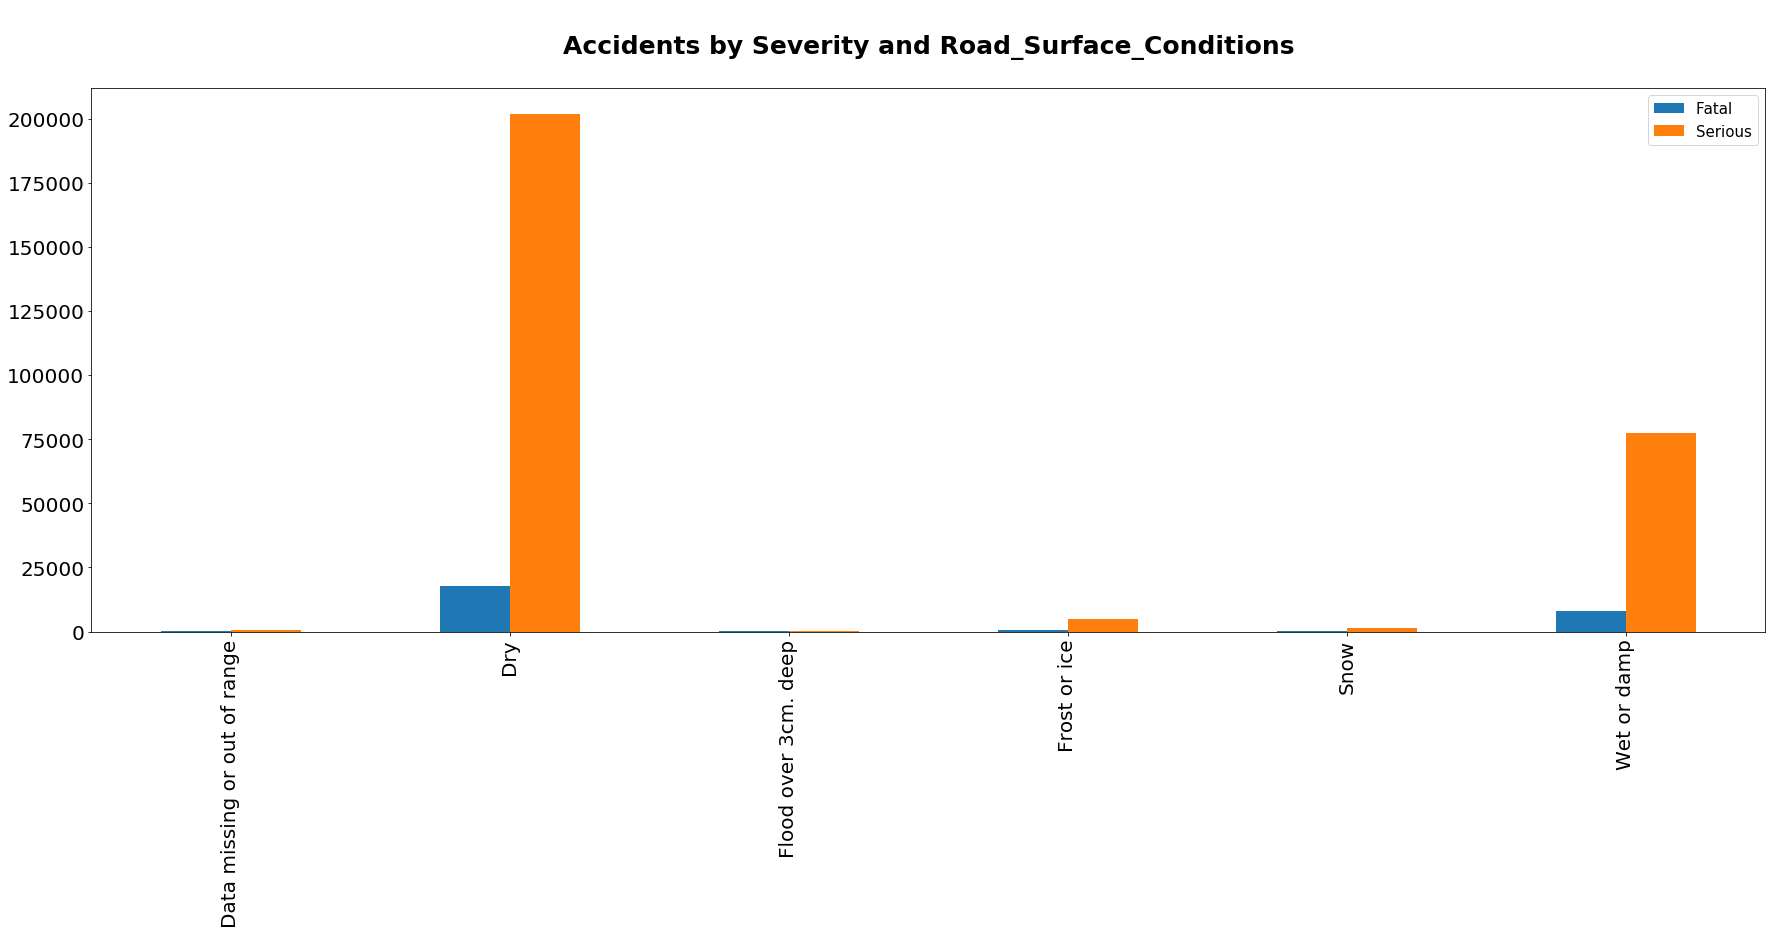

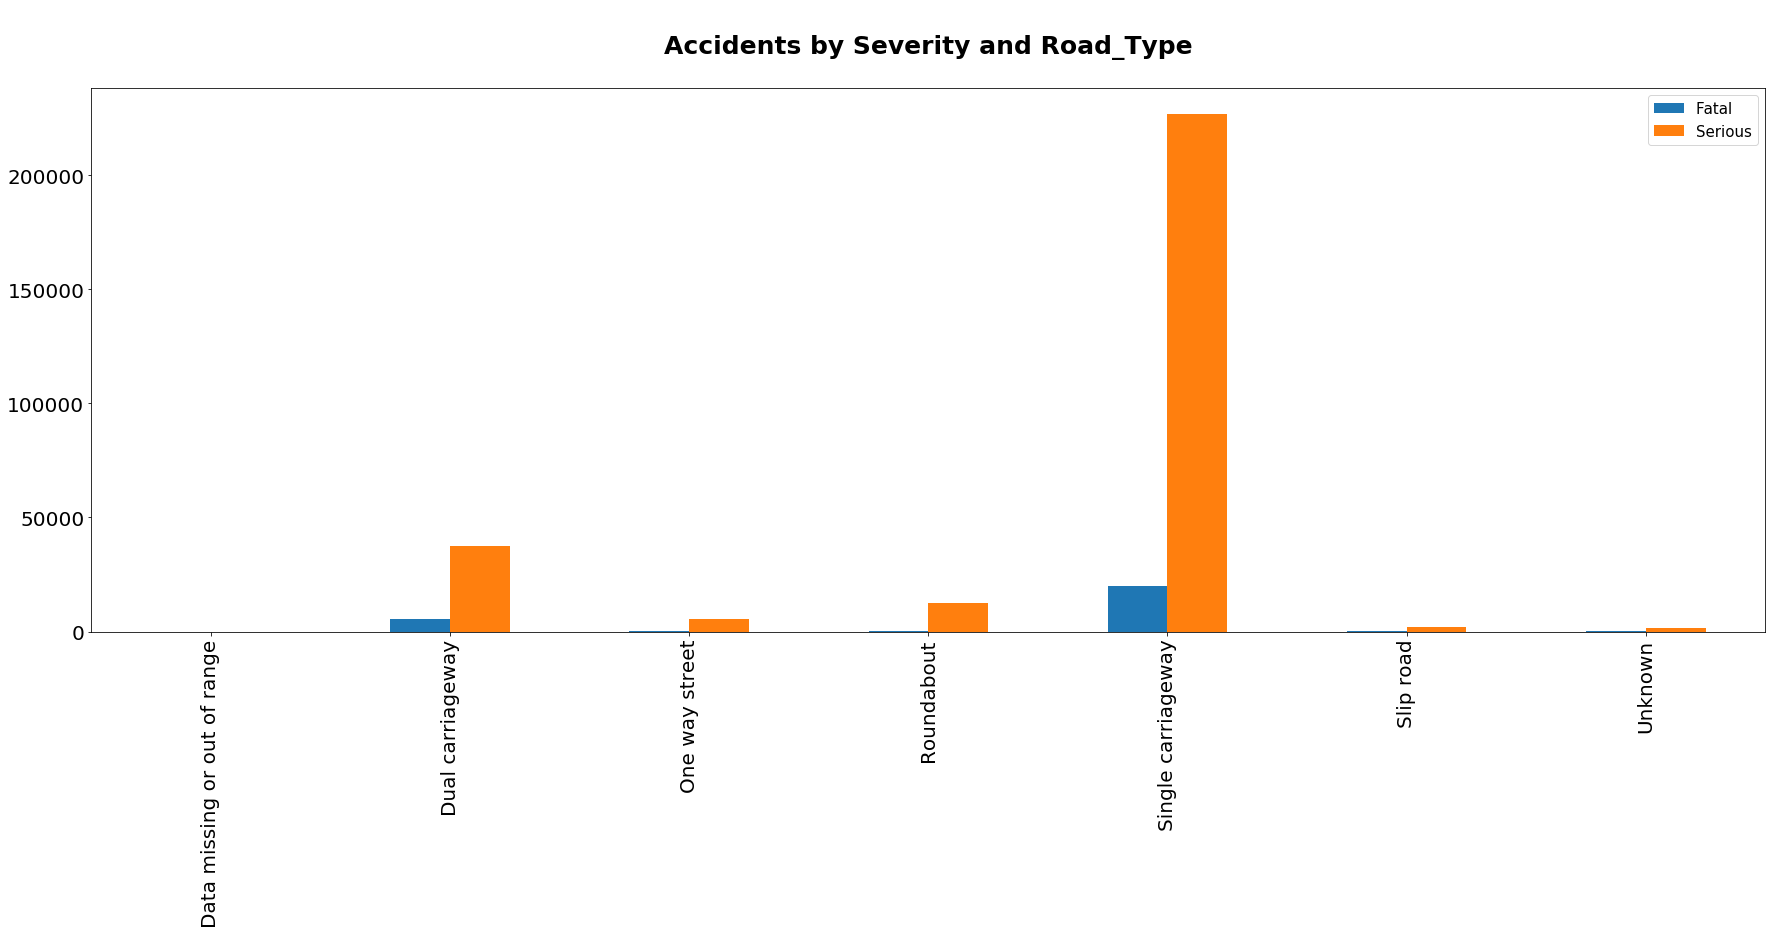

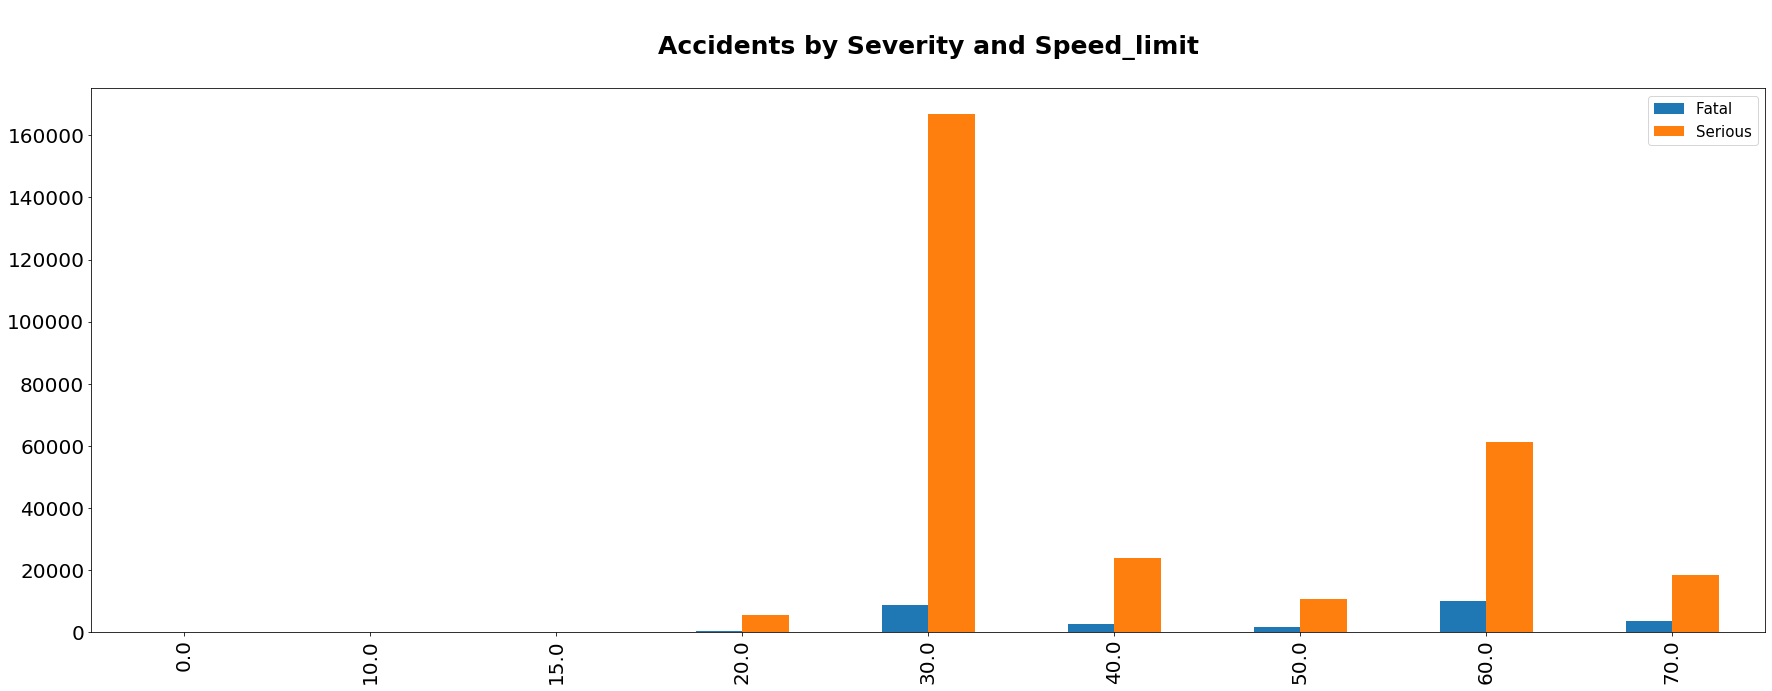

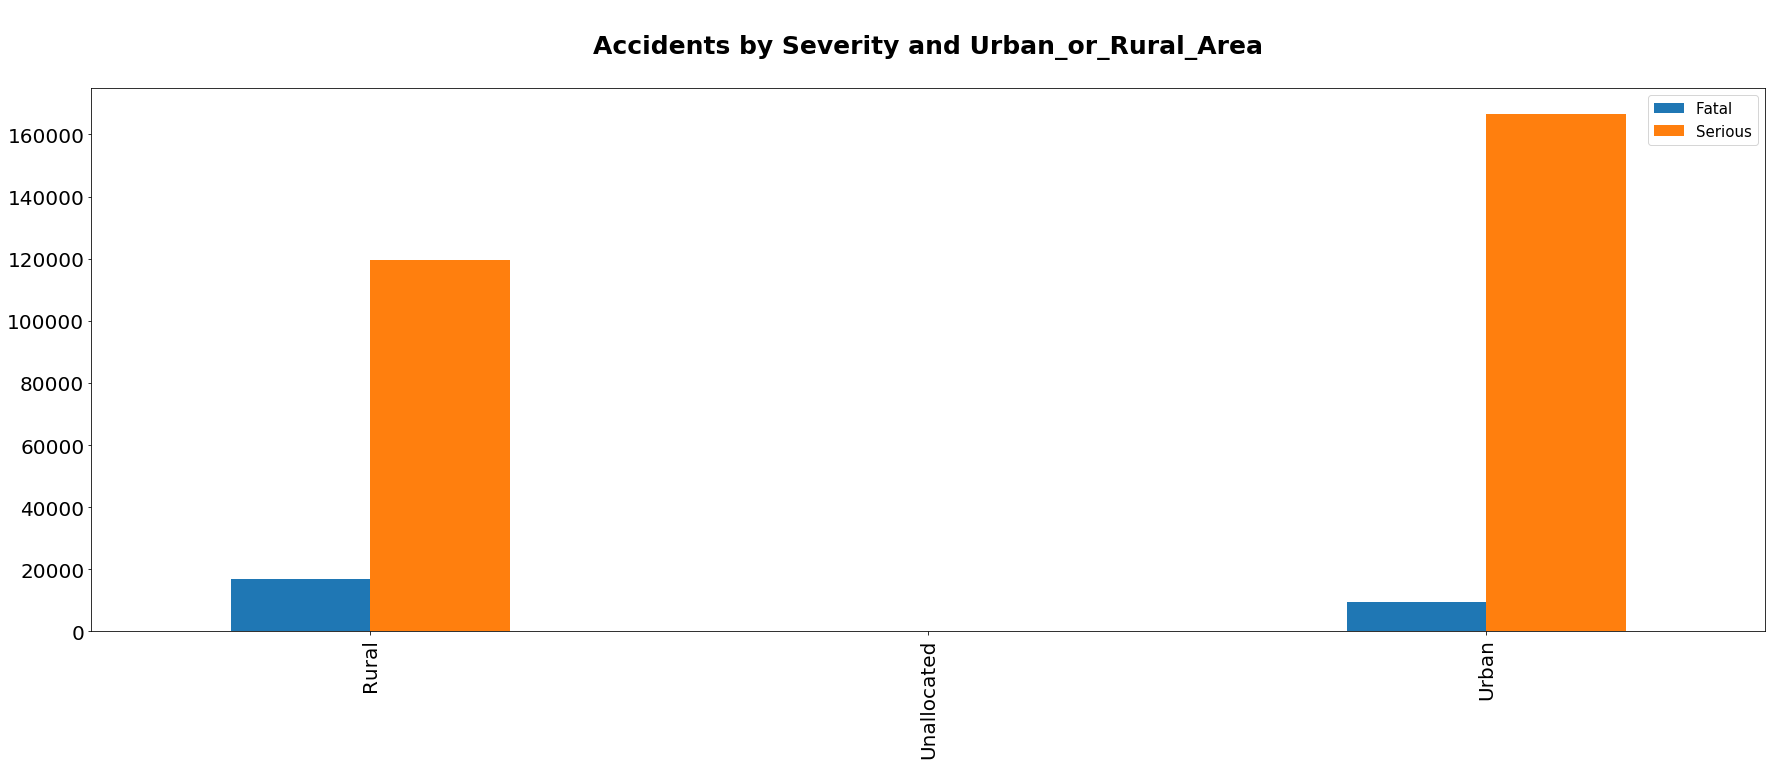

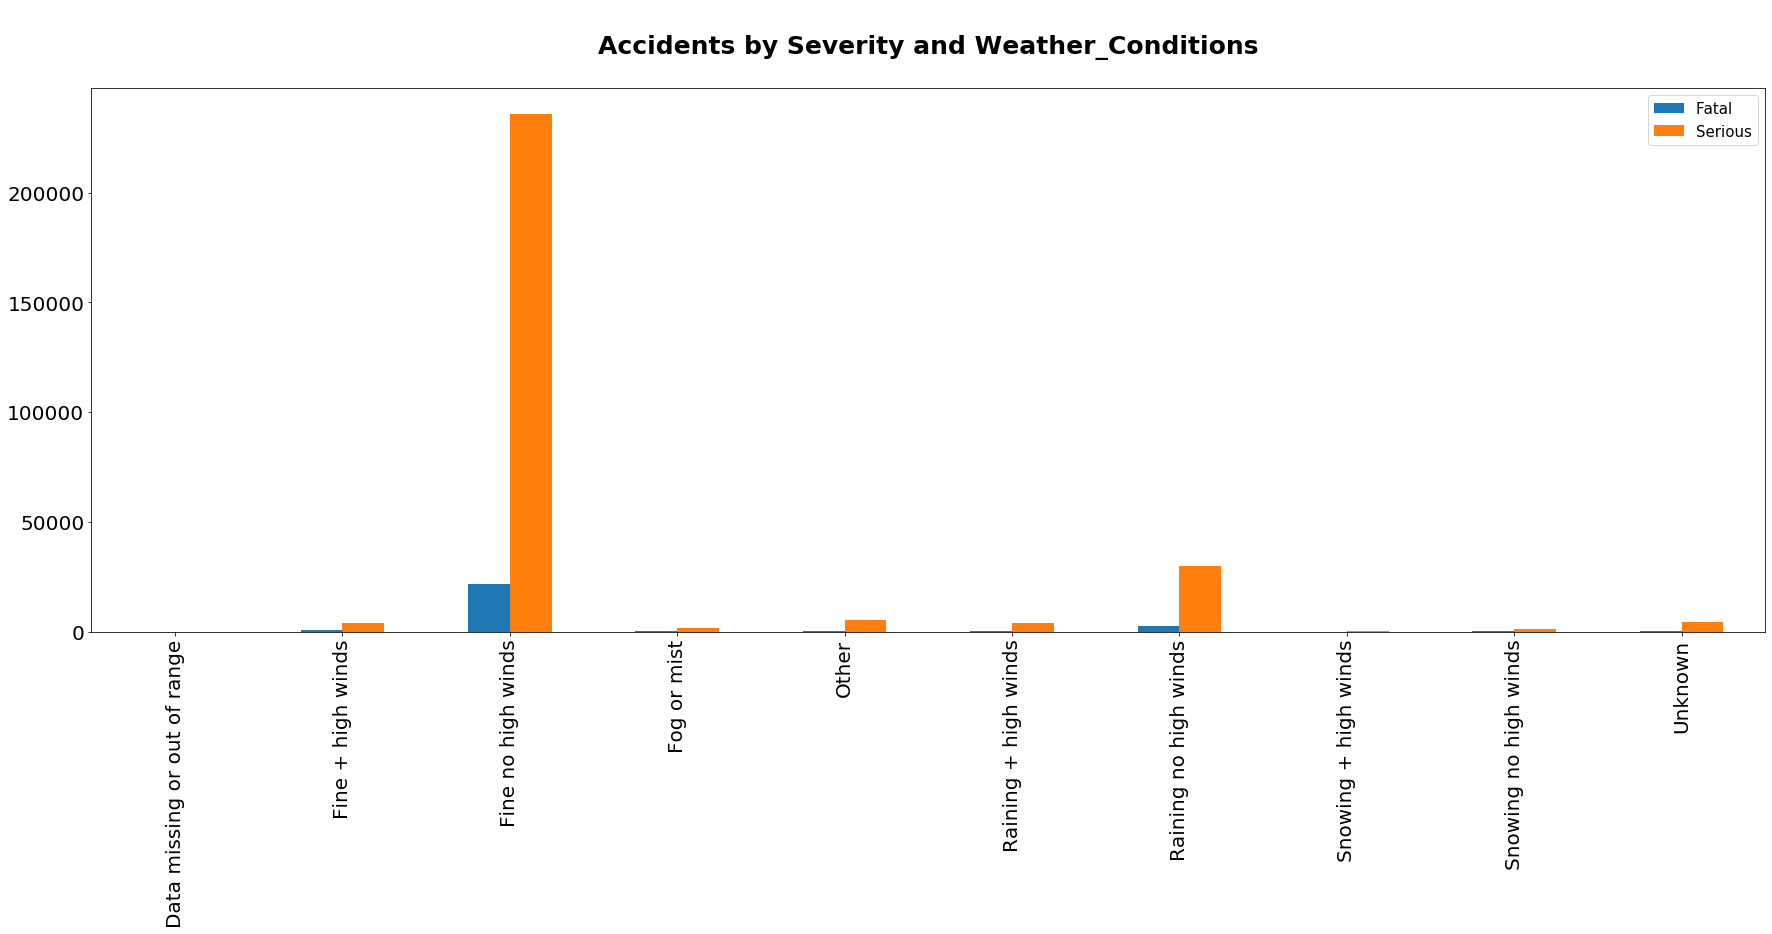

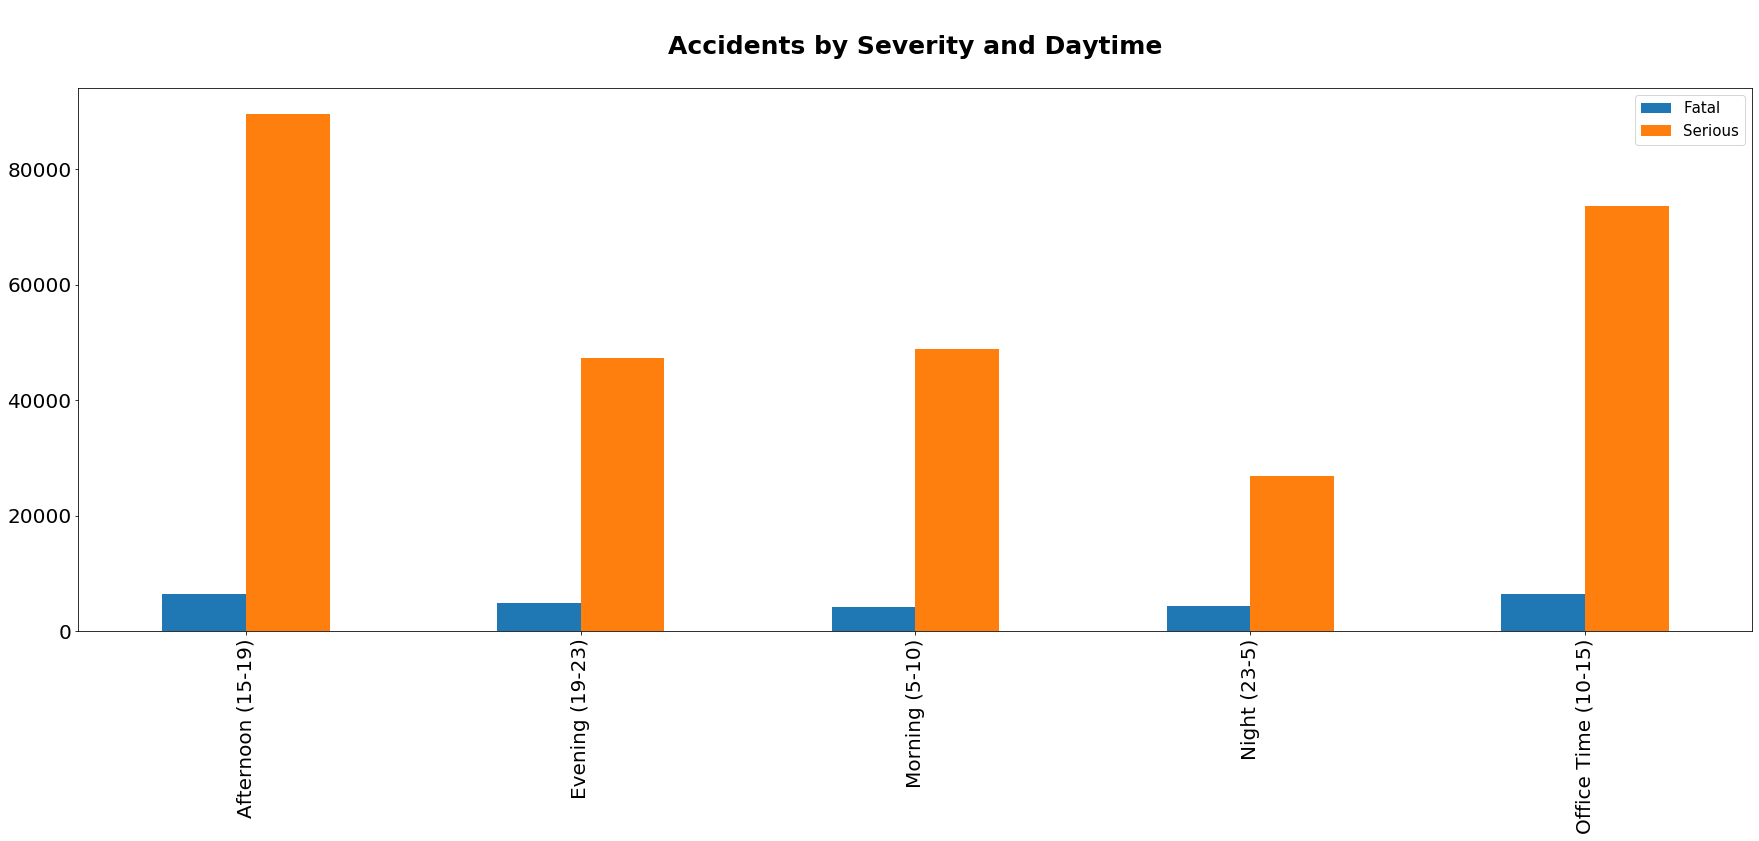

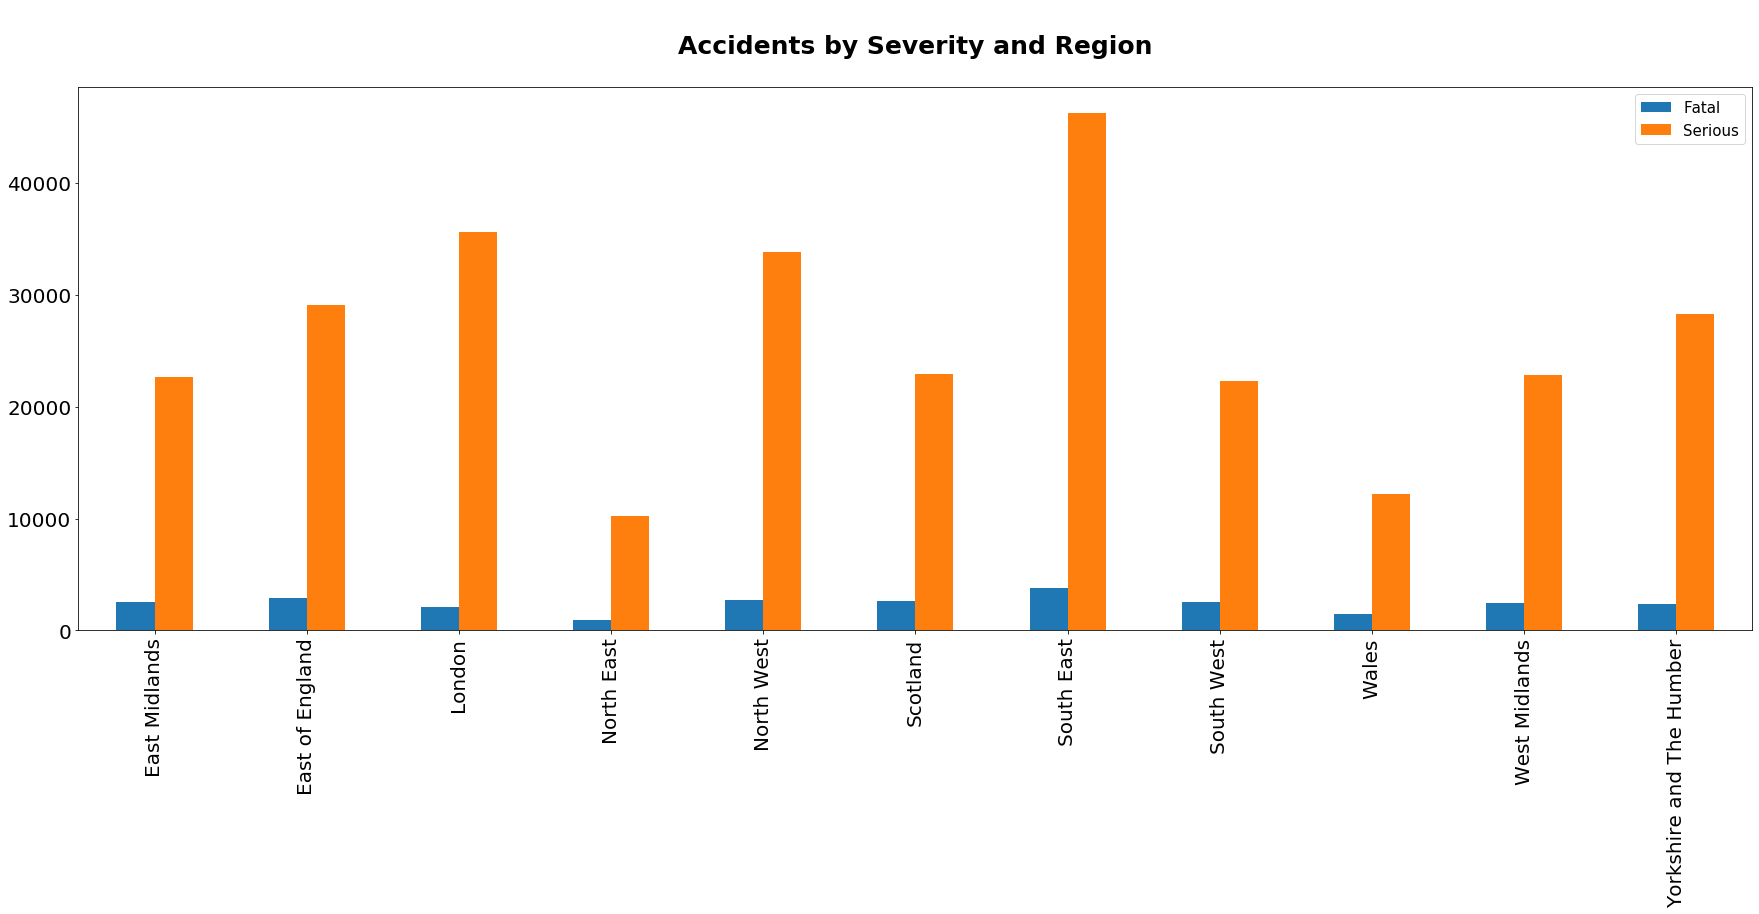

In [88]:
variables_to_plot_severity=['1st_Road_Class','Carriageway_Hazards','Day_of_Week','Junction_Control','Light_Conditions','Road_Surface_Conditions','Road_Type','Speed_limit','Urban_or_Rural_Area','Weather_Conditions','Daytime','Region']
making_tables_severity_wrt_variables(variables_to_plot_severity)

In [89]:
#Regardin fatal and serious accidents: North West, London and South East are the major ones

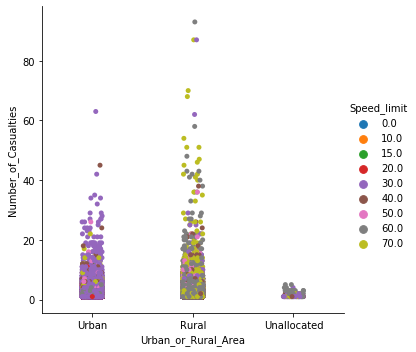

In [47]:
sns.catplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=Accident_1, hue='Speed_limit')
# Rural accidents occurred at 70 km/hr speed while urban accidents mostly occurred at normal avg speed i.e. 30 km/hr

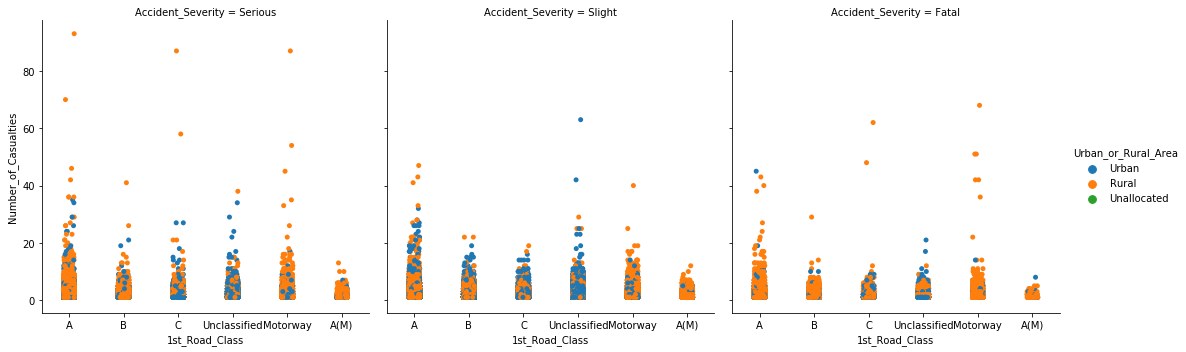

In [21]:
sns.catplot(x='1st_Road_Class', y='Number_of_Casualties', data=Accident_1, hue='Urban_or_Rural_Area', 
            col='Accident_Severity')

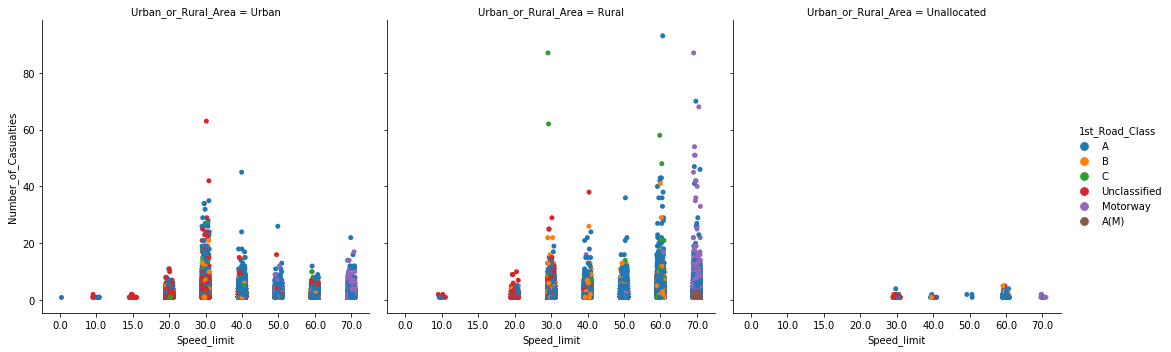

In [36]:
sns.catplot(x='Speed_limit', y='Number_of_Casualties', data=Accident_1, hue='1st_Road_Class', 
            col='Urban_or_Rural_Area')

In [ ]:
# Rural accidents occurred at 60/70 miles/hour speed while urban accidents mostly occurred at normal avg speed i.e. 30 km/hr
#Accidents with 70 speed happened on Motorway in Rural areas

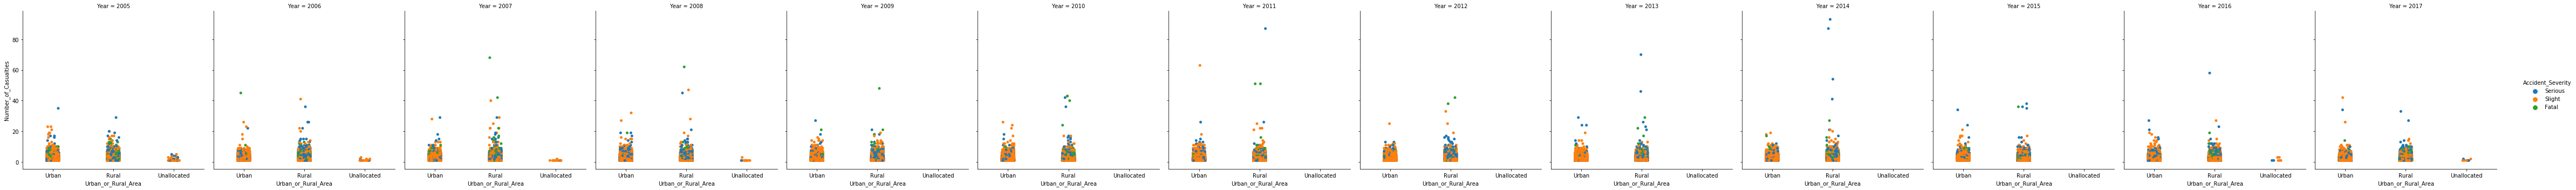

In [37]:
sns.catplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=Accident_1, hue='Accident_Severity', 
            col='Year')

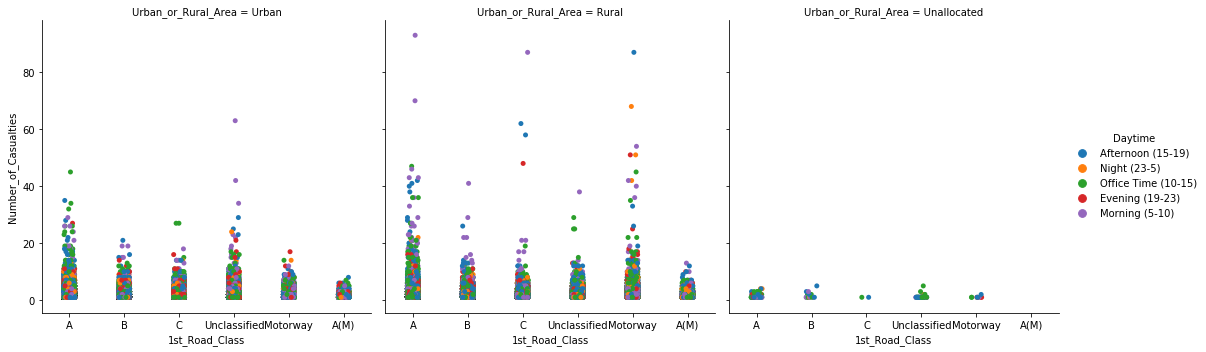

In [48]:
sns.catplot(x='1st_Road_Class', y='Number_of_Casualties', data=Accident_1, hue='Daytime', 
            col='Urban_or_Rural_Area')
#Maximum no of causalties in Rural area happened in Road_Class= A and Motorway

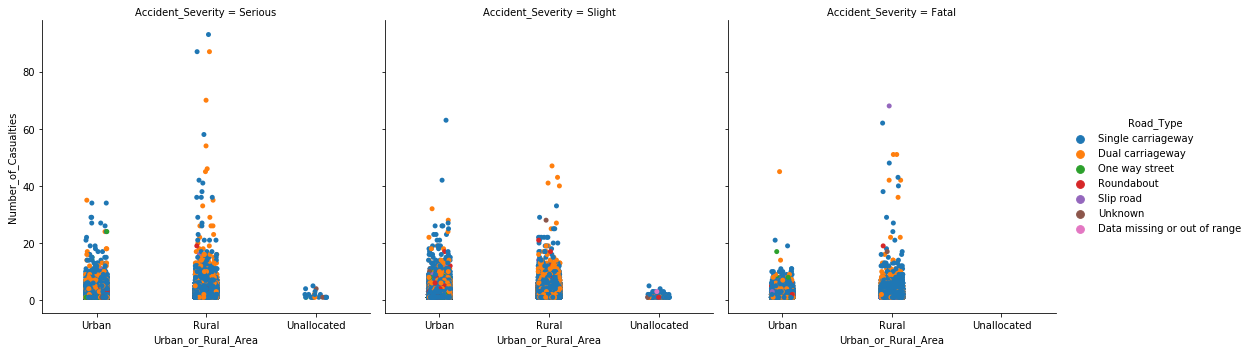

In [49]:
sns.catplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=Accident_1, hue='Road_Type', 
            col='Accident_Severity')
#Rural accidents which involved high no of casualties were of serious and fatal severity and happened on 
#road type = single and dual carriageway

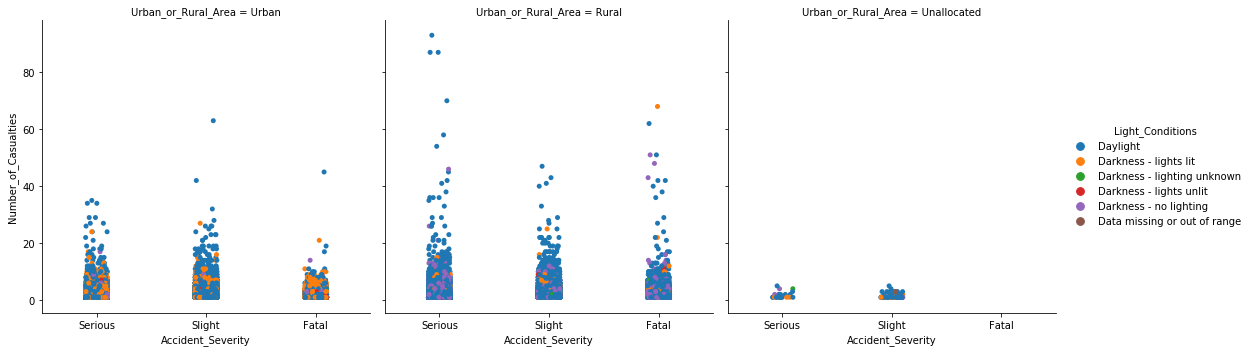

In [50]:
sns.catplot(x='Accident_Severity', y='Number_of_Casualties', data=Accident_1, hue='Light_Conditions', 
            col='Urban_or_Rural_Area')
#In Urban areas, majority of fatal accidents occurred in Darkness-lights lit

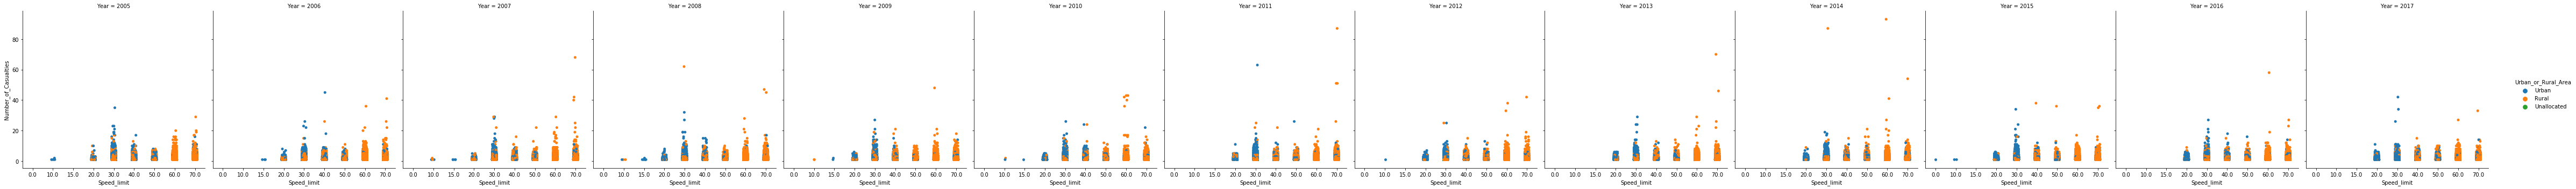

In [51]:
sns.catplot(x='Speed_limit', y='Number_of_Casualties', data=Accident_1, hue='Urban_or_Rural_Area', 
            col='Year')
# Accidents involving Higher speed vehicles (60-70 km/hr) happened in Rural areas majorly. 

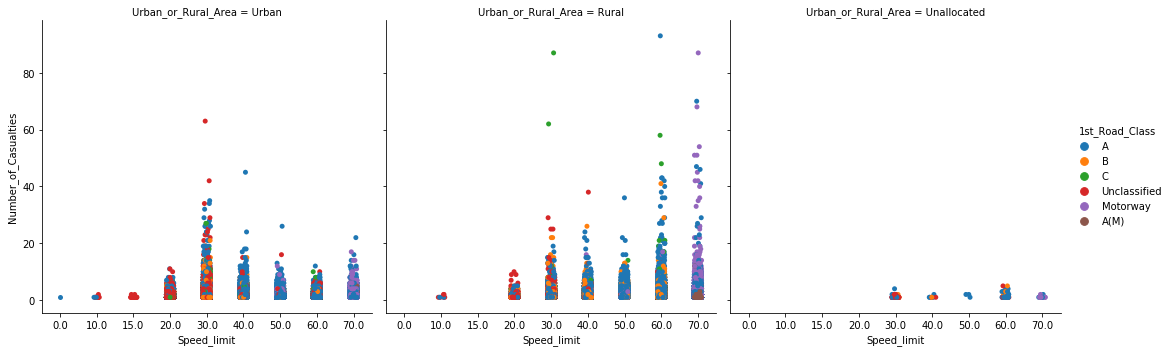

In [52]:
sns.catplot(x='Speed_limit', y='Number_of_Casualties', data=Accident_1, hue='1st_Road_Class', 
            col='Urban_or_Rural_Area')
# Accidents with 70 speed happened on Motorway in Rural areas

In [53]:
locality=Accident_1['Local_Authority_(District)'].value_counts()

In [106]:
locality.to_csv(r'C:\Users\khand\Desktop\jupyter\locality.csv')

/Users/passa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


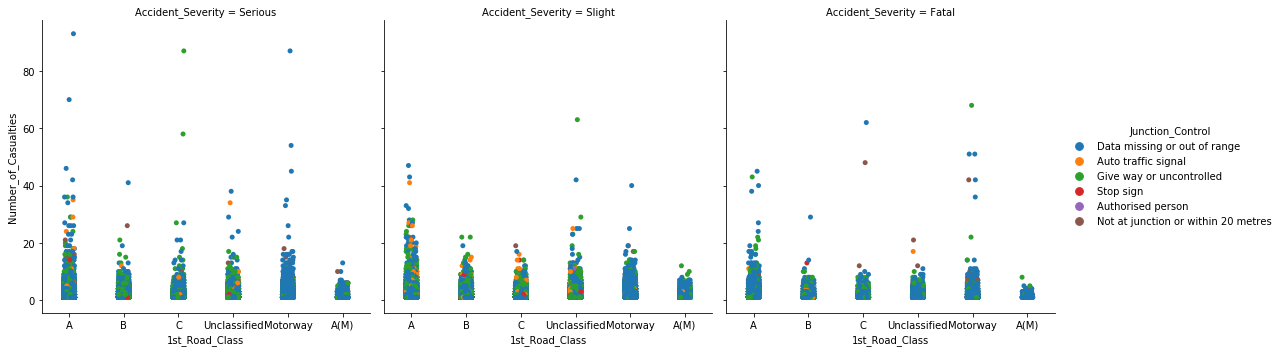

In [107]:
sns.catplot(x='1st_Road_Class', y='Number_of_Casualties', data=Accident_1, hue='Junction_Control', 
            col='Accident_Severity')

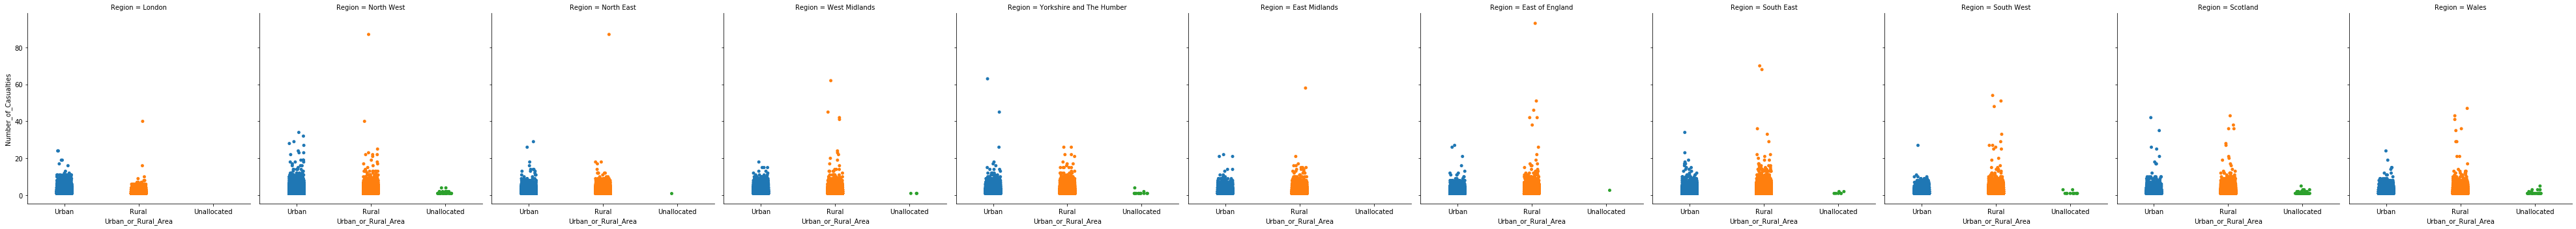

In [108]:
sns.catplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=Accident_1, 
            col='Region')

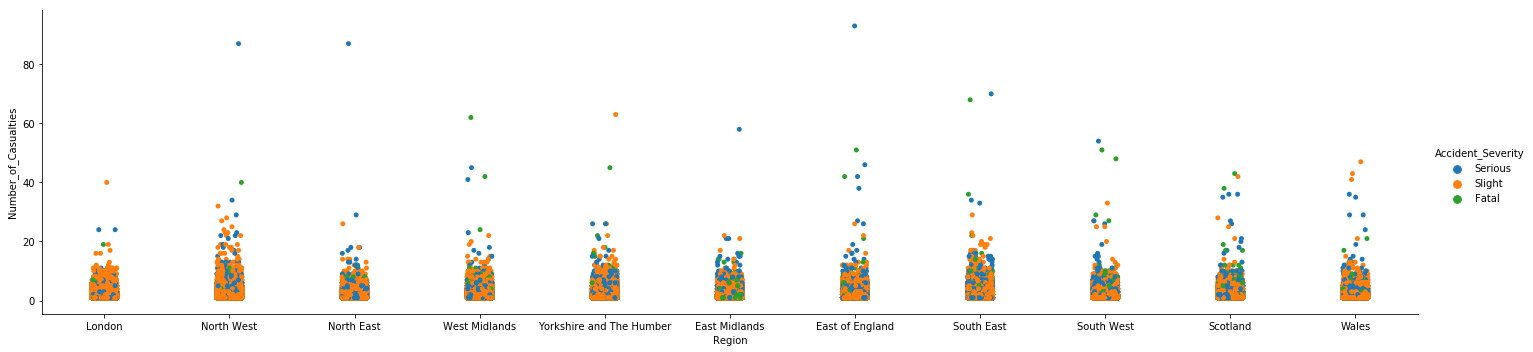

In [26]:
sns.catplot(x='Region', y='Number_of_Casualties', data=Accident_1, hue='Accident_Severity', aspect=4)
           # col='Region')

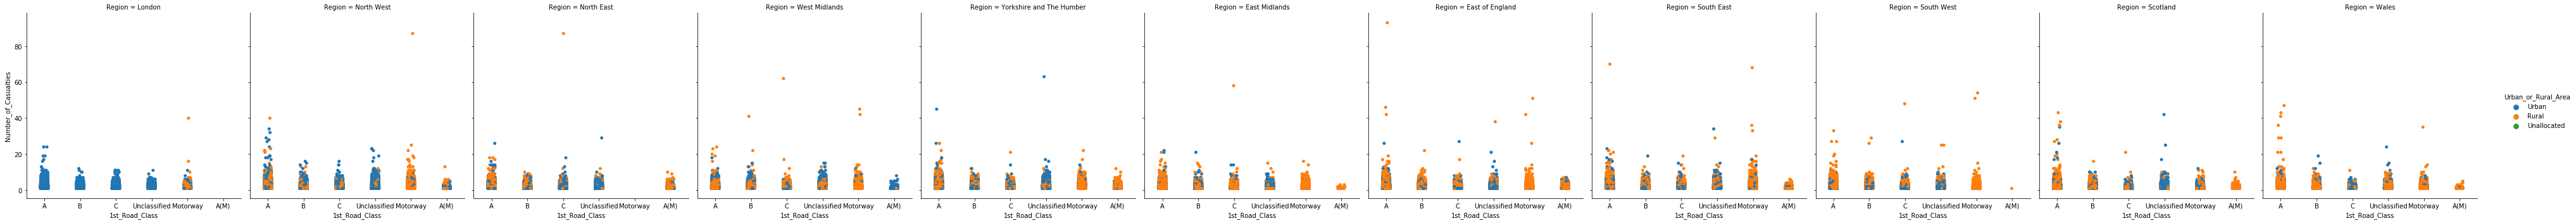

In [109]:
sns.catplot(x='1st_Road_Class', y='Number_of_Casualties', data=Accident_1, hue='Urban_or_Rural_Area',
            col='Region')

In [90]:
# London: Rural accidents occurred only on Motorway.
# North West: Motorway and A(M) has Rural Accidents in major.
# North East: No Accident on Motorway.
# West Midlands: Motorway has Rural accidents in major and A(M) has urban accidents in major.
# Yorkshire and Humber: Unclassified has Urban accidents in major, other roads have rural accidents
# Scotland - same as Yorkshire and Humber
# East Midlands - same as Yorkshire and Humber
# South East - same as Yorkshire and Humber
# Wales - C has Urban accidents in major, other roads have rural accidents
# East of England - same as Yorkshire and Humber
# South West - same as Yorkshire and Humber

In [91]:
Vehicle_1.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact', 'Year'],
      dtype='object')

In [92]:
Vehicle_1.drop(["Driver_Home_Area_Type","Driver_IMD_Decile","Hit_Object_in_Carriageway","Hit_Object_off_Carriageway","Journey_Purpose_of_Driver","Junction_Location","model","Engine_Capacity_.CC.","Propulsion_Code","Towing_and_Articulation","Vehicle_Leaving_Carriageway","Vehicle_Reference","Was_Vehicle_Left_Hand_Drive","X1st_Point_of_Impact"], axis=1, inplace=True)

In [93]:
Vehicle_1.drop(["Vehicle_Location.Restricted_Lane","Vehicle_Type"], axis=1, inplace=True)
#dropping because of one type of value

In [94]:
Vehicle_1.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'make',
       'Sex_of_Driver', 'Skidding_and_Overturning', 'Vehicle_Manoeuvre',
       'Year'],
      dtype='object')

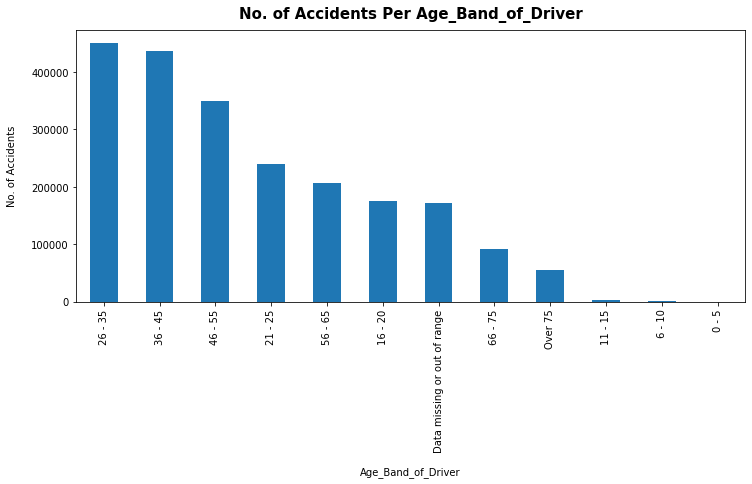

In [95]:
# Age_Band_of_Driver vs No of accidents
Vehicle_1['Age_Band_of_Driver'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Age_Band_of_Driver", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Age_Band_of_Driver", y=1.02, fontsize=15, fontweight='bold');

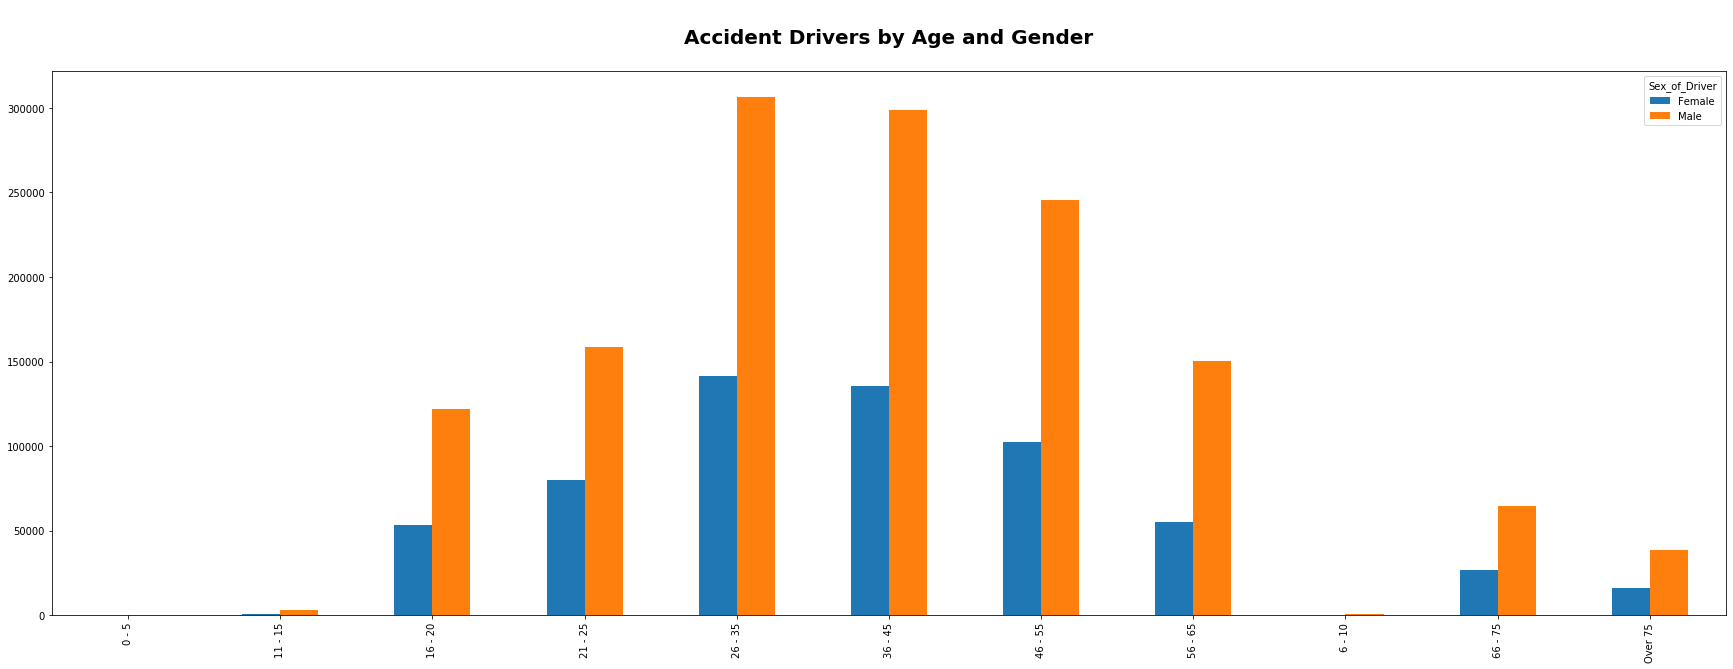

In [96]:
drivers = Vehicle_1.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size()
drivers = drivers.unstack('Sex_of_Driver')
del drivers['Data missing or out of range']
del drivers['Not known']
drivers = drivers.drop("Data missing or out of range", axis=0)
drivers

fig = plt.rcParams["figure.figsize"]=(30,10)

drivers.plot(kind='bar')
plt.title('\nAccident Drivers by Age and Gender\n', fontsize='20', fontweight='bold')
plt.xlabel('')
plt.ylabel('');

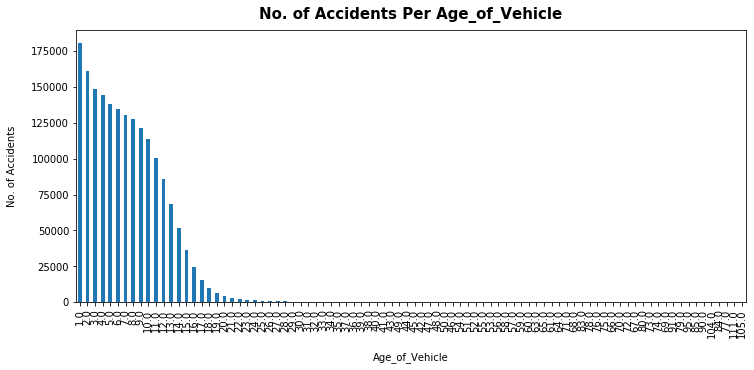

In [97]:
# Age_of_Vehicle vs No of accidents
Vehicle_1['Age_of_Vehicle'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Age_of_Vehicle", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Age_of_Vehicle", y=1.02, fontsize=15, fontweight='bold');

In [62]:
make=Vehicle_1['make'].value_counts()

In [63]:
make.to_csv(r'C:\Users\khand\Desktop\jupyter\make.csv')

/Users/passa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


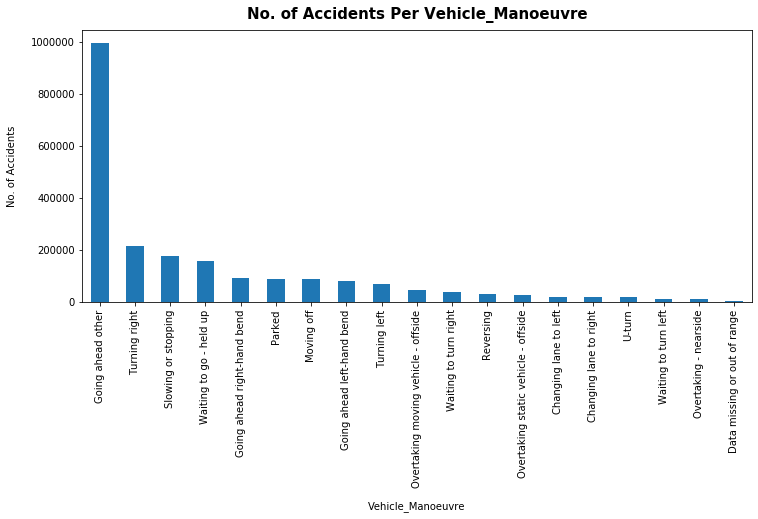

In [98]:
# Vehicle_Manoeuvre vs No of accidents
Vehicle_1['Vehicle_Manoeuvre'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Vehicle_Manoeuvre", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Vehicle_Manoeuvre", y=1.02, fontsize=15, fontweight='bold');

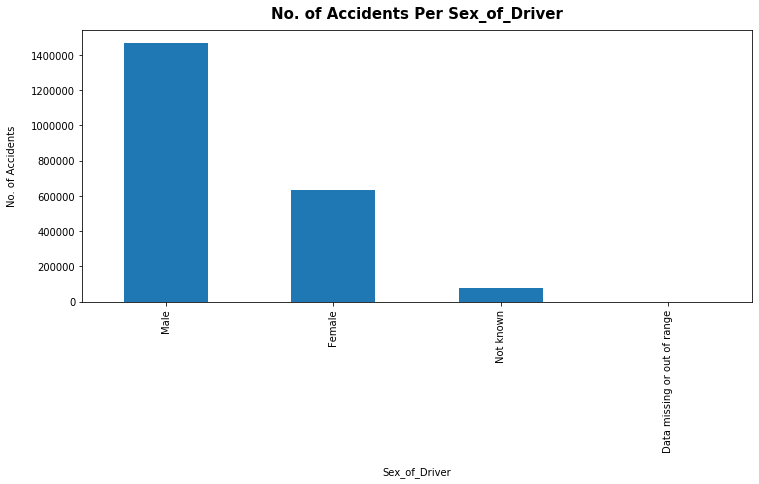

In [99]:
# Sex_of_Driver vs No of accidents
Vehicle_1['Sex_of_Driver'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Sex_of_Driver", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Sex_of_Driver", y=1.02, fontsize=15, fontweight='bold');

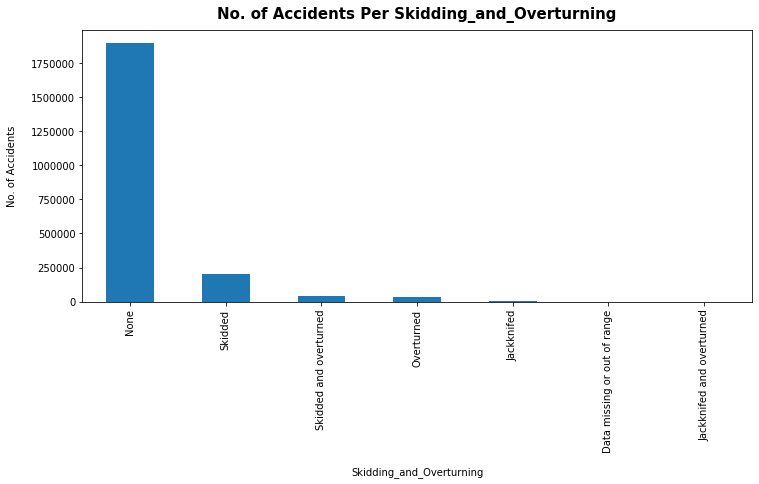

In [100]:
# Skidding_and_Overturning vs No of accidents
Vehicle_1['Skidding_and_Overturning'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Skidding_and_Overturning", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Skidding_and_Overturning", y=1.02, fontsize=15, fontweight='bold');

In [101]:
Vehicle_1.head(5)

Accident_Index Age_Band_of_Driver  Age_of_Vehicle              make  \
0  200401BS00001            26 - 35             3.0             ROVER   
1  200401BS00002            26 - 35             NaN               BMW   
2  200401BS00003            26 - 35             4.0            NISSAN   
3  200401BS00003            66 - 75             NaN  LONDON TAXIS INT   
4  200401BS00004            26 - 35             1.0           PIAGGIO   

  Sex_of_Driver Skidding_and_Overturning  Vehicle_Manoeuvre  Year  
0          Male                     None  Going ahead other  2004  
1          Male                     None  Going ahead other  2004  
2          Male                     None      Turning right  2004  
3          Male                     None  Going ahead other  2004  
4          Male                     None  Going ahead other  2004

In [102]:
Accident_Vehicle=pd.merge(Accident_1,Vehicle_1, how='inner', on='Accident_Index', right_index=False)

In [103]:
Accident_1.shape

(2047100, 18)

In [104]:
Accident_Vehicle.shape

(2058262, 25)

In [105]:
Accident_Vehicle.head(5)

Accident_Index 1st_Road_Class Accident_Severity Carriageway_Hazards  \
0  200501BS00002              B            Slight                None   
1  200501BS00003              C            Slight                None   
2  200501BS00004              A            Slight                None   
3  200501BS00005   Unclassified            Slight                None   
4  200501BS00006   Unclassified            Slight                None   

  Day_of_Week              Junction_Control             Light_Conditions  \
0   Wednesday           Auto traffic signal        Darkness - lights lit   
1    Thursday  Data missing or out of range        Darkness - lights lit   
2      Friday  Data missing or out of range                     Daylight   
3      Monday  Data missing or out of range  Darkness - lighting unknown   
4     Tuesday  Data missing or out of range                     Daylight   

  Local_Authority_(District)  Number_of_Casualties  Number_of_Vehicles  ...  \
0     Kensington and Chelsea                     1                   1  ...   
1     Kensington and Chelsea                     1                   2  ...   
2     Kensington and Chelsea                     1                   1  ...   
3     Kensington and Chelsea                     1                   1  ...   
4     Kensington and Chelsea                     1                   2  ...   

  Year_x              Daytime  Region Age_Band_of_Driver Age_of_Vehicle  \
0   2005    Afternoon (15-19)  London            36 - 45            3.0   
1   2005         Night (23-5)  London            26 - 35            5.0   
2   2005  Office Time (10-15)  London            46 - 55            4.0   
3   2005      Evening (19-23)  London            46 - 55           10.0   
4   2005  Office Time (10-15)  London            46 - 55            1.0   

     make Sex_of_Driver Skidding_and_Overturning            Vehicle_Manoeuvre  \
0  DENNIS          Male                     None          Slowing or stopping   
1  DENNIS          Male                     None  Going ahead right-hand bend   
2  NISSAN        Female                     None            Going ahead other   
3   HONDA          Male                  Skidded            Going ahead other   
4    AUDI          Male                     None                   Moving off   

   Year_y  
0    2005  
1    2005  
2    2005  
3    2005  
4    2005  

[5 rows x 25 columns]

In [106]:
Accident_1.shape

(2047100, 18)

In [107]:
Accident_Vehicle.drop(['Year_y'], axis=1, inplace=True)

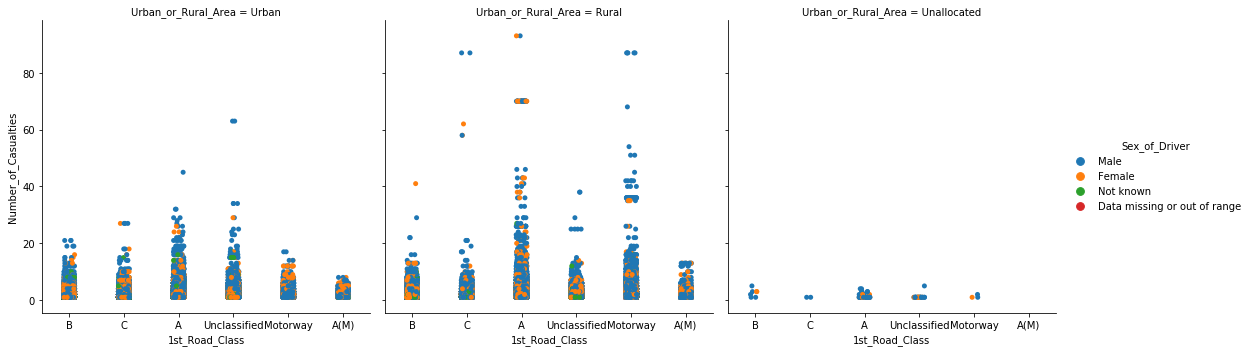

In [74]:
sns.catplot(x='1st_Road_Class', y='Number_of_Casualties', data=Accident_Vehicle, hue='Sex_of_Driver', 
            col='Urban_or_Rural_Area')

In [108]:
Accident_1.head()

Accident_Index 1st_Road_Class Accident_Severity Carriageway_Hazards  \
0  200501BS00001              A           Serious                None   
1  200501BS00002              B            Slight                None   
2  200501BS00003              C            Slight                None   
3  200501BS00004              A            Slight                None   
4  200501BS00005   Unclassified            Slight                None   

  Day_of_Week              Junction_Control             Light_Conditions  \
0     Tuesday  Data missing or out of range                     Daylight   
1   Wednesday           Auto traffic signal        Darkness - lights lit   
2    Thursday  Data missing or out of range        Darkness - lights lit   
3      Friday  Data missing or out of range                     Daylight   
4      Monday  Data missing or out of range  Darkness - lighting unknown   

  Local_Authority_(District)  Number_of_Casualties  Number_of_Vehicles  \
0     Kensington and Chelsea                     1                   1   
1     Kensington and Chelsea                     1                   1   
2     Kensington and Chelsea                     1                   2   
3     Kensington and Chelsea                     1                   1   
4     Kensington and Chelsea                     1                   1   

  Road_Surface_Conditions           Road_Type  Speed_limit  \
0             Wet or damp  Single carriageway         30.0   
1                     Dry    Dual carriageway         30.0   
2                     Dry  Single carriageway         30.0   
3                     Dry  Single carriageway         30.0   
4             Wet or damp  Single carriageway         30.0   

  Urban_or_Rural_Area     Weather_Conditions  Year              Daytime  \
0               Urban  Raining no high winds  2005    Afternoon (15-19)   
1               Urban     Fine no high winds  2005    Afternoon (15-19)   
2               Urban     Fine no high winds  2005         Night (23-5)   
3               Urban     Fine no high winds  2005  Office Time (10-15)   
4               Urban     Fine no high winds  2005      Evening (19-23)   

   Region  
0  London  
1  London  
2  London  
3  London  
4  London

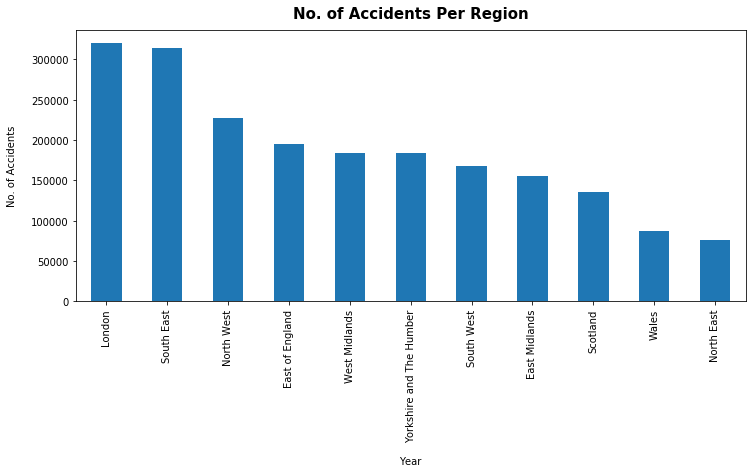

In [109]:
# Region vs No of accidents
Accident_1['Region'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel("Year", labelpad=14)
plt.ylabel("No. of Accidents", labelpad=14)
plt.title("No. of Accidents Per Region", y=1.02, fontsize=15, fontweight='bold');

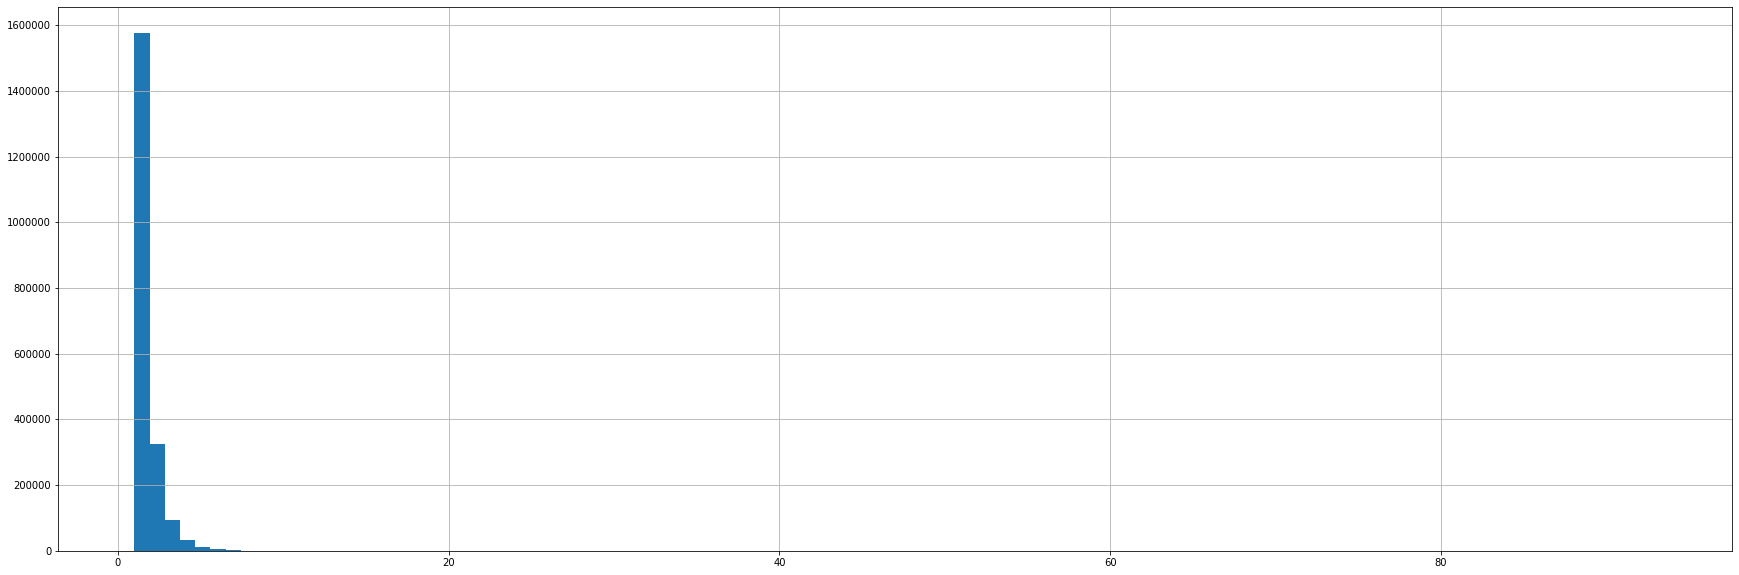

In [110]:
Accident_1['Number_of_Casualties'].hist(bins=100)

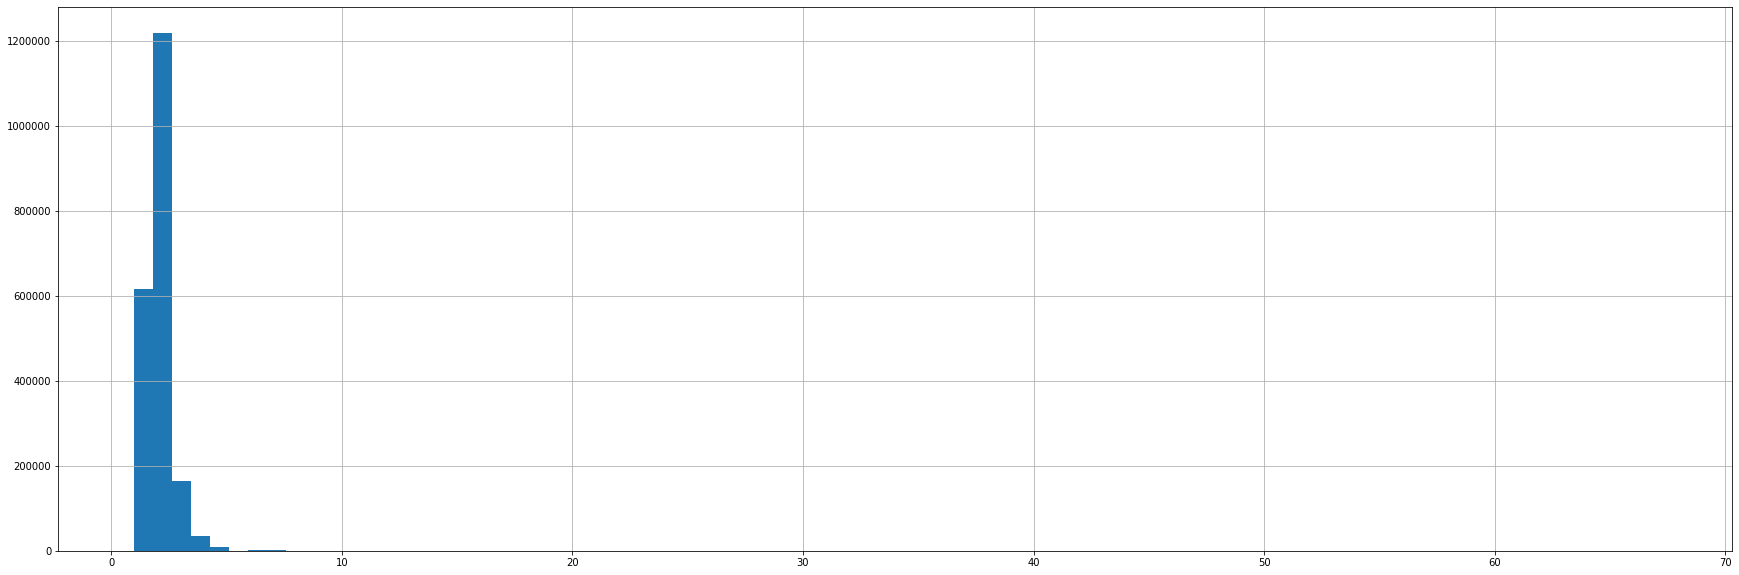

In [111]:
Accident_1['Number_of_Vehicles'].hist(bins=80)

In [112]:
Accident_1.dtypes

Accident_Index                 object
1st_Road_Class                 object
Accident_Severity              object
Carriageway_Hazards            object
Day_of_Week                    object
Junction_Control               object
Light_Conditions               object
Local_Authority_(District)     object
Number_of_Casualties            int64
Number_of_Vehicles              int64
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                   float64
Urban_or_Rural_Area            object
Weather_Conditions             object
Year                            int64
Daytime                        object
Region                         object
dtype: object

In [113]:
var = ['Number_of_Vehicles', 'Number_of_Casualties']
print(Accident_1[var].describe())

       Number_of_Vehicles  Number_of_Casualties
count        2.047100e+06          2.047100e+06
mean         1.833537e+00          1.345858e+00
std          7.150552e-01          8.179836e-01
min          1.000000e+00          1.000000e+00
25%          1.000000e+00          1.000000e+00
50%          2.000000e+00          1.000000e+00
75%          2.000000e+00          1.000000e+00
max          6.700000e+01          9.300000e+01


# INFERENTIAL STATISTICS

In [114]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [115]:
ztest ,pval = stests.ztest(Accident_1['Number_of_Vehicles'], x2=None, value=1.8)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [116]:
#convert year to categorical
Accident_1.Year = Accident_1.Year.astype(str)

In [117]:
Accident_1.dtypes

Accident_Index                 object
1st_Road_Class                 object
Accident_Severity              object
Carriageway_Hazards            object
Day_of_Week                    object
Junction_Control               object
Light_Conditions               object
Local_Authority_(District)     object
Number_of_Casualties            int64
Number_of_Vehicles              int64
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                   float64
Urban_or_Rural_Area            object
Weather_Conditions             object
Year                           object
Daytime                        object
Region                         object
dtype: object

### Applying Chi-square test

In [470]:
#Null: Variable 'Urban_or_Rural_Area' and Variable 'Accident_Severity' are independent
#Alternate: Variable 'Urban_or_Rural_Area' and Variable 'Accident_Severity' are not independent
t=pd.crosstab(Accident_1['Urban_or_Rural_Area'], Accident_1['Accident_Severity'], margins = True)
t

Accident_Severity    Fatal  Serious   Slight      All
Urban_or_Rural_Area                                  
Rural                17007   119600   588077   724684
Unallocated              0       24      136      160
Urban                 9360   166687  1146209  1322256
All                  26367   286311  1734422  2047100

In [471]:
print(stats.chi2_contingency(observed= t)) #chisquare on population

(16542.521529253958, 0.0, 9, array([[9.33405453e+03, 1.01355577e+05, 6.13994369e+05, 7.24684000e+05],
       [2.06082751e+00, 2.23778809e+01, 1.35561292e+02, 1.60000000e+02],
       [1.70308846e+04, 1.84933046e+05, 1.12029207e+06, 1.32225600e+06],
       [2.63670000e+04, 2.86311000e+05, 1.73442200e+06, 2.04710000e+06]]))


In [120]:
t1=pd.crosstab(Accident_1['Year'], Accident_1['Daytime'], margins = True)
t1

Daytime  Afternoon (15-19)  Evening (19-23)  Morning (5-10)  Night (23-5)  \
Year                                                                        
2005                 62540            30997           35290         15077   
2006                 58470            29353           34745         14671   
2007                 57122            27357           34350         13425   
2008                 53313            25287           32992         12304   
2009                 51590            24254           30413         11673   
2010                 48591            22001           29797         10369   
2011                 48577            21448           29208         10015   
2012                 46721            20321           28346          9498   
2013                 44385            19659           27234          8700   
2014                 47048            20401           28945          8916   
2015                 45074            20149           27561          8805   
2016                 43342            19963           26955          8809   
2017                 41577            19433           25223          8624   
All                 648350           300623          391059        140886   

Daytime  Office Time (10-15)      All  
Year                                   
2005                   54802   198706  
2006                   51904   189143  
2007                   49841   182095  
2008                   46679   170575  
2009                   45607   163537  
2010                   43648   154406  
2011                   42214   151462  
2012                   40680   145566  
2013                   38674   138652  
2014                   41012   146322  
2015                   38449   140038  
2016                   37550   136619  
2017                   35122   129979  
All                   566182  2047100

In [121]:
t2=pd.crosstab(Accident_1['1st_Road_Class'], Accident_1['Number_of_Casualties'], margins = True)
t2

Number_of_Casualties        1       2      3      4      5     6     7    8  \
1st_Road_Class                                                                
A                      696631  156336  46377  16810   6340  2411   882  377   
A(M)                     3534    1240    424    181     57    35    10    2   
B                      196180   42818  12406   4256   1485   580   169   67   
C                      137134   26847   7207   2423    848   292    88   47   
Motorway                50000   17401   5984   2641   1104   483   194   91   
Unclassified           493053   79827  20262   7026   2472   774   224   90   
All                   1576532  324469  92660  33337  12306  4575  1567  674   

Number_of_Casualties    9   10  ...  51  54  58  62  63  68  70  87  93  \
1st_Road_Class                  ...                                       
A                     173   85  ...   0   0   0   0   0   0   1   0   1   
A(M)                    1    3  ...   0   0   0   0   0   0   0   0   0   
B                      32   23  ...   0   0   0   0   0   0   0   0   0   
C                      16   11  ...   0   0   1   1   0   0   0   1   0   
Motorway               51   39  ...   2   1   0   0   0   1   0   1   0   
Unclassified           56   29  ...   0   0   0   0   1   0   0   0   0   
All                   329  190  ...   2   1   1   1   1   1   1   2   1   

Number_of_Casualties      All  
1st_Road_Class                 
A                      926666  
A(M)                     5489  
B                      258053  
C                      174947  
Motorway                78070  
Unclassified           603875  
All                   2047100  

[7 rows x 53 columns]

In [122]:
t3=pd.crosstab(Accident_1['Year'], Accident_1['Day_of_Week'], margins = True)
t3

Day_of_Week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
Year                                                                          
2005          32734   27810     26943   21905     29732    29217      30365   
2006          31992   26141     25977   21440     28149    27338      28106   
2007          29260   26250     24681   20384     27301    26924      27295   
2008          27384   24379     23047   18748     24947    26242      25828   
2009          26666   22967     22158   17860     24302    24788      24796   
2010          25475   22450     20819   16794     22807    23045      23016   
2011          24945   21391     20002   16272     23458    22470      22924   
2012          23509   20910     19302   15855     22334    21660      21996   
2013          23044   19830     18026   14854     21184    21255      20459   
2014          23960   21093     19021   15940     21780    22318      22210   
2015          22374   20029     18111   15257     21476    21426      21365   
2016          22578   19276     17818   15023     20949    20104      20871   
2017          21245   17936     17226   14975     19797    19482      19318   
All          335166  290462    273131  225307    308216   306269     308549   

Day_of_Week      All  
Year                  
2005          198706  
2006          189143  
2007          182095  
2008          170575  
2009          163537  
2010          154406  
2011          151462  
2012          145566  
2013          138652  
2014          146322  
2015          140038  
2016          136619  
2017          129979  
All          2047100

In [123]:
chi2,pvalue,dof,expected=stats.chi2_contingency(observed= t3)
print(chi2,pvalue,dof)

580.3981713036808 2.3993216256441586e-72 91


In [124]:
t4=pd.crosstab(Accident_Vehicle['Year_x'], Vehicle_1['Sex_of_Driver'], margins = True)
t4

Sex_of_Driver  Data missing or out of range  Female     Male  Not known  \
Year_x                                                                    
2005                                      0   28937    80322       3016   
2006                                      7   30380    81861       2762   
2007                                      0   33195    90827       3130   
2008                                      0   34001    85742       2691   
2009                                      0   51476   126407       4418   
2010                                      0   57280   118994       4085   
2011                                      0   52733   123389       4476   
2012                                      0   54456   115273       4127   
2013                                      0   53533   113781       4302   
2014                                      0   56326   121131       4896   
2015                                      9   74622   171132      12049   
2016                                     14   70128   163848      18506   
All                                      30  597067  1392707      68458   

Sex_of_Driver      All  
Year_x                  
2005            112275  
2006            115010  
2007            127152  
2008            122434  
2009            182301  
2010            180359  
2011            180598  
2012            173856  
2013            171616  
2014            182353  
2015            257812  
2016            252496  
All            2058262

In [125]:
Accident_1.head(5)

Accident_Index 1st_Road_Class Accident_Severity Carriageway_Hazards  \
0  200501BS00001              A           Serious                None   
1  200501BS00002              B            Slight                None   
2  200501BS00003              C            Slight                None   
3  200501BS00004              A            Slight                None   
4  200501BS00005   Unclassified            Slight                None   

  Day_of_Week              Junction_Control             Light_Conditions  \
0     Tuesday  Data missing or out of range                     Daylight   
1   Wednesday           Auto traffic signal        Darkness - lights lit   
2    Thursday  Data missing or out of range        Darkness - lights lit   
3      Friday  Data missing or out of range                     Daylight   
4      Monday  Data missing or out of range  Darkness - lighting unknown   

  Local_Authority_(District)  Number_of_Casualties  Number_of_Vehicles  \
0     Kensington and Chelsea                     1                   1   
1     Kensington and Chelsea                     1                   1   
2     Kensington and Chelsea                     1                   2   
3     Kensington and Chelsea                     1                   1   
4     Kensington and Chelsea                     1                   1   

  Road_Surface_Conditions           Road_Type  Speed_limit  \
0             Wet or damp  Single carriageway         30.0   
1                     Dry    Dual carriageway         30.0   
2                     Dry  Single carriageway         30.0   
3                     Dry  Single carriageway         30.0   
4             Wet or damp  Single carriageway         30.0   

  Urban_or_Rural_Area     Weather_Conditions  Year              Daytime  \
0               Urban  Raining no high winds  2005    Afternoon (15-19)   
1               Urban     Fine no high winds  2005    Afternoon (15-19)   
2               Urban     Fine no high winds  2005         Night (23-5)   
3               Urban     Fine no high winds  2005  Office Time (10-15)   
4               Urban     Fine no high winds  2005      Evening (19-23)   

   Region  
0  London  
1  London  
2  London  
3  London  
4  London

In [126]:
t5=pd.crosstab(Accident_1['Region'], Accident_1['Urban_or_Rural_Area'], margins = True)
t5

Urban_or_Rural_Area        Rural  Unallocated    Urban      All
Region                                                         
East Midlands              72952            0    82626   155578
East of England            99632            1    95847   195480
London                      8091            0   312540   320631
North East                 28724            1    47823    76548
North West                 65137           35   162444   227616
Scotland                   60369           57    74876   135302
South East                143804            7   169841   313652
South West                 84216           12    83990   168218
Wales                      45984           30    40696    86710
West Midlands              55784            3   127980   183767
Yorkshire and The Humber   59991           14   123593   183598
All                       724684          160  1322256  2047100

In [127]:
chi2,pvalue,dof,expected=stats.chi2_contingency(observed= t5)
print(chi2,pvalue,dof)

236637.69310006074 0.0 33


In [128]:
weekday = Accident_1['Day_of_Week']
daytime   = Accident_1['Daytime']

weekday_daytime = Accident_1.groupby([daytime, weekday]).size()
weekday_daytime = weekday_daytime.rename_axis(['Daytime', 'Weekday'])\
                               .unstack('Weekday')
weekday_daytime

Weekday              Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
Daytime                                                                    
Afternoon (15-19)    109954   96188     71826   60883    102773   103206   
Evening (19-23)       52868   38528     44567   35687     44285    41837   
Morning (5-10)        62848   64980     29907   21563     68993    71447   
Night (23-5)          20252   13507     34344   33717     14204    12242   
Office Time (10-15)   89244   77259     92487   73457     77961    77537   

Weekday              Wednesday  
Daytime                         
Afternoon (15-19)       103520  
Evening (19-23)          42851  
Morning (5-10)           71321  
Night (23-5)             12620  
Office Time (10-15)      78237

In [129]:
#Hypothesis Testing
#To check the association between Hour of the day and Day of the week 
#Null Hypothesis, H0= Hour of the day and Day of the week are independent of each other
#Alternate Hypothesis, HA= Hour of the day and Day of the week are not independent of each other

from scipy.stats import chi2_contingency
obs=np.array(weekday_daytime)
chi2, pval, dof, expected = chi2_contingency(obs)

print(chi2, pval, dof, expected)

#We usually say that the association between two variables is statistically significant if p value< 0.05 
#which is clearly the case here.
#This probability is 0.000 in our case. Conclusion: we reject the null hypothesis 
#that our variables are independent in the entire population.

90245.68363623701 0.0 24 [[106152.54560109  91994.05876606  86505.04804357  71358.40625763
   97617.04049631  97000.39380099  97722.50703434]
 [ 49220.16922378  42655.24782668  40110.13658981  33087.03349177
   45262.47792878  44976.55492502  45311.38001417]
 [ 64027.00444238  55487.16684969  52176.41333057  43040.55987153
   58878.72636608  58506.78954179  58942.33959797]
 [ 23066.87366323  19990.24441014  18797.48623223  15506.13160178
   21212.11439402  21078.11749988  21235.03219872]
 [ 92699.40706951  80335.28214743  75541.91580382  62314.86877729
   85245.64081481  84707.14423233  85337.7411548 ]]


In [130]:
#Hypothesis Testing
#To check the association between Accident Severity and Daytime
#Null Hypothesis, H0= Accident Severity and Daytime are independent of each other 
#Alternate Hypothesis, HA= Accident Severity and Daytime are not independent of each other 

from scipy.stats import chi2_contingency
obs=np.array(counts)
chi2, pval, dof, expected = chi2_contingency(obs)

print(chi2, pval, dof, expected)

#We usually say that the association between two variables is statistically significant if p value< 0.05 
#which is clearly the case here.
#This probability is 0.000 in our case. Conclusion: we reject the null hypothesis 
#that our variables are independent in the entire population.

10195.915808784628 0.0 28 [[8.35010800e+03 9.06712092e+04 5.49270339e+05 6.48291656e+05
  2.50697951e+00 2.34711267e+01 1.32365809e+02 1.58343915e+02]
 [3.87241812e+03 4.20493763e+04 2.54727773e+05 3.00649567e+05
  1.16262842e+00 1.08848911e+01 6.13855241e+01 7.34330436e+01]
 [5.03696491e+03 5.46948254e+04 3.31331693e+05 3.91063484e+05
  1.51226401e+00 1.41582889e+01 7.98459054e+01 9.55164583e+01]
 [1.81548050e+03 1.97137344e+04 1.19422358e+05 1.40951573e+05
  5.45067489e-01 5.10309240e+00 2.87789743e+01 3.44271342e+01]
 [7.29202847e+03 7.91818547e+04 4.79669837e+05 5.66143721e+05
  2.18930892e+00 2.04969952e+01 1.15593145e+02 1.38279449e+02]]


In [131]:
weekday = Accident_1['Day_of_Week']
severity    = Accident_1['Accident_Severity']

accident_table = Accident_1.groupby([severity, weekday]).size()
accident_table = accident_table.rename_axis(['Severity', 'Weekday'])\
                               .unstack('Weekday')
accident_table

#Hypothesis Testing
#To check the association between Day of Week and Severity
#Null Hypothesis, H0= Day of Week and Severity are independent of each other 
#Alternate Hypothesis, HA= Day of Week and Severity are not independent of each other 

obs=np.array(accident_table)
chi2, pval, dof, expected = chi2_contingency(obs)

print(chi2, pval, dof, expected)

#We usually say that the association between two variables is statistically significant if p value< 0.05 
#which is clearly the case here.
#This probability is 0.000 in our case. Conclusion: we reject the null hypothesis 
#that our variables are independent in the entire population.

3549.8095640648166 0.0 12 [[  4316.99571198   3741.2005051    3517.97424503   2901.99290167
    3969.87507792   3944.79738313   3974.16417517]
 [ 46876.90519564  40624.52527087  38200.58118363  31511.83258121
   43107.63088076  42835.3200425   43154.20484539]
 [283972.09909237 246096.27422402 231412.44457134 190893.17451712
  261138.49404133 259488.88257437 261420.63097943]]


In [132]:
#Hypothesis Testing
#To check the association between Age and Gender
#Null Hypothesis, H0= Age and Gender are independent of each other 
#Alternate Hypothesis, HA= Age and Gender are not independent of each other 

obs=np.array(drivers)
chi2, pval, dof, expected = chi2_contingency(obs)

print(chi2, pval, dof, expected)

#We usually say that the association between two variables is statistically significant if p value< 0.05 
#which is clearly the case here.
#This probability is 0.000 in our case. Conclusion: we reject the null hypothesis 
#that our variables are independent in the entire population.

3677.595715325538 0.0 10 [[3.69417326e+01 8.40582674e+01]
 [1.11527396e+03 2.53772604e+03]
 [5.35627646e+04 1.21878235e+05]
 [7.26961397e+04 1.65414860e+05]
 [1.36700287e+05 3.11051713e+05]
 [1.32597312e+05 3.01715688e+05]
 [1.06231600e+05 2.41722400e+05]
 [6.28186531e+04 1.42939347e+05]
 [2.69583057e+02 6.13416943e+02]
 [2.78613937e+04 6.33966063e+04]
 [1.65300515e+04 3.76129485e+04]]


### Two sample T-Test (Independent)

In [134]:
import random
random.sample(list(Accident_1['Accident_Severity']),k=200)

['Slight',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Serious',
 'Slight',
 'Slight',
 'Serious',
 'Serious',
 'Slight',
 'Slight',
 'Fatal',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight',
 'Slight'

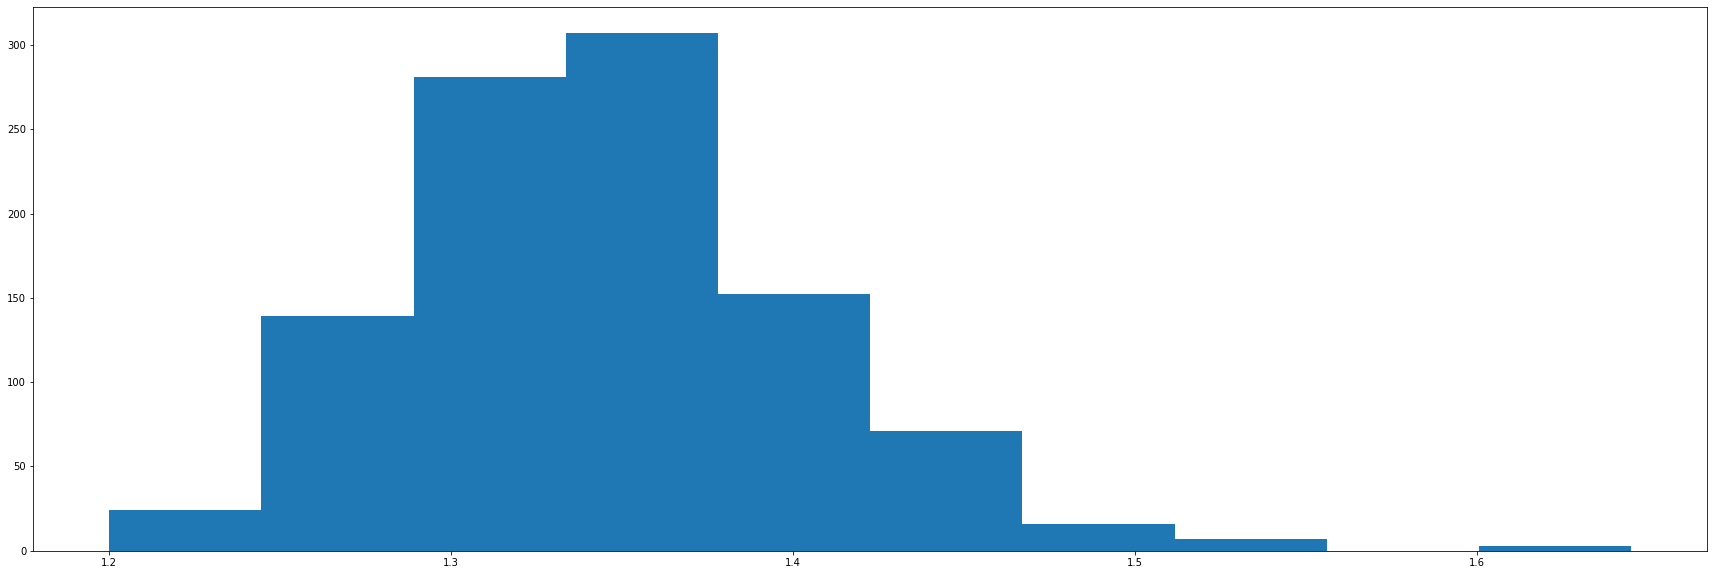

The mean of the sample means is 1.3443


In [135]:
from statistics import *
import matplotlib.pyplot as plt

means = [mean(random.sample(list(Accident_1['Number_of_Casualties']),k=200)) for _i in range(1000)]
plt.hist(means)
plt.show()
print('The mean of the sample means is {}'.format(mean(means)))


In [136]:
mean(list(Accident_1['Number_of_Casualties']))

1.3458575545894191

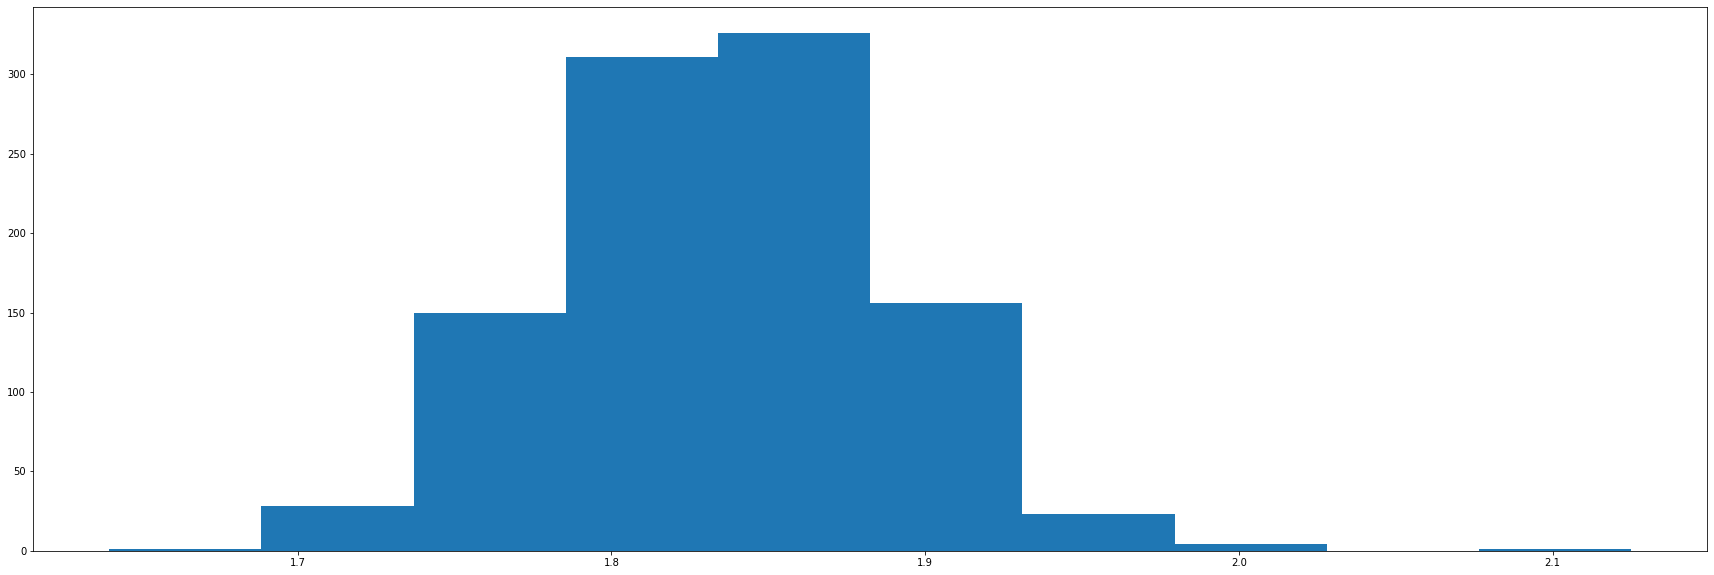

The mean of the sample means is 1.834745


In [137]:
means_vehicles = [mean(random.sample(list(Accident_1['Number_of_Vehicles']),k=200)) for _i in range(1000)]
plt.hist(means_vehicles)
plt.show()
print('The mean of the sample means is {}'.format(mean(means_vehicles)))

In [138]:
mean(list(Accident_1['Number_of_Vehicles']))

1.8335367104684677

In [146]:
casualties_2005 = Accident_1.Number_of_Casualties[Accident_1.Year=='2005']
casualties_2006 = Accident_1.Number_of_Casualties[Accident_1.Year=='2006']
casualties_2007 = Accident_1.Number_of_Casualties[Accident_1.Year=='2007']
casualties_2008 = Accident_1.Number_of_Casualties[Accident_1.Year=='2008']
casualties_2009 = Accident_1.Number_of_Casualties[Accident_1.Year=='2009']
casualties_2010 = Accident_1.Number_of_Casualties[Accident_1.Year=='2010']
casualties_2011 = Accident_1.Number_of_Casualties[Accident_1.Year=='2011']
casualties_2012 = Accident_1.Number_of_Casualties[Accident_1.Year=='2012']
casualties_2013 = Accident_1.Number_of_Casualties[Accident_1.Year=='2013']
casualties_2014 = Accident_1.Number_of_Casualties[Accident_1.Year=='2014']
casualties_2015 = Accident_1.Number_of_Casualties[Accident_1.Year=='2015']
casualties_2016 = Accident_1.Number_of_Casualties[Accident_1.Year=='2016']
casualties_2017 = Accident_1.Number_of_Casualties[Accident_1.Year=='2017']

In [106]:
casualties_2005.sum()

270987

In [107]:
print (casualties_2016.mean()); print (casualties_2017.mean());
print (casualties_2007.mean()); print (casualties_2008.mean());

1.327641104092403
1.3155201994168289
1.360586507043027
1.3535805364209292


In [108]:
stats.ttest_ind(a= casualties_2005,
                b= casualties_2006) # significantly same smaples

Ttest_indResult(statistic=-0.876328089562382, pvalue=0.38085224156925923)

In [109]:
stats.ttest_ind(a= casualties_2007,
                b= casualties_2008) # significantly different

Ttest_indResult(statistic=2.497083836641663, pvalue=0.01252238712150071)

In [110]:
stats.ttest_ind(a= casualties_2009,
                b= casualties_2010) # significantly different

Ttest_indResult(statistic=2.4170205487054823, pvalue=0.015648692732181942)

In [111]:
stats.ttest_ind(a= casualties_2011,
                b= casualties_2012) # significantly same

Ttest_indResult(statistic=0.6304497795940865, pvalue=0.5284008354851515)

In [112]:
stats.ttest_ind(a= casualties_2013,
                b= casualties_2014) # significantly same

Ttest_indResult(statistic=-1.442931321786068, pvalue=0.1490409179149479)

In [113]:
stats.ttest_ind(a= casualties_2015,
                b= casualties_2016) # significantly same

Ttest_indResult(statistic=0.5848473088685926, pvalue=0.5586508676175201)

In [114]:
stats.ttest_ind(a= casualties_2016,
                b= casualties_2017) # significantly different

Ttest_indResult(statistic=4.022020471495334, pvalue=5.771691737279108e-05)

### APPLYING ANOVA

In [148]:
#APPLY ANOVA
stats.f_oneway(casualties_2005, casualties_2006, casualties_2007, casualties_2008, casualties_2009, 
               casualties_2010, casualties_2011, casualties_2012, casualties_2013, casualties_2014, 
               casualties_2015, casualties_2016, casualties_2017)
#p value < 0.05, reject the null hipothesis that all samples have the same means

F_onewayResult(statistic=65.66242400805749, pvalue=6.8361795446763696e-161)

In [139]:
# One way ANOVA on variable = 'Number_of_Casualties'
s1 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==10.0]
s2 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==15.0]
s3 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==20.0]
s4 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==30.0]
s5 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==40.0]
s6 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==50.0]
s7 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==60.0]
s8 = Accident_1.Number_of_Casualties[Accident_1.Speed_limit==70.0]
# Perform the ANOVA
#stats.f_oneway(s1, s2, s3) #here null hypothesis is accepted that all have same means
#stats.f_oneway(s6, s1)
stats.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8) # reject H0

F_onewayResult(statistic=6418.145090656621, pvalue=0.0)

In [140]:
print (s1.mean())
print (s2.mean())
print (s3.mean())
print (s4.mean())
print (s5.mean())
print (s6.mean())
print (s7.mean())
print (s8.mean())

1.1578947368421053
1.125
1.1696054173720536
1.2648029841787076
1.432496005417189
1.5052966406632315
1.5148433438873399
1.5722005729880921


In [141]:
Accident_1.Number_of_Casualties.mean()

1.3458575545894191

In [142]:
ztest ,pval = stests.ztest(s8, x2=None, value=1.345)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# only for s1 - null hypothesis is accepted, which means s1 is identical to the population

0.0
reject null hypothesis


### ADDITIONAL

In [ ]:
#convert year to categorical
Accident_1.Year = Accident_1.Year.astype(str)

#### 1. SAPHIRO

In [150]:
# testing for normality using Shapiro-wilk test
# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.
# using alpha = 0.05
from scipy.stats import shapiro

def saphiro_test(data):

    stat, p = shapiro(data)
    print(stat, p)
    if (p < 0.05):
        print("reject H0")
    else:
        print("Do not reject H0")

#### 2. ANOVA

In [458]:
import random
sample_size = 1000

sample_casualties_per_year = {}

for a_year in range(2005, 2018):
    temp = Accident_1.Number_of_Casualties[Accident_1.Year==str(a_year)]
    sample_casualties_per_year[a_year] = random.sample(list(temp), sample_size)
    print(saphiro_test(sample_casualties_per_year[a_year]))

(0.5527536273002625, 1.1210387714598537e-44)
(0.534174919128418, 2.802596928649634e-45)
(0.5167355537414551, 1.401298464324817e-45)
(0.5018267631530762, 0.0)
(0.5554848909378052, 1.401298464324817e-44)
(0.5122526288032532, 0.0)
(0.5278142690658569, 1.401298464324817e-45)
(0.5081169605255127, 0.0)
(0.5165472030639648, 1.401298464324817e-45)
(0.4781098961830139, 0.0)
(0.235043466091156, 0.0)
(0.5200643539428711, 1.401298464324817e-45)
(0.5075080394744873, 0.0)


In [459]:
sample_size = 1000

sample_casualties_per_region = {}
regions = list(Accident_1['Region'].unique())

for region in regions:
    temp = Accident_1.Number_of_Casualties[Accident_1.Region == region]
    sample_casualties_per_region[region] = random.sample(list(temp), k=sample_size)
    print(saphiro_test(sample_casualties_per_region[region]))

(0.3470255732536316, 0.0)
(0.5360919833183289, 2.802596928649634e-45)
(0.5704742670059204, 4.624284932271896e-44)
(0.5528824329376221, 1.1210387714598537e-44)
(0.5891212224960327, 2.14398665041697e-43)
(0.5391404628753662, 4.203895392974451e-45)
(0.5090848207473755, 0.0)
(0.5134957432746887, 0.0)
(0.4588744044303894, 0.0)
(0.5004737377166748, 0.0)
(0.4885216951370239, 0.0)


In [460]:
sample_casualties_per_roadclass = {}
roadclasses = list(Accident_1['1st_Road_Class'].unique())

for roadclass in roadclasses:
    temp = Accident_1.Number_of_Casualties[Accident_1['1st_Road_Class'] == roadclass]
    sample_casualties_per_roadclass[roadclass] = random.sample(list(temp), k=sample_size)
    print(saphiro_test(sample_casualties_per_roadclass[roadclass]))

(0.5419861674308777, 5.605193857299268e-45)
(0.48674023151397705, 0.0)
(0.4680233597755432, 0.0)
(0.4669727683067322, 0.0)
(0.6118390560150146, 1.4923828645059302e-42)
(0.6541224122047424, 7.159093724389058e-41)


In [461]:
sample_casualties_per_severity = {}
severityy = list(Accident_1['Accident_Severity'].unique())

for severity in severityy:
    temp = Accident_1.Number_of_Casualties[Accident_1['Accident_Severity'] == severity]
    sample_casualties_per_severity[severity] = random.sample(list(temp), k=sample_size)
    print(saphiro_test(sample_casualties_per_severity[severity]))

(0.5414751172065735, 4.203895392974451e-45)
(0.50350421667099, 0.0)
(0.3138362169265747, 0.0)


In [462]:
sample_casualties_per_urbanrural = {}
urbanrural = ['Urban','Rural'] #for this one, we are not considering the third category (considering this as an outlier)

for area in urbanrural:
    temp = Accident_1.Number_of_Casualties[Accident_1['Urban_or_Rural_Area'] == area]
    sample_casualties_per_urbanrural[area] = random.sample(list(temp), k=sample_size)
    print(saphiro_test(sample_casualties_per_urbanrural[area]))

(0.45637965202331543, 0.0)
(0.5441170930862427, 5.605193857299268e-45)


In [463]:
print("Testing ANOVA for number of casualties per year category: ")
print("H0: There is no significant difference between number of casualties per year")
print("H1: There is significant difference between number of casualties per year")
stat, pval = stats.f_oneway(sample_casualties_per_year[2005],sample_casualties_per_year[2006],sample_casualties_per_year[2007],
              sample_casualties_per_year[2008],sample_casualties_per_year[2009],sample_casualties_per_year[2010],
              sample_casualties_per_year[2011],sample_casualties_per_year[2012],sample_casualties_per_year[2013],
              sample_casualties_per_year[2014],sample_casualties_per_year[2015],sample_casualties_per_year[2016],
              sample_casualties_per_year[2017])
print("Result: " , stat, pval)

print("\n\nTesting ANOVA for number of casualties per region category: ")
print("H0: There is no significant difference between number of casualties per region")
print("H1: There is significant difference between number of casualties per region")
stat, pval = stats.f_oneway(sample_casualties_per_region['London'], sample_casualties_per_region['North West'], 
               sample_casualties_per_region['North East'], sample_casualties_per_region['West Midlands'],
               sample_casualties_per_region['Yorkshire and The Humber'], sample_casualties_per_region['East Midlands'],
               sample_casualties_per_region['East of England'], sample_casualties_per_region['South East'],
               sample_casualties_per_region['South West'], sample_casualties_per_region['Scotland'],
               sample_casualties_per_region['Wales'])
print("Result: " , stat, pval)

print("\n\nTesting ANOVA for number of casualties per road class category: ")
print("H0: There is no significant difference between number of casualties per road class category")
print("H1: There is significant difference between number of casualties per road class category")
stat, pval = stats.f_oneway(sample_casualties_per_roadclass['A'], sample_casualties_per_roadclass['Unclassified'], 
               sample_casualties_per_roadclass['B'], sample_casualties_per_roadclass['C'],
               sample_casualties_per_roadclass['Motorway'], sample_casualties_per_roadclass['A(M)'])
print("Result: " , stat, pval)

print("\n\nTesting ANOVA for number of casualties per severity: ")
print("H0: There is no significant difference between number of casualties per severity")
print("H1: There is significant difference between number of casualties per severity")
stat, pval = stats.f_oneway(sample_casualties_per_severity['Slight'], sample_casualties_per_severity['Serious'], 
               sample_casualties_per_severity['Fatal'])
print("Result: " , stat, pval)

print("\n\nTesting ANOVA for number of casualties per urban_or_rural_area: ")
print("H0: There is no significant difference between number of casualties per urban_or_rural_area")
print("H1: There is significant difference between number of casualties per urban_or_rural_area")
stat, pval = stats.f_oneway(sample_casualties_per_urbanrural['Urban'], sample_casualties_per_urbanrural['Rural'])
print("Result: " , stat, pval)

Testing ANOVA for number of casualties per year category: 
H0: There is no significant difference between number of casualties per year
H1: There is significant difference between number of casualties per year
Result:  0.9826606414847134 0.46259808772594213


Testing ANOVA for number of casualties per region category: 
H0: There is no significant difference between number of casualties per region
H1: There is significant difference between number of casualties per region
Result:  6.359158566652005 8.079733967085262e-10


Testing ANOVA for number of casualties per road class category: 
H0: There is no significant difference between number of casualties per road class category
H1: There is significant difference between number of casualties per road class category
Result:  31.23023651822962 1.7112622519856501e-31


Testing ANOVA for number of casualties per severity: 
H0: There is no significant difference between number of casualties per severity
H1: There is significant difference betw

In [ ]:
# basically all of the anova test (except for comparing number of casualties per year, resulting in REJECT H0
# so we are following up those 4 anova test above to see what combination resulting the significant difference

In [464]:
#further test on ANOVA: 
#Tukey-Kramer Method
#Tukey's range test, named after the American mathematician John Tukey, 
#is a common method used as post hoc analysis after one-way ANOVA. 
#This test compares all possible pairs and we can use it to precisely identify difference between two means 
#that's greater than the expected standard error

In [467]:
#TUKEY TEST, FOLLOWING UP THE ANOVA RESULT
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

sample_size_tukey = 1000
base_sample_tukey = Accident_1.sample(n=sample_size_tukey, random_state=1)

keys = ['Region','1st_Road_Class', 'Accident_Severity', 'Urban_or_Rural_Area']

for key in keys:
    sample_tukey = base_sample_tukey[[key,'Number_of_Casualties']]
    sample_tukey.reset_index()

    MultiComp = MultiComparison(sample_tukey['Number_of_Casualties'],
                                sample_tukey[key])
    print(MultiComp.tukeyhsd().summary())
    print("\n\n")

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1              group2          meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
  East Midlands          East of England   0.0117    0.9 -0.4032 0.4266  False
  East Midlands                   London  -0.1547    0.9 -0.5276 0.2181  False
  East Midlands               North East   -0.001    0.9 -0.5628 0.5608  False
  East Midlands               North West   0.0497    0.9 -0.3424 0.4419  False
  East Midlands                 Scotland   0.1001    0.9   -0.35 0.5502  False
  East Midlands               South East   0.0175    0.9  -0.358  0.393  False
  East Midlands               South West   0.0008    0.9 -0.4271 0.4286  False
  East Midlands                    Wales   0.0813    0.9  -0.399 0.5617  False
  East Midlands            West Midlands  -0.0996    0.9  -0.505 0.3058  False
  East Midlands Yorkshire and The Humber   0.1987  0

#### 3. CHISQUARE AND GTEST

In [449]:
#creating sample for CHISQUARE
sample_size = 5000

base_sample = Accident_1.sample(n=sample_size, random_state=1)
print(base_sample.shape)

(5000, 18)


In [450]:
keys = ['1st_Road_Class', 'Accident_Severity', 'Carriageway_Hazards', 'Day_of_Week', 'Junction_Control', 
        'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year',
        'Daytime', 'Region']

for key in keys:
    for key2 in keys:
        if key != key2:
            temp_table = pd.crosstab(base_sample[key], base_sample[key2], margins = True)
            #CHISQUARETEST
            chi2,pvalue,dof,expected = stats.chi2_contingency(observed=temp_table)
            if pvalue < 0.05:
                print("Chisquare", key, " vs ", key2, " : ", chi2,pvalue,dof, " --> Reject H0")
            else:
                print("Chisquare", key, " vs ", key2, " : ", chi2,pvalue,dof)
            
            #GTEST
            g, p, dof, expctd = stats.chi2_contingency(temp_table, lambda_="log-likelihood")
            if p < 0.05:
                print("GTest, G={}; df={}; P={} --> Reject H0".format(g, dof, p))
            else:
                print("GTest, G={}; df={}; P={}".format(g, dof, p))
            print("\n")

Chisquare 1st_Road_Class  vs  Accident_Severity  :  27.268377480995547 0.0740975121281591 18
GTest, G=26.680299465749705; df=18; P=0.085190225264808


Chisquare 1st_Road_Class  vs  Carriageway_Hazards  :  39.92955141781553 0.5622217129279556 42
GTest, G=31.55159693435263; df=42; P=0.8803524691848479


Chisquare 1st_Road_Class  vs  Day_of_Week  :  24.619931138106338 0.985076262105006 42
GTest, G=25.87969369401408; df=42; P=0.9760332158718377


Chisquare 1st_Road_Class  vs  Junction_Control  :  375.96782570569763 3.232386214993152e-58 36  --> Reject H0
GTest, G=391.53410563560453; df=36; P=2.6741015103947404e-61 --> Reject H0


Chisquare 1st_Road_Class  vs  Light_Conditions  :  54.329574181263254 0.004223737190888194 30  --> Reject H0
GTest, G=49.73391324453365; df=30; P=0.013215129707291218 --> Reject H0


Chisquare 1st_Road_Class  vs  Road_Surface_Conditions  :  42.34612253300009 0.2160621343346245 36
GTest, G=43.65848204997407; df=36; P=0.17804085074937256


Chisquare 1st_Road_Class  

In [452]:
region_severity = pd.crosstab(base_sample['Region'], base_sample['Accident_Severity'], margins = True)
region_severity

Accident_Severity         Fatal  Serious  Slight   All
Region                                                
East Midlands                 9       64     283   356
East of England               7       74     372   453
London                        5       71     715   791
North East                    3       24     158   185
North West                   11       66     455   532
Scotland                      9       58     267   334
South East                   13      110     623   746
South West                    8       67     369   444
Wales                         7       43     173   223
West Midlands                 5       64     384   453
Yorkshire and The Humber      5       74     404   483
All                          82      715    4203  5000

In [343]:
# CRAMER V test, after chisquare
# measure of association between two categorical features: Cramér’s V
# It is based on a nominal variation of Pearson’s Chi-Square Test
# Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association
# Unlike correlation, there are no negative values, as there’s no such thing as a negative association
# Either there is, or there isn’t)
# Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

keys = ['1st_Road_Class', 'Accident_Severity', 'Carriageway_Hazards', 'Day_of_Week', 'Junction_Control', 
        'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions', #'Year',
        'Daytime', 'Region']

for key in keys:
    for key2 in keys:
        if key != key2:
            confusion_matrix = pd.crosstab(base_sample[key], base_sample[key2]).as_matrix()
            #print(confusion_matrix)
            result = cramers_v(confusion_matrix)
            if result > 0.25:
                print(key, " vs ", key2, " : ", result, " highly correlated")
            else:
                print(key, " vs ", key2, " : ", result)

/Users/passa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


1st_Road_Class  vs  Accident_Severity  :  0.04921926137764049
1st_Road_Class  vs  Carriageway_Hazards  :  0.0
1st_Road_Class  vs  Day_of_Week  :  0.01905025753896025
1st_Road_Class  vs  Junction_Control  :  0.11077958745093082
1st_Road_Class  vs  Light_Conditions  :  0.08138800554536411
1st_Road_Class  vs  Road_Surface_Conditions  :  0.0
1st_Road_Class  vs  Road_Type  :  0.24331949322696061
1st_Road_Class  vs  Urban_or_Rural_Area  :  0.26179912280025097  highly correlated
1st_Road_Class  vs  Weather_Conditions  :  0.0
1st_Road_Class  vs  Daytime  :  0.0
1st_Road_Class  vs  Region  :  0.11287676453586713
Accident_Severity  vs  1st_Road_Class  :  0.0492192613776405
Accident_Severity  vs  Carriageway_Hazards  :  0.0
Accident_Severity  vs  Day_of_Week  :  0.0
Accident_Severity  vs  Junction_Control  :  0.09768973389288556
Accident_Severity  vs  Light_Conditions  :  0.09324428672770042
Accident_Severity  vs  Road_Surface_Conditions  :  0.0
Accident_Severity  vs  Road_Type  :  0.045878852891

### TRYING THE FISHER TEST: DOESNT WORK WELL ON PYTHON WITH LARGE SIZE OF MATRIX

In [403]:
#creating table of contingency
region_severity = pd.crosstab(base_sample['1st_Road_Class'], base_sample['Daytime'], margins = True)
temp = region_severity.copy()
temp = temp.drop('All', axis = 0)
temp = temp.drop('All', axis = 1)

In [404]:
temp

Daytime         Afternoon (15-19)  Evening (19-23)  Morning (5-10)  \
1st_Road_Class                                                       
A                             141               73             105   
A(M)                            1                0               0   
B                              37               23              18   
C                              29               13              17   
Motorway                       11                6              11   
Unclassified                   88               48              51   

Daytime         Night (23-5)  Office Time (10-15)  
1st_Road_Class                                     
A                         33                  134  
A(M)                       0                    0  
B                         15                   33  
C                          5                   23  
Motorway                   4                    5  
Unclassified              17                   59

In [409]:
# TESTING FISHER TEST FOR THE ABOVE DATA ON ROADCLASS vs DAYTIME
import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
statss = importr('stats')

m = np.array([[141,73,105,33,134],[1,0,0,0,0],[37,23,18,15,33],[29,13,17,5,23],[11,6,11,4,5]])
#confusion_matrix = pd.crosstab(base_sample['1st_Road_Class'], base_sample['Urban_or_Rural_Area']).as_matrix()
#res = statss.fisher_test(temp.as_matrix())
res = statss.fisher_test(m)
#print(res)
print ('p-value: {}'.format(res[0][0]))
#>> p-value: 0.668165917041

RRuntimeError: Error in (function (x, y = NULL, workspace = 2e+05, hybrid = FALSE, hybridPars = c(expect = 5,  : 
  FEXACT error 6.  LDKEY=618 is too small for this problem,
  (ii := key2[itp=702] = 376226739, ldstp=18540)
Try increasing the size of the workspace and possibly 'mult'


### Validating G test stats with corresponding plots

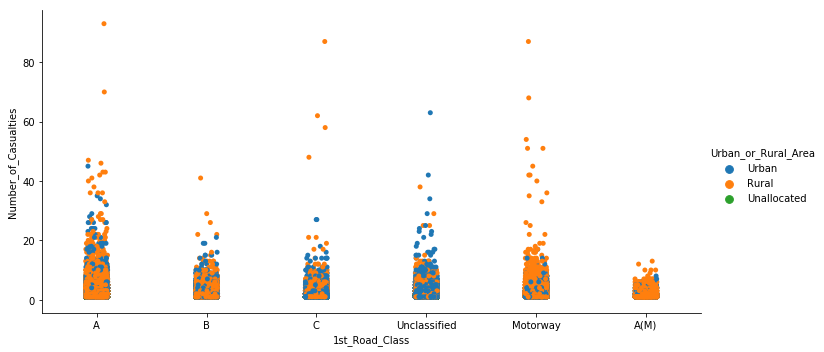

In [33]:
#1st_road_class v/s Urban_or_Rural_Area
sns.catplot(x='1st_Road_Class', y='Number_of_Casualties', data=Accident_1, hue='Urban_or_Rural_Area', height=5, aspect=2) 
            #col='Urban_or_Rural_Area')

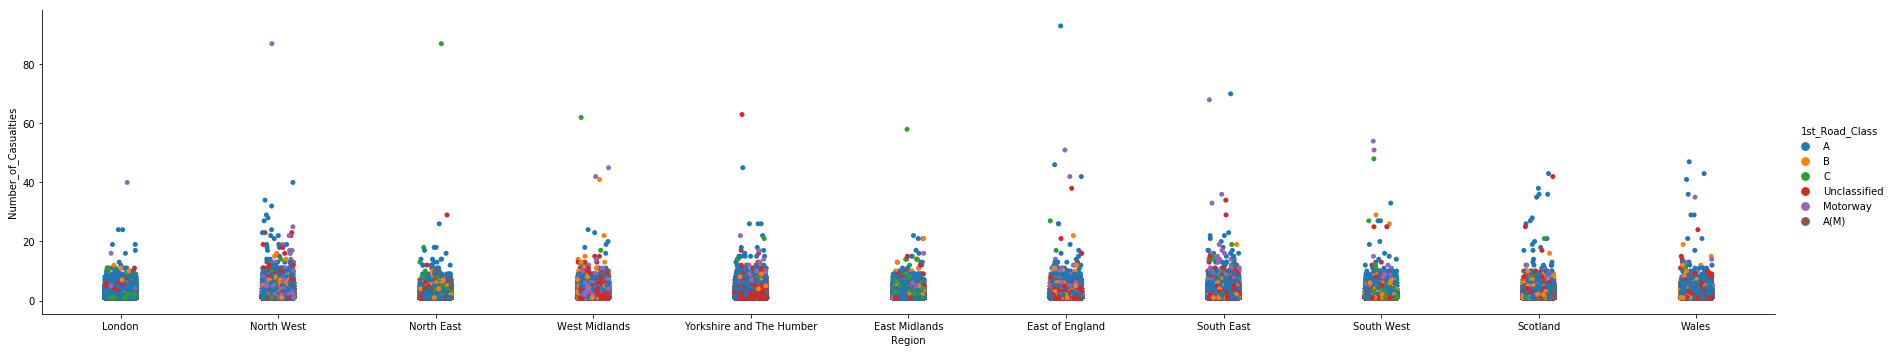

In [44]:
# 1st_Road_Class v/s Region
sns.catplot(x='Region', y='Number_of_Casualties', data=Accident_1, hue='1st_Road_Class',height=5, aspect=5) 
            #col='1st_Road_Class' )

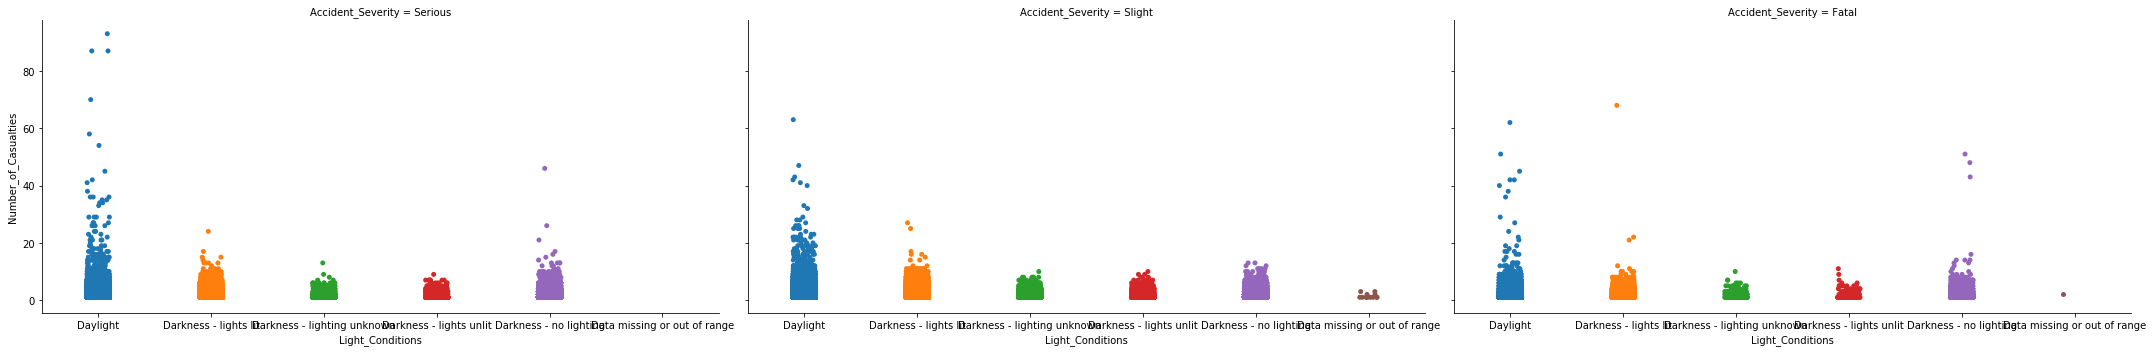

In [36]:
# Light_Conditions v/s Accident_Severity
sns.catplot(x='Light_Conditions', y='Number_of_Casualties', data=Accident_1, height=5, aspect=2,
           col='Accident_Severity')
#not useful

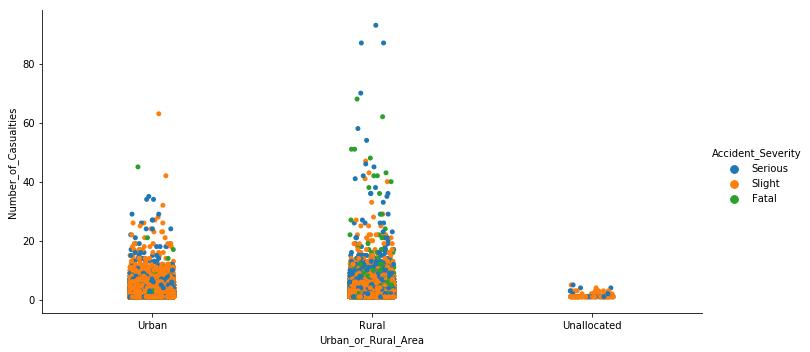

In [38]:
# Urban_or_Rural_Area v/s Accident_Severity
sns.catplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=Accident_1, height=5, aspect=2,
            hue='Accident_Severity')

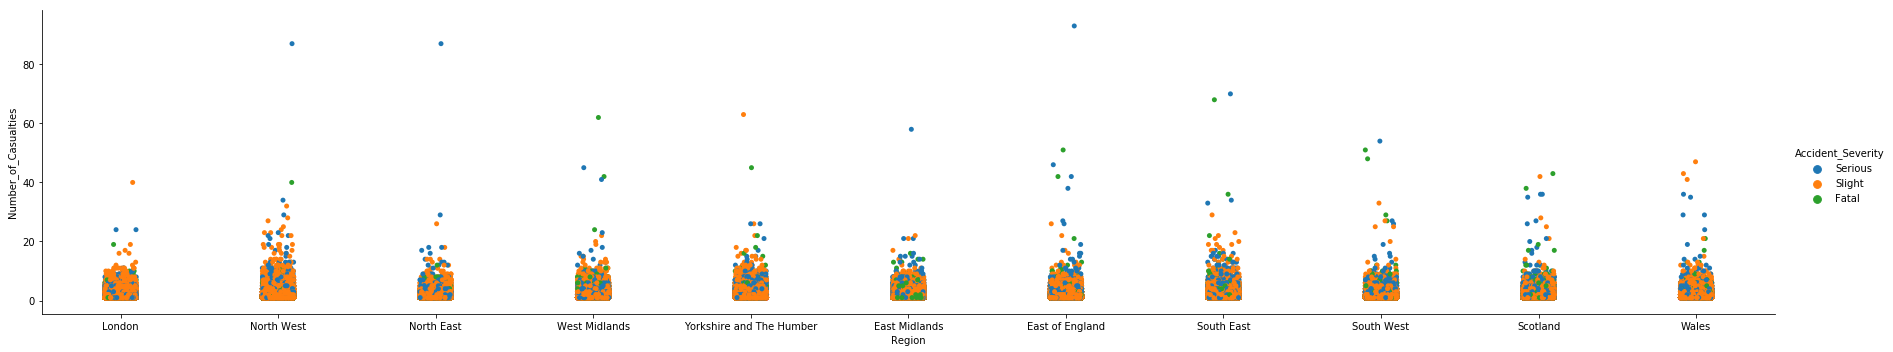

In [40]:
# Region v/s Accident_Severity
sns.catplot(x='Region', y='Number_of_Casualties', data=Accident_1, height=5, aspect=5,
            hue='Accident_Severity')
#fatal: east midland

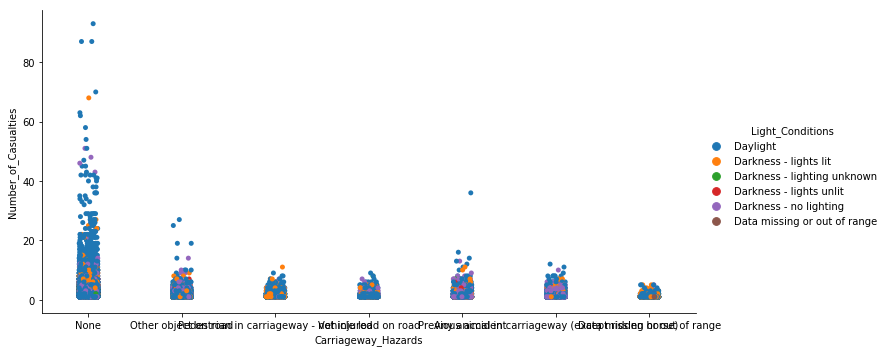

In [42]:
# Light_Conditions v/s Carriageway_Hazards
sns.catplot(x='Carriageway_Hazards', y='Number_of_Casualties', data=Accident_1, height=5, aspect=2,
            hue='Light_Conditions')
#not useful

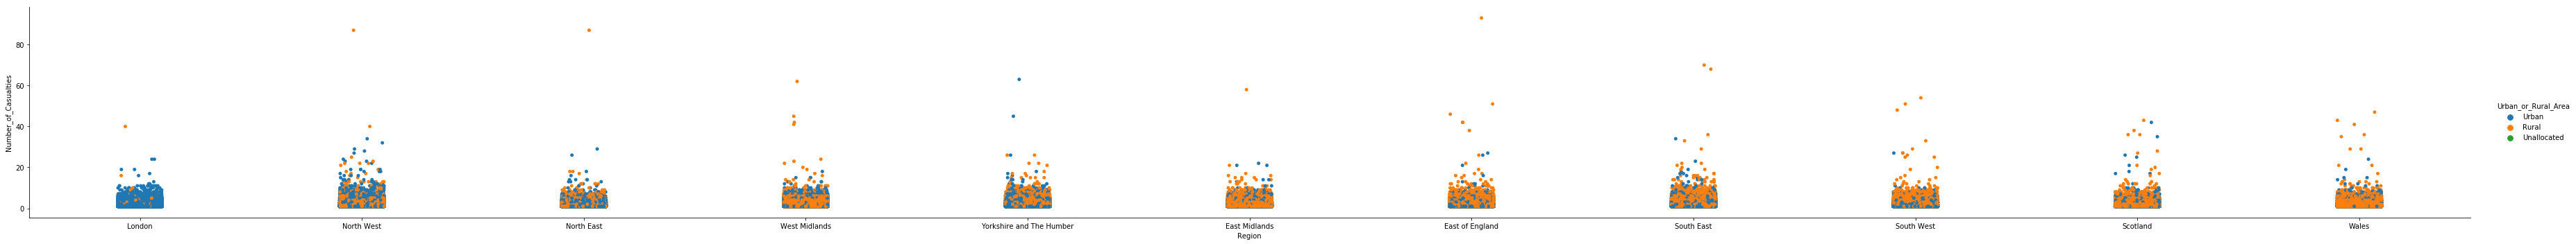

In [45]:
# Region v/s Urban_or_Rural_Area
sns.catplot(x='Region', y='Number_of_Casualties', data=Accident_1, height=5, aspect=10,
            hue='Urban_or_Rural_Area')
# only urban accidents in London

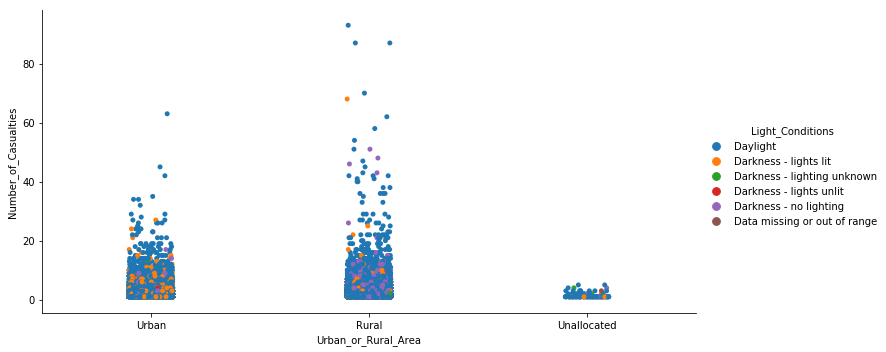

In [47]:
# Light_Conditions v/s Urban_or_Rural_Area
sns.catplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', data=Accident_1, height=5, aspect=2,
            hue='Light_Conditions')